In [19]:
import pandas as pd
import sys
sys.path.insert(0,'../data_utils/')
from HiCDataset import HiCDataset
from HiCMap import HiCMap 

import matplotlib.pyplot as plt
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style.txt')

In [20]:
nbeads = 64
resolution = 20_000
save_folder = 'HiC/'
exp_hic = HiCDataset(resolution=resolution)

In [3]:
index = pd.read_pickle('../../data/embeddings_64_after_transformer/rosetta_stone.pkl')

In [4]:
def fetch_region(chrom,region_idx):
    _,chrom_,start = index[chrom][region_idx]
    assert chrom == chrom_
    return exp_hic.fetch(chrom,start,start+nbeads*resolution)

In [16]:
regions = {
    #'1':[144,200,265,330,395,460,525,590,730,795,860,1260,1325],
    '1':[265,330,395,460,525,795,860,1260],
    'X':[100, 381, 445, 553, 610, 965]#[100,236,381,445,553,610,675,810,900,965,1060,1125,1200]
}
#fetch_region('1',regions['1'][6]).plot()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 31 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'F', 'I', 'a', 'c', 'colon', 'comma', 'e', 'eight', 'h', 'hyphen', 'i', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 15, 16, 19, 20, 21, 22, 25, 26, 27, 29, 38, 41, 44, 68, 70, 72, 75, 76, 80, 81, 82, 84, 85, 86, 87, 88, 1894]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 31 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'F', 'I', 'a', 'c', 'colon', 'comma', 'e', 'e

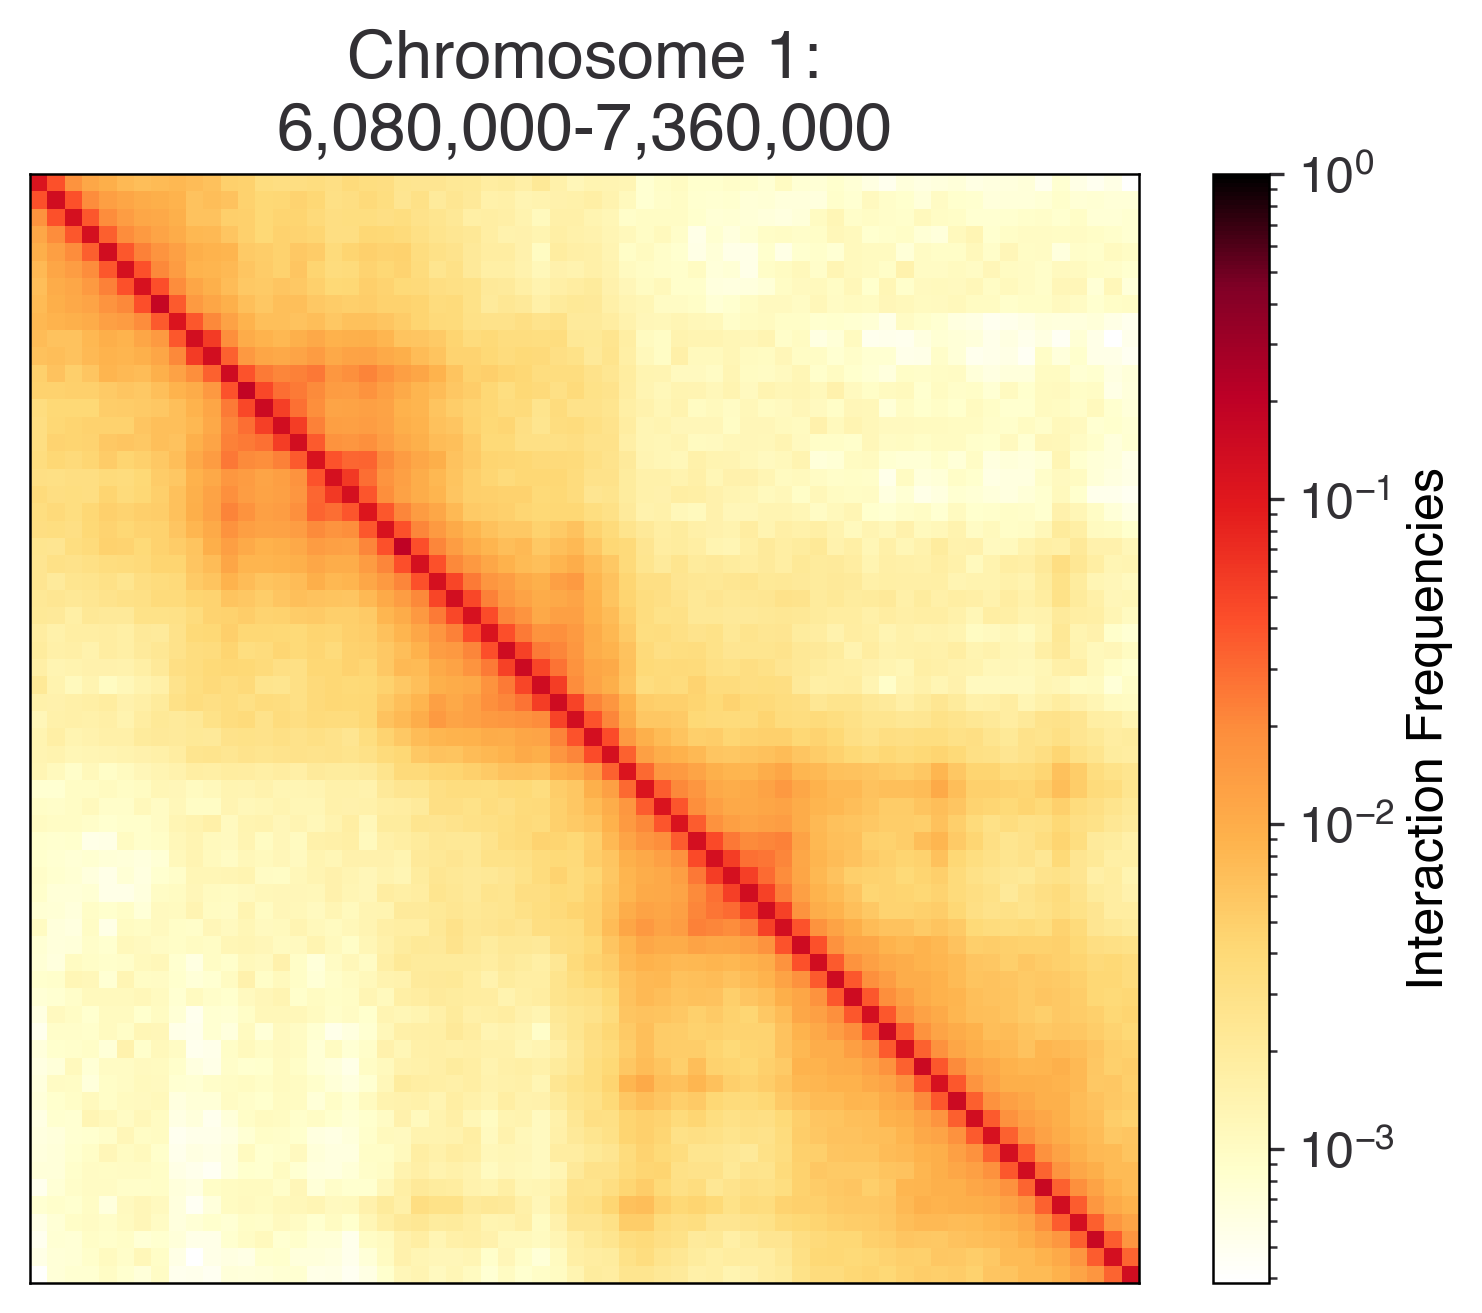

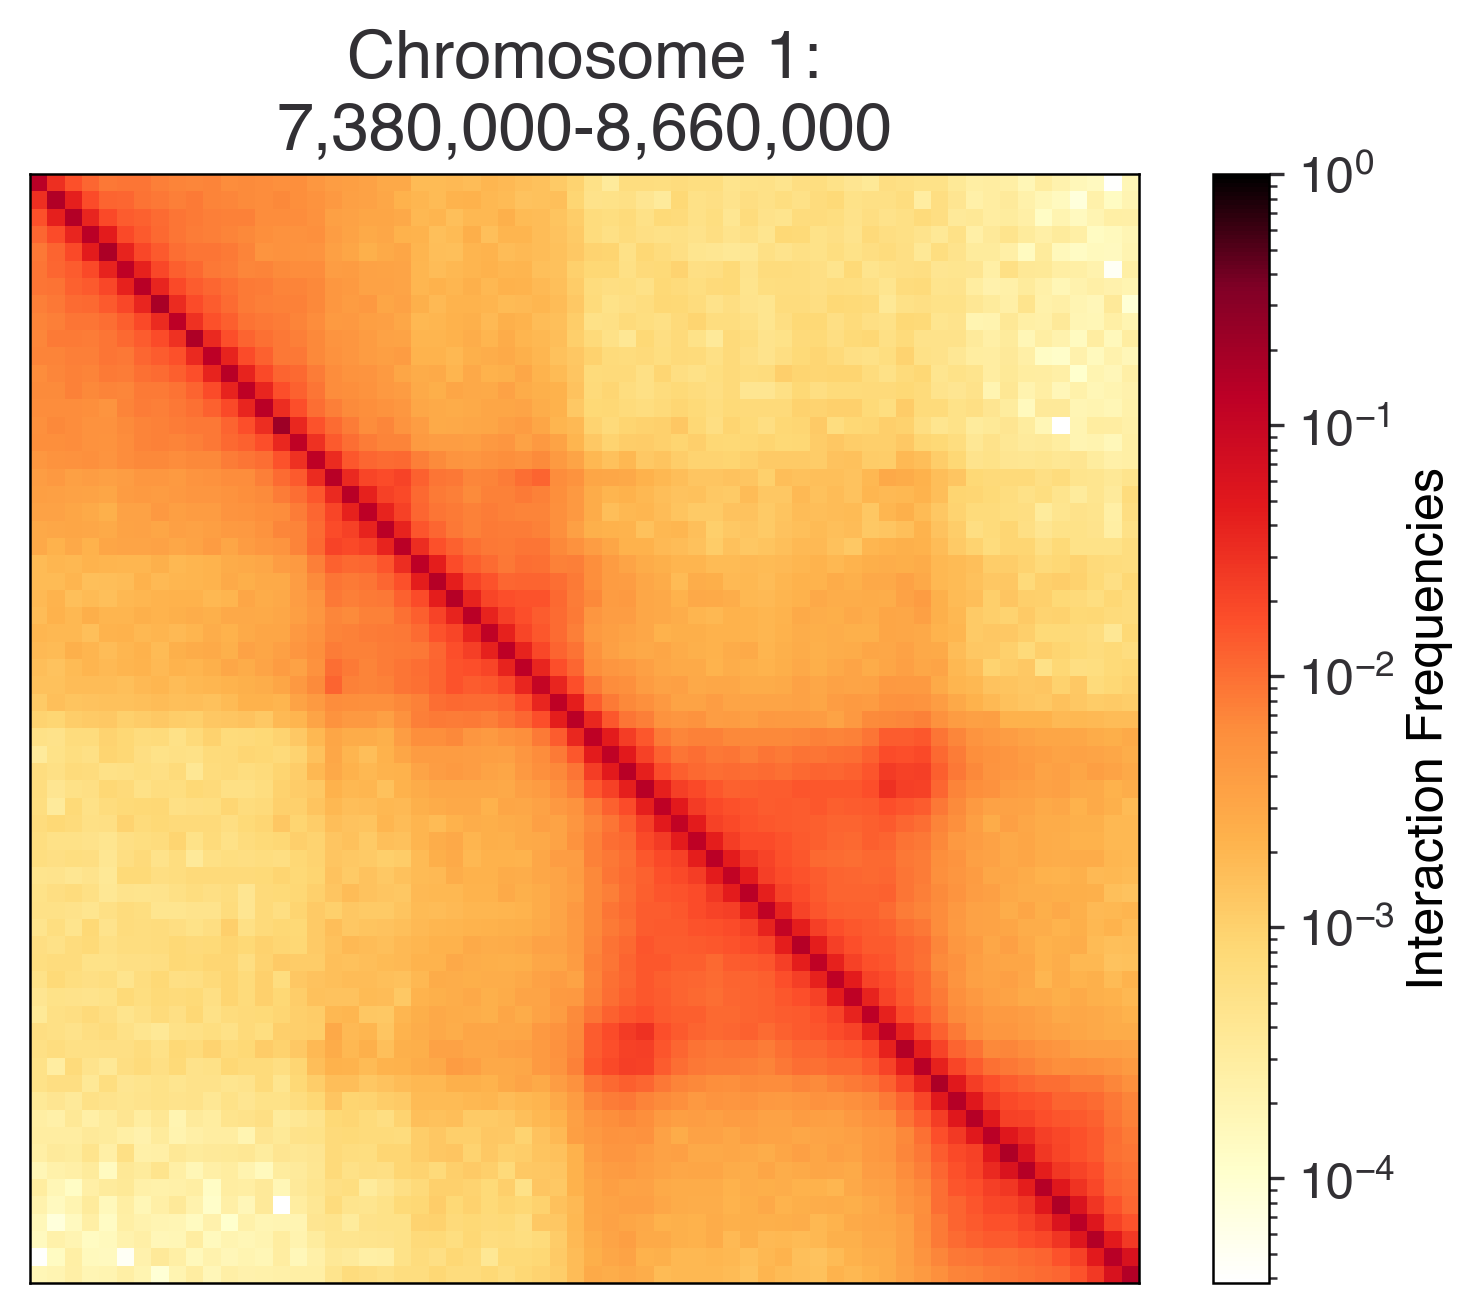

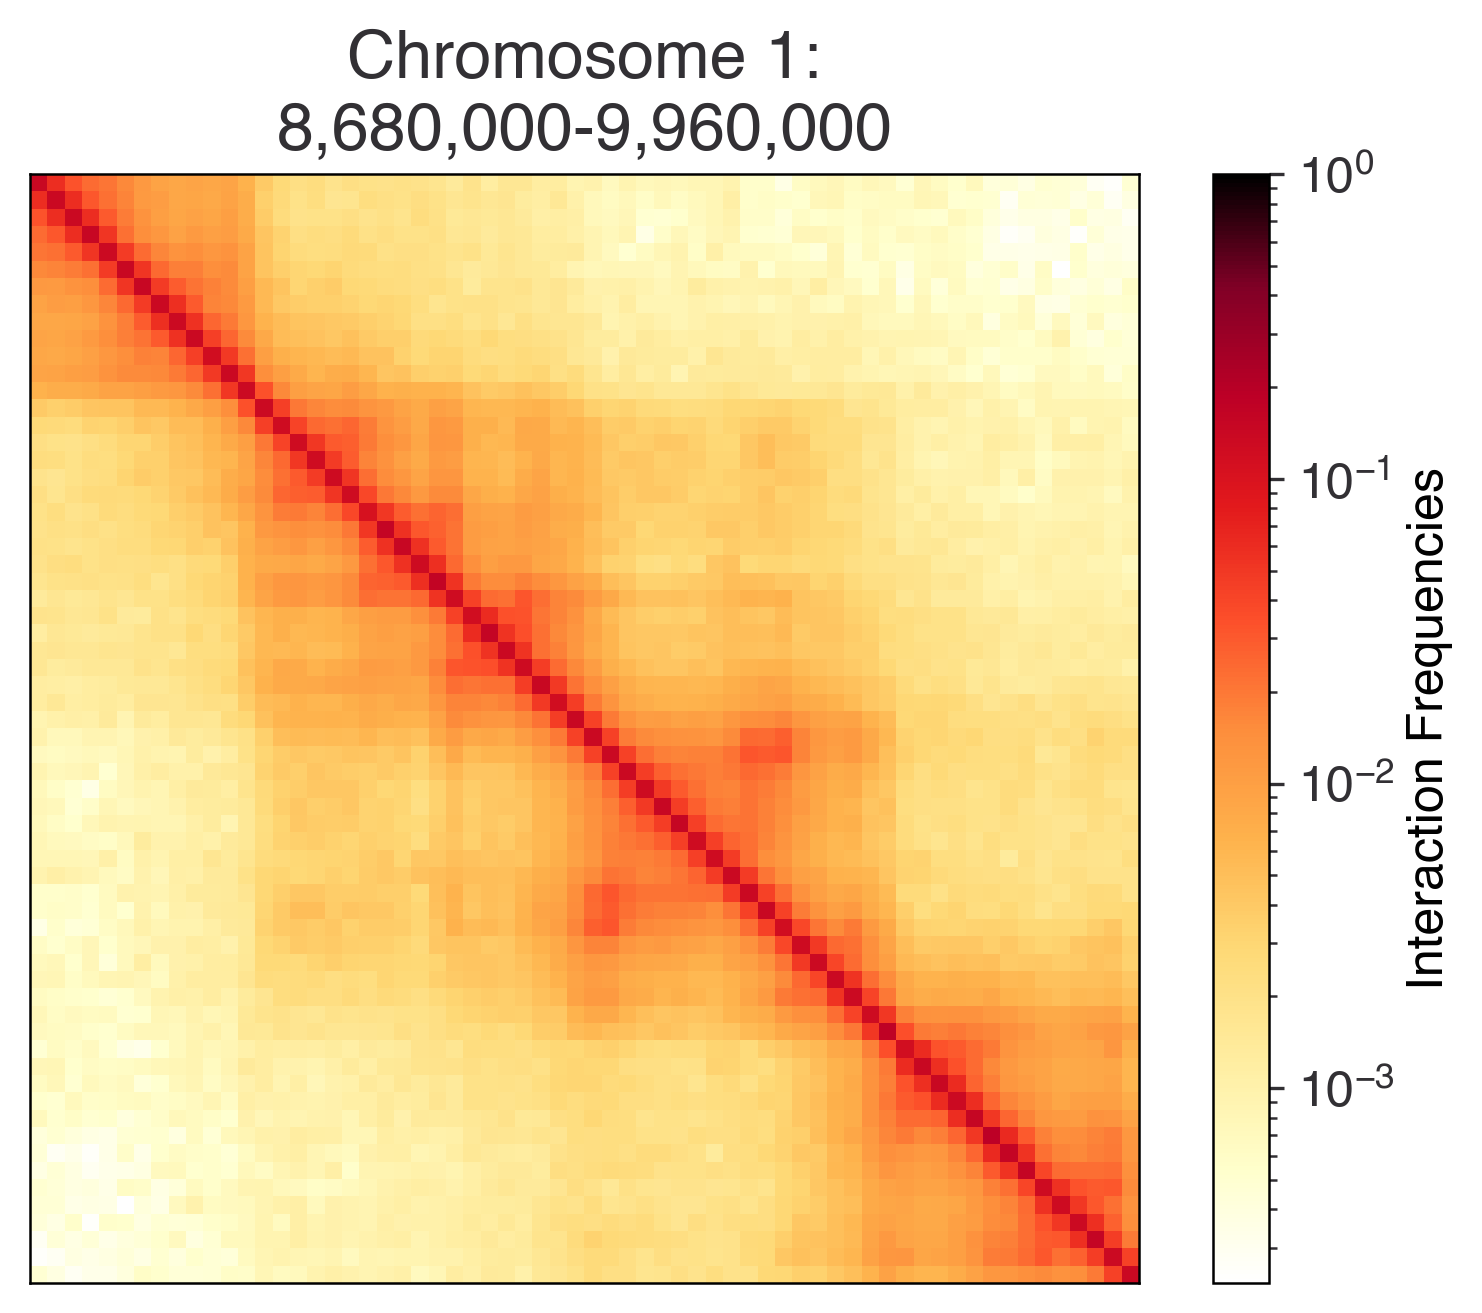

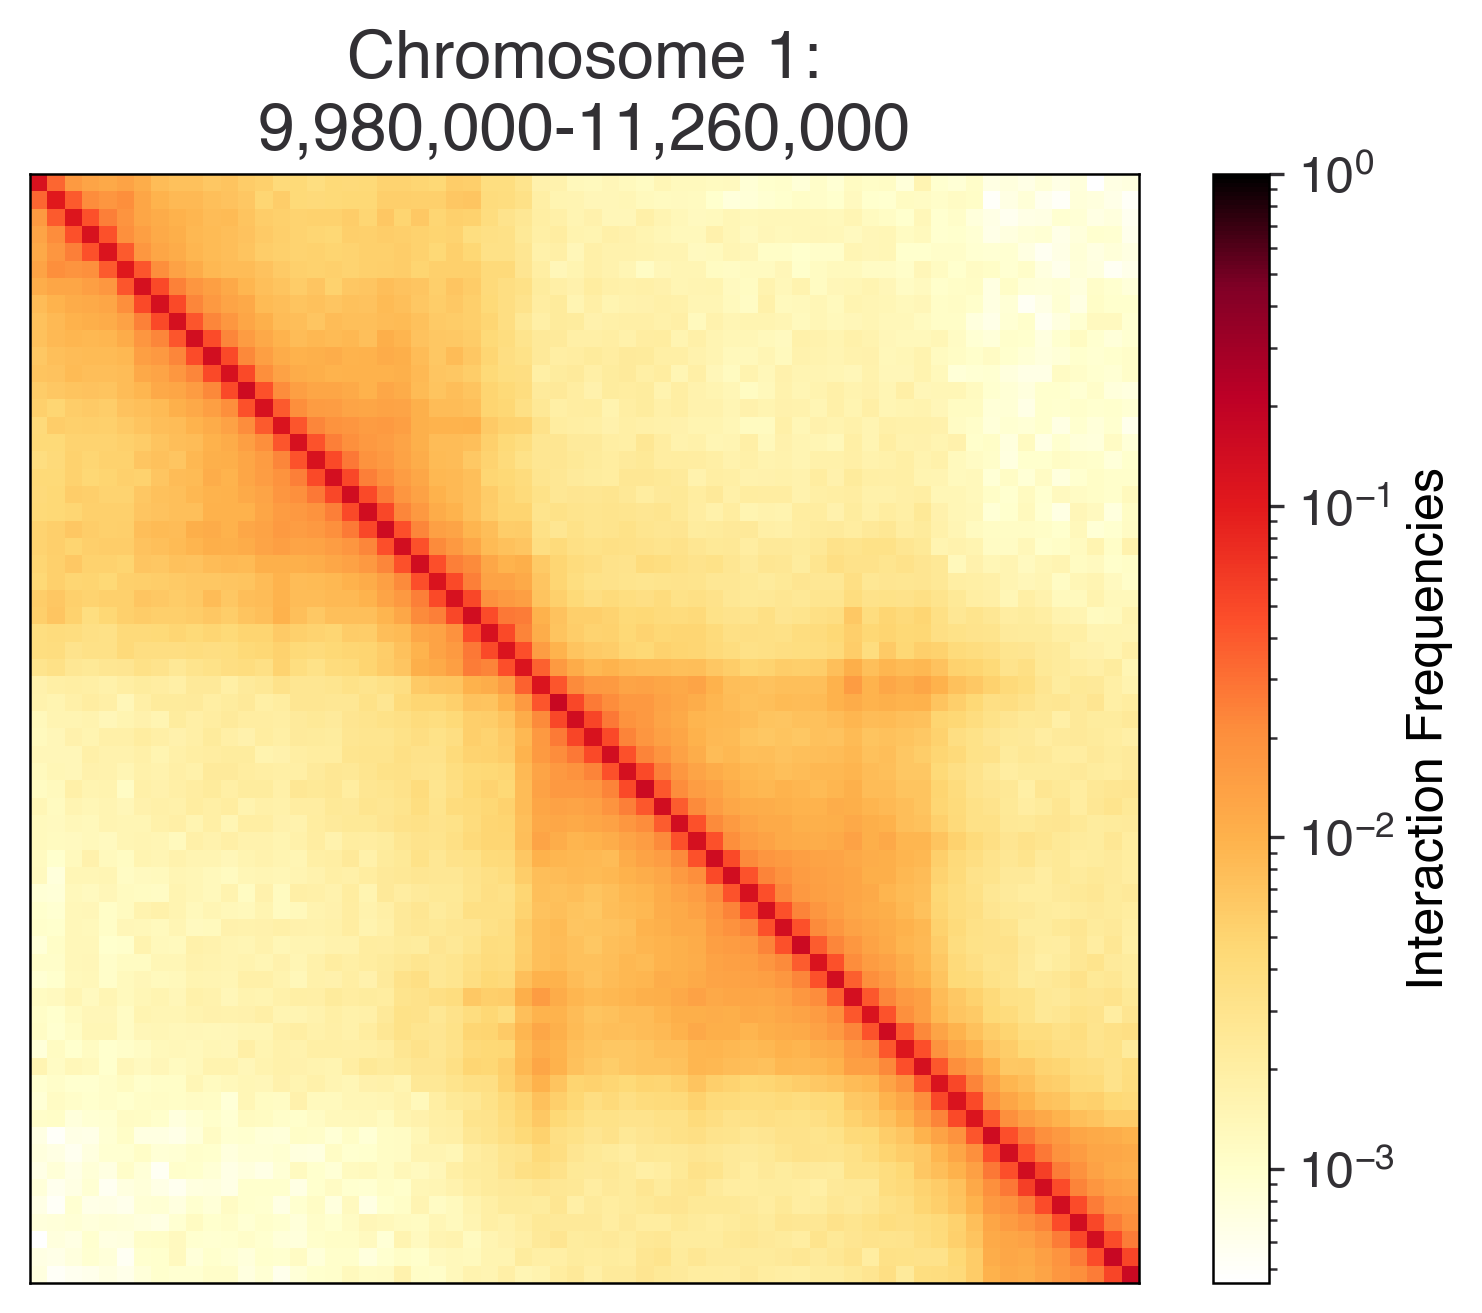

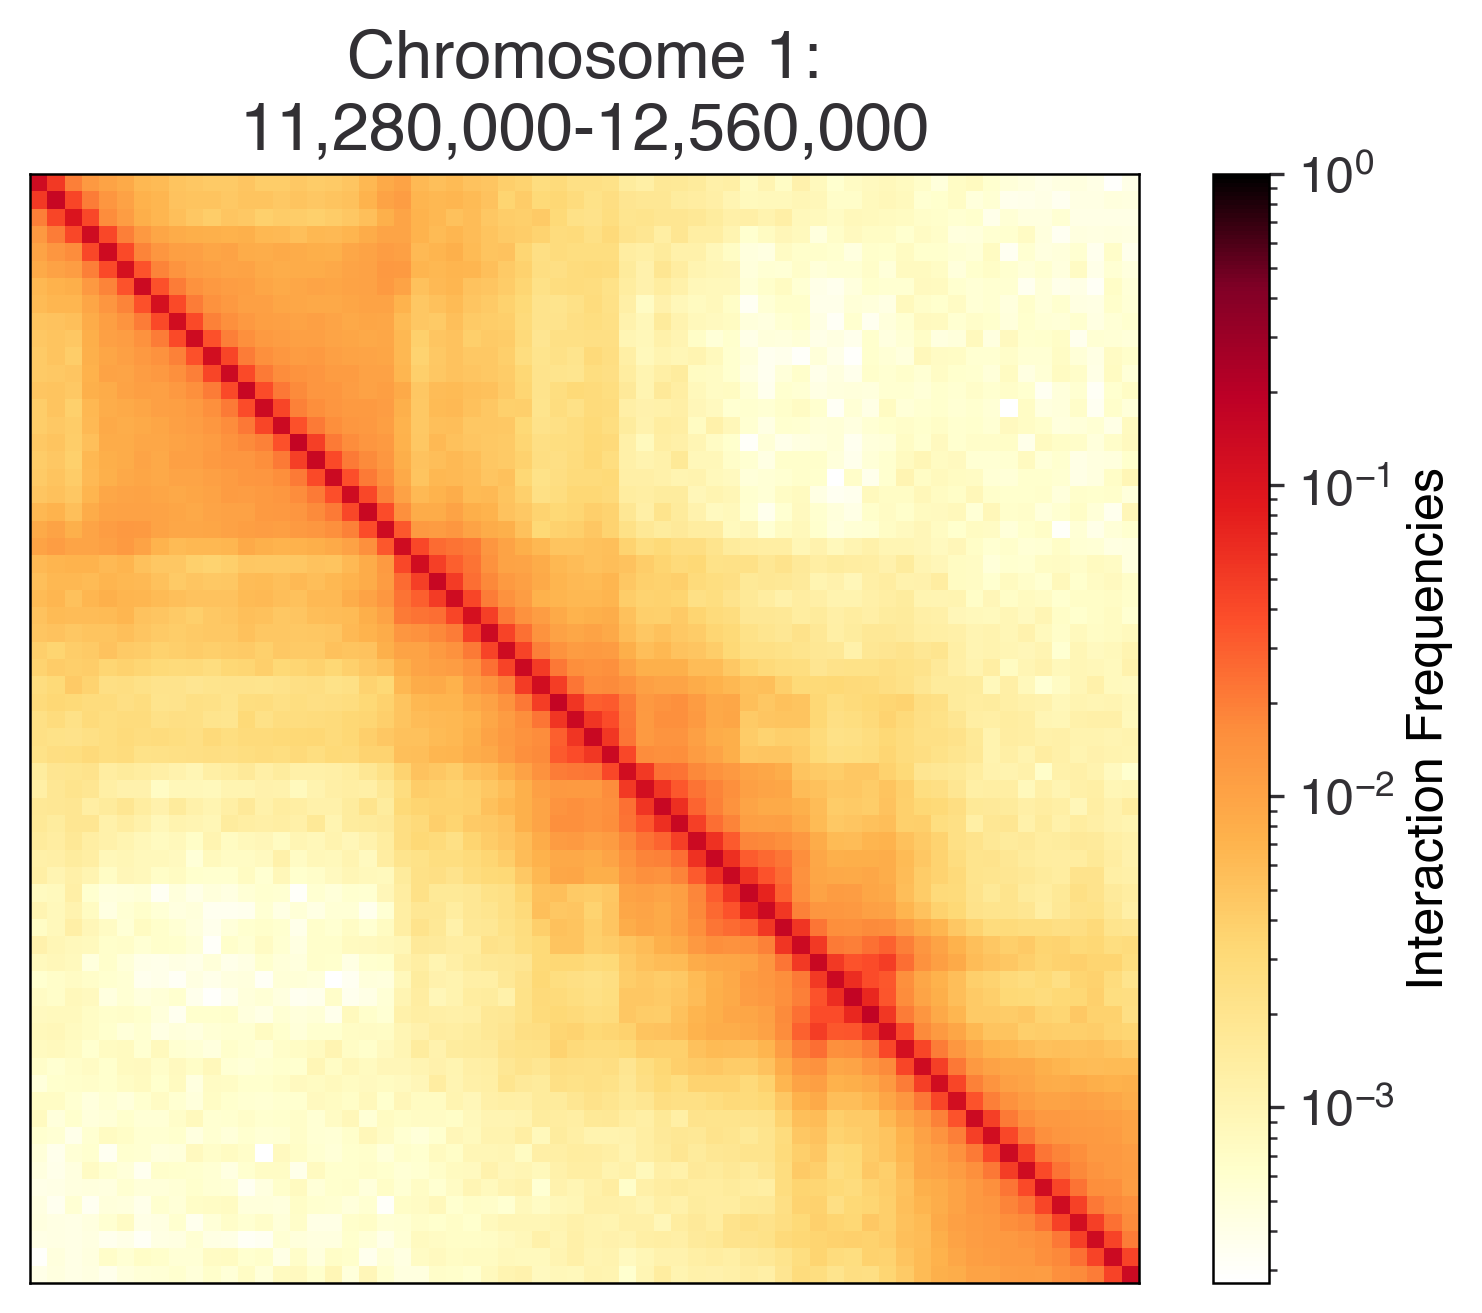

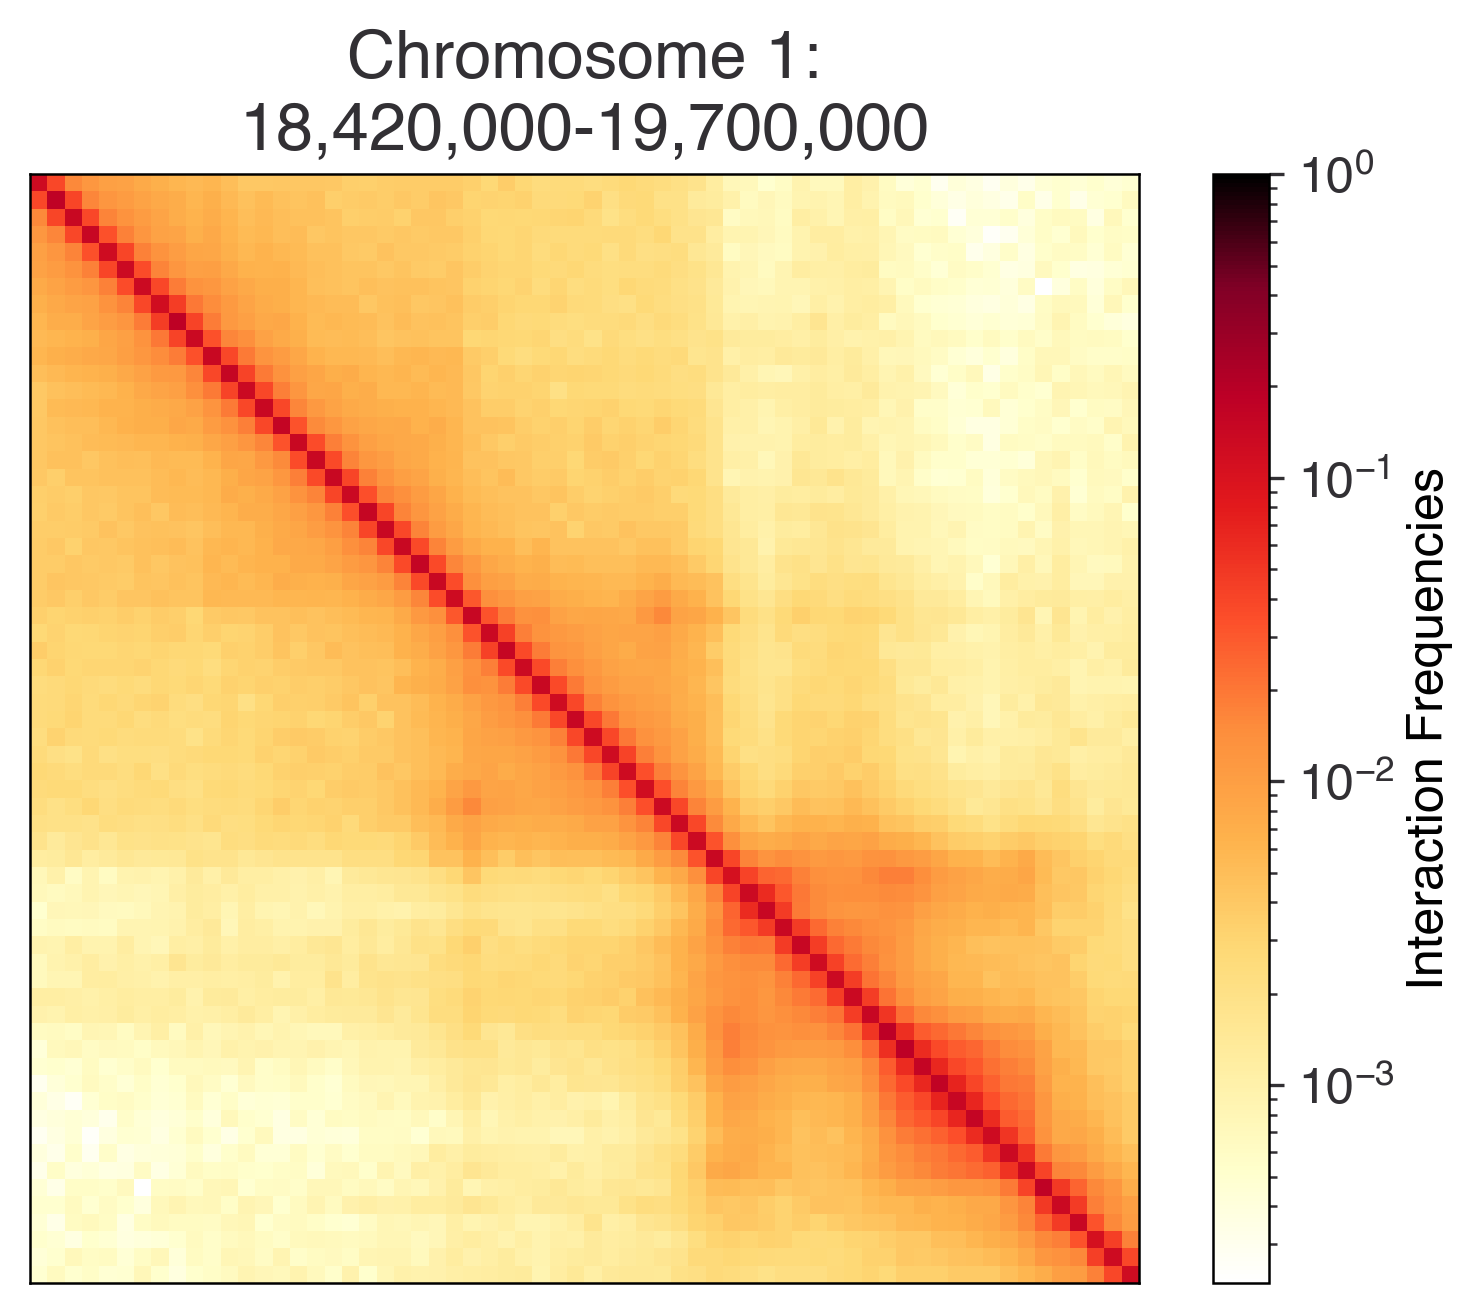

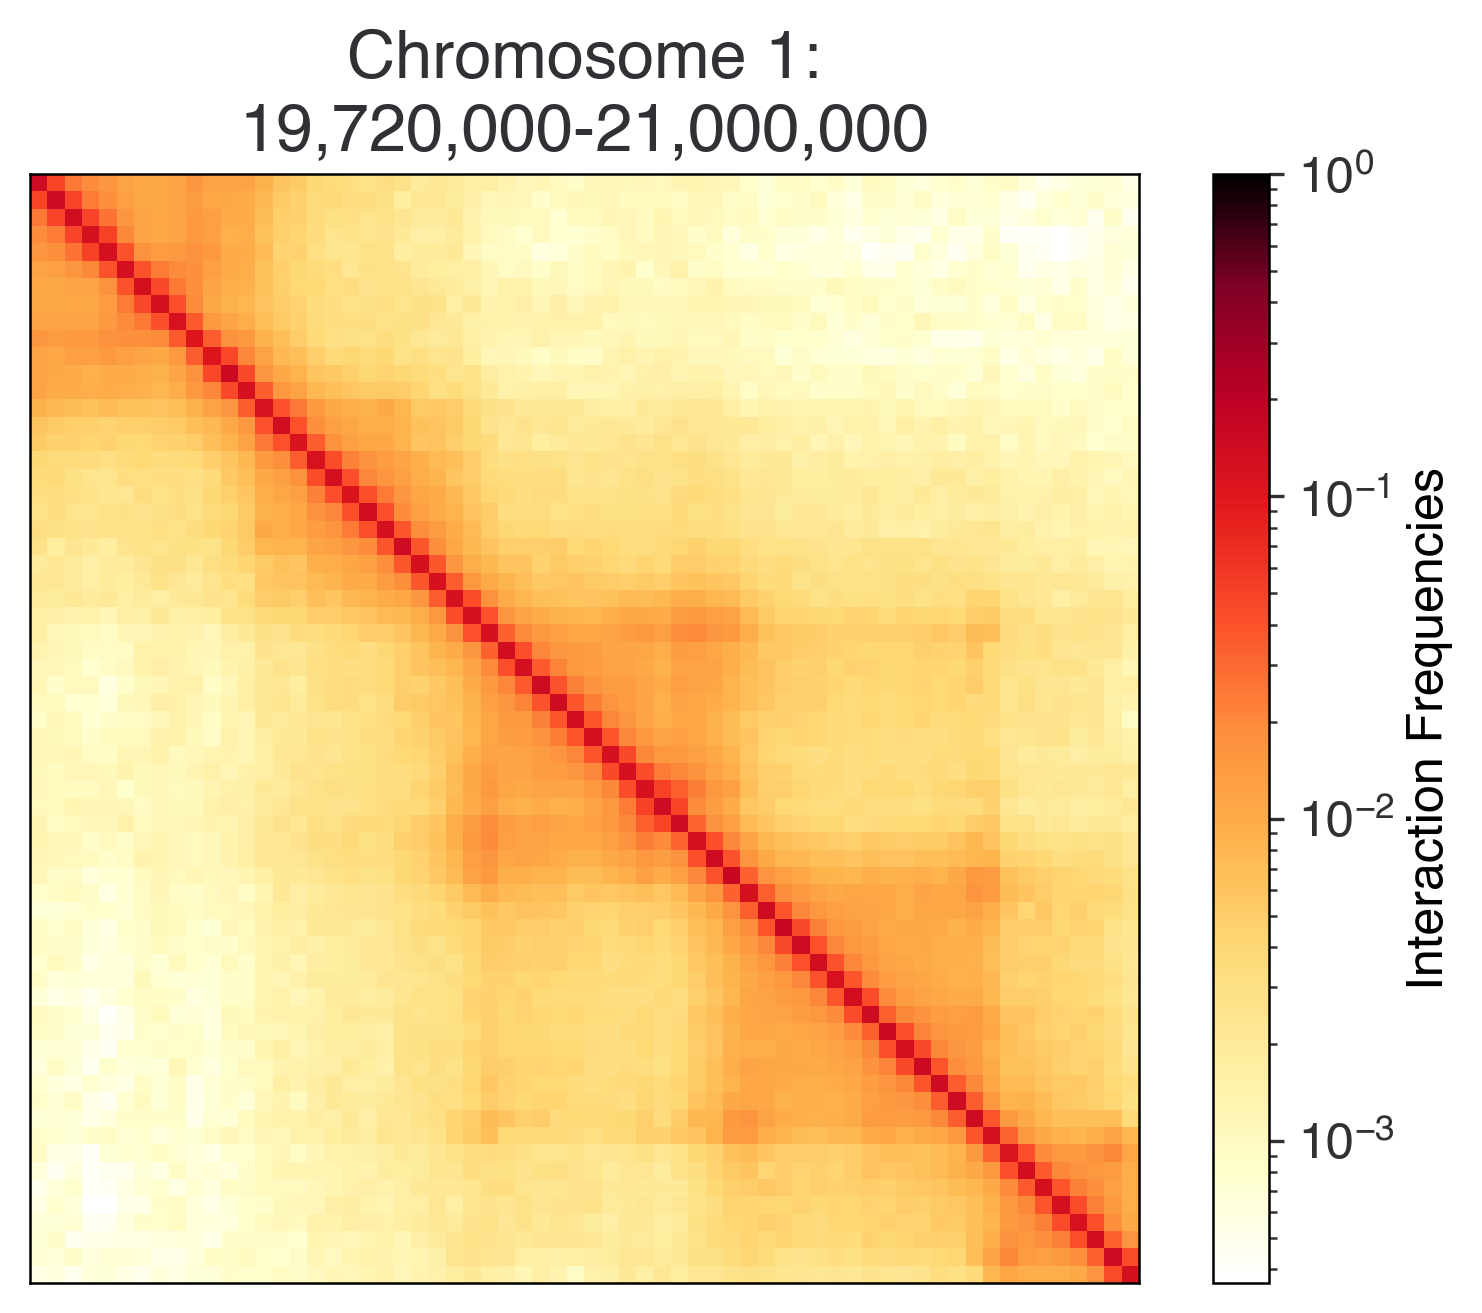

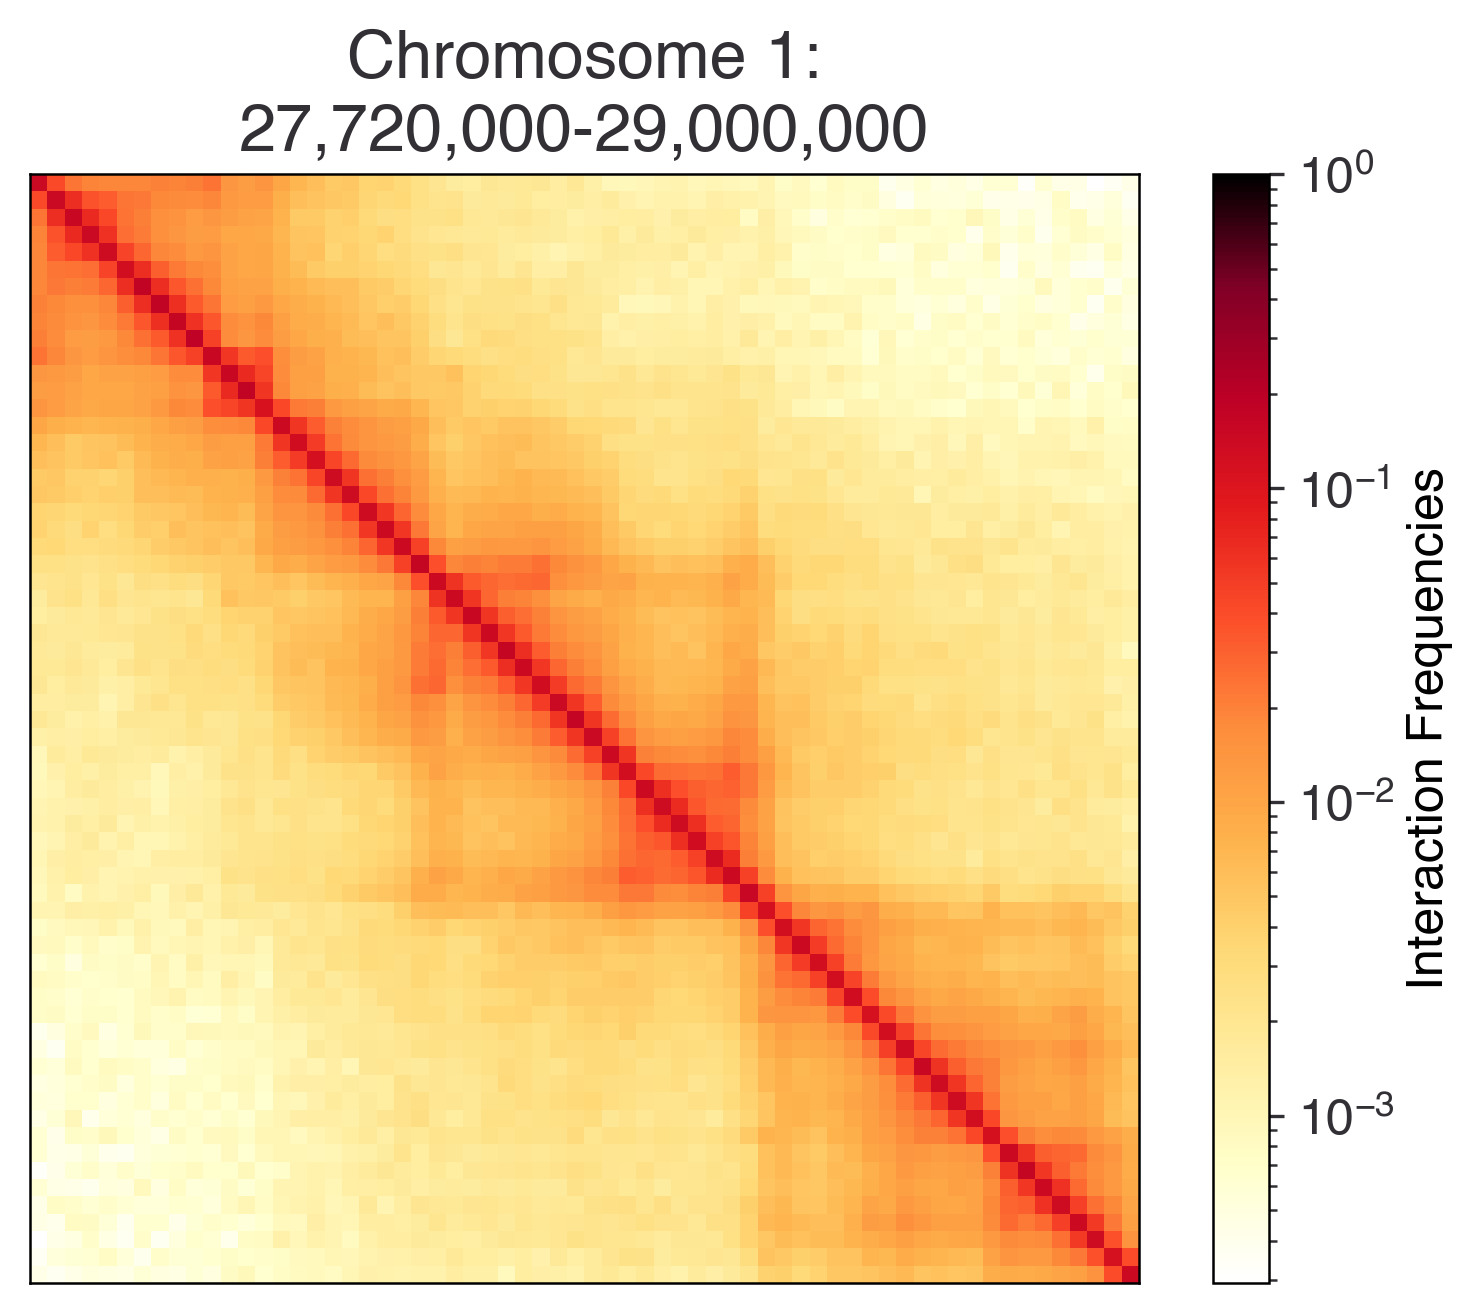

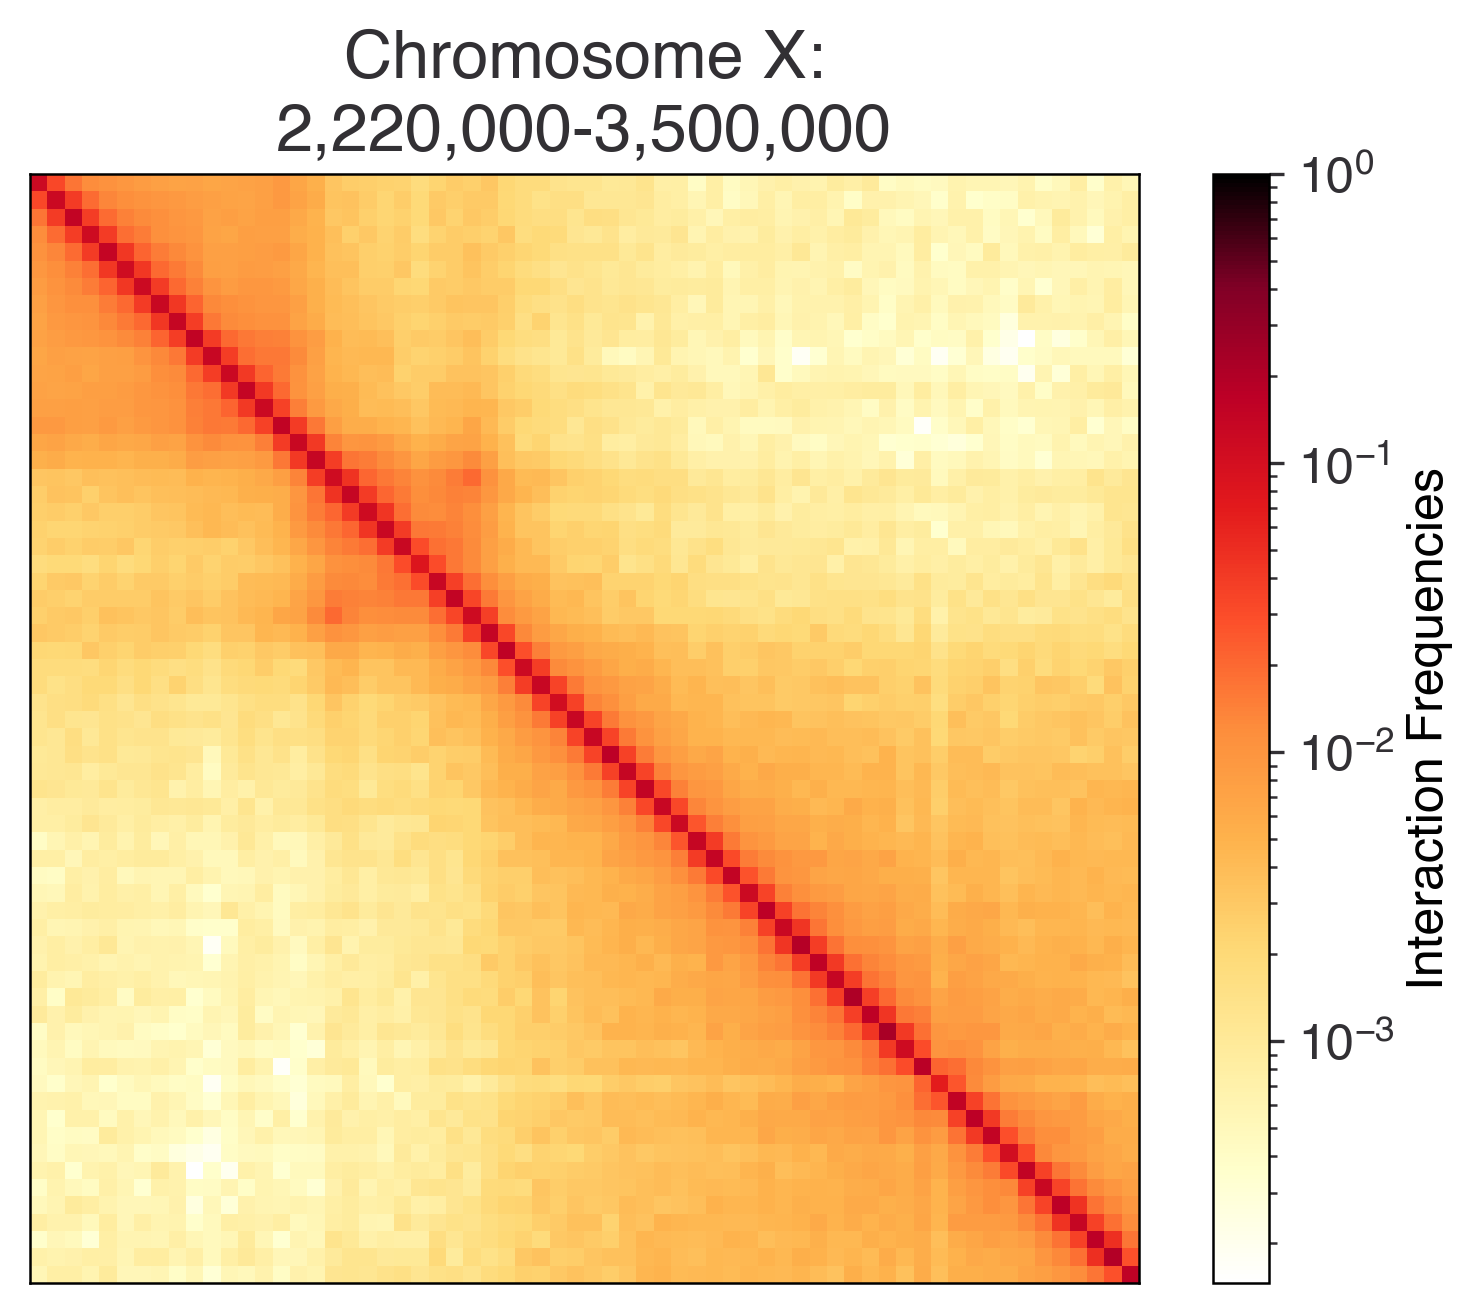

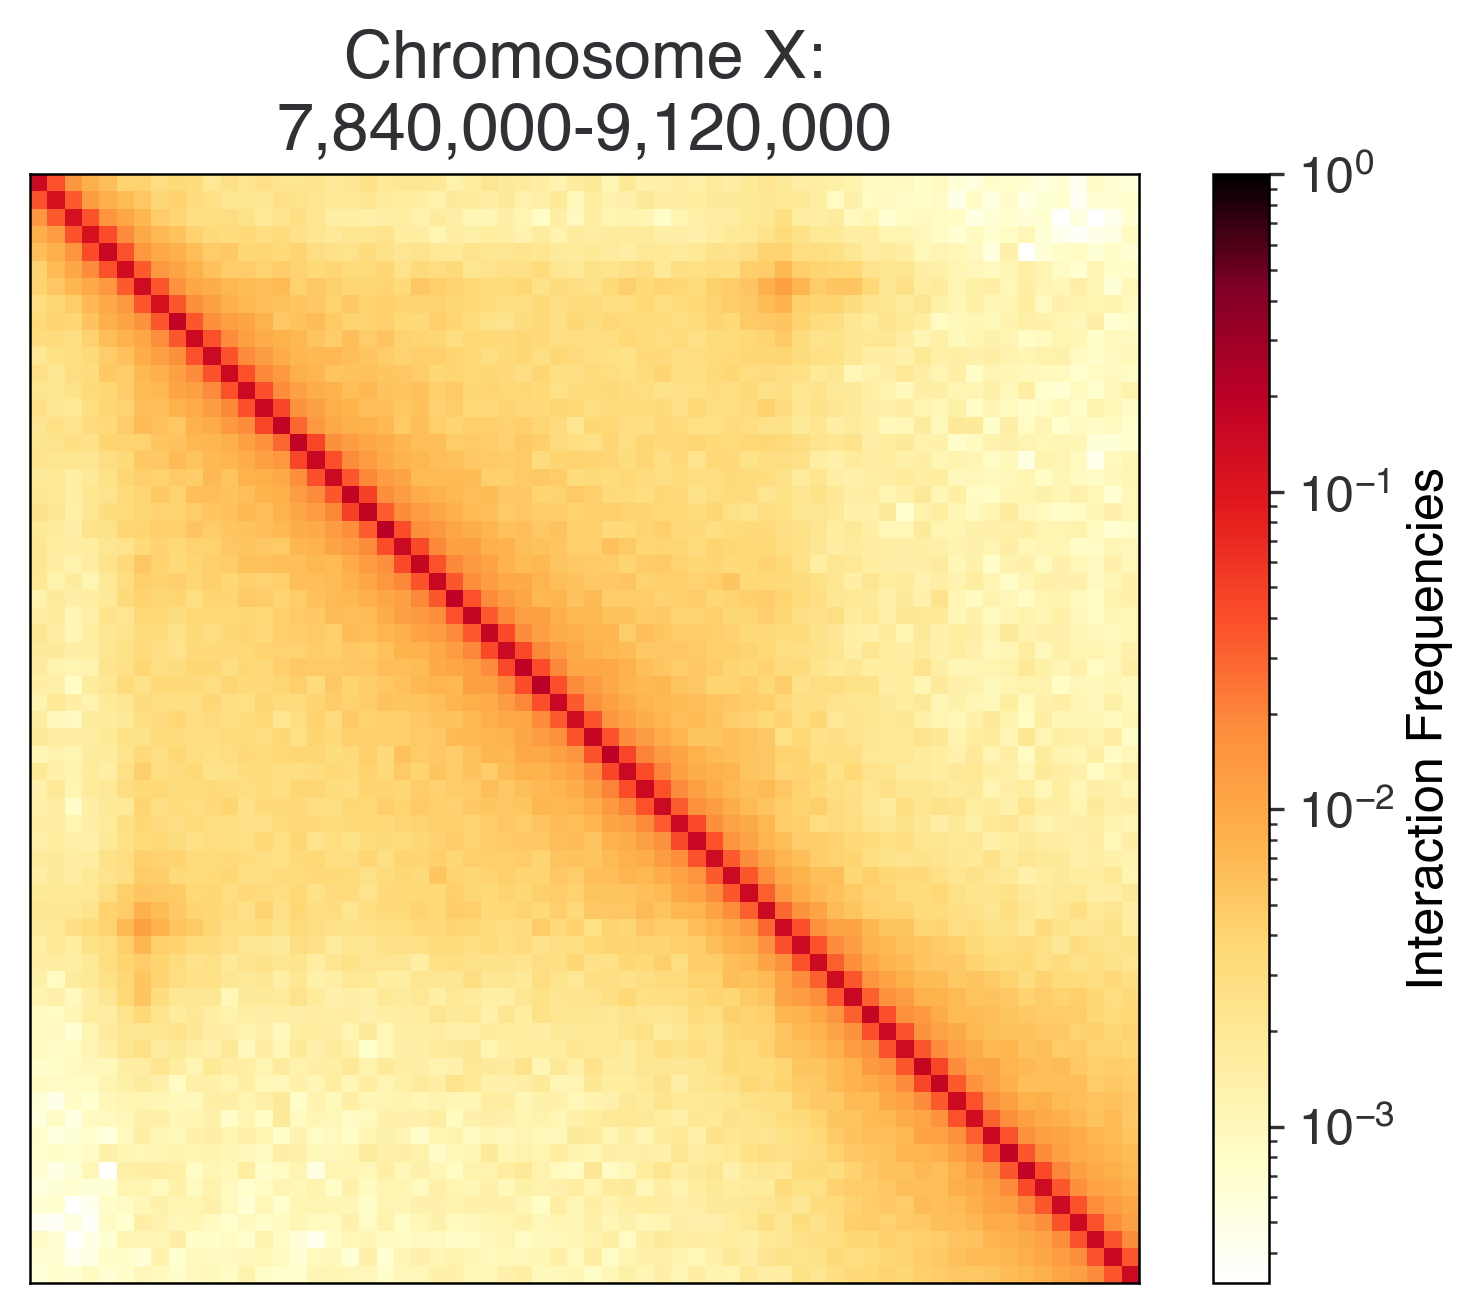

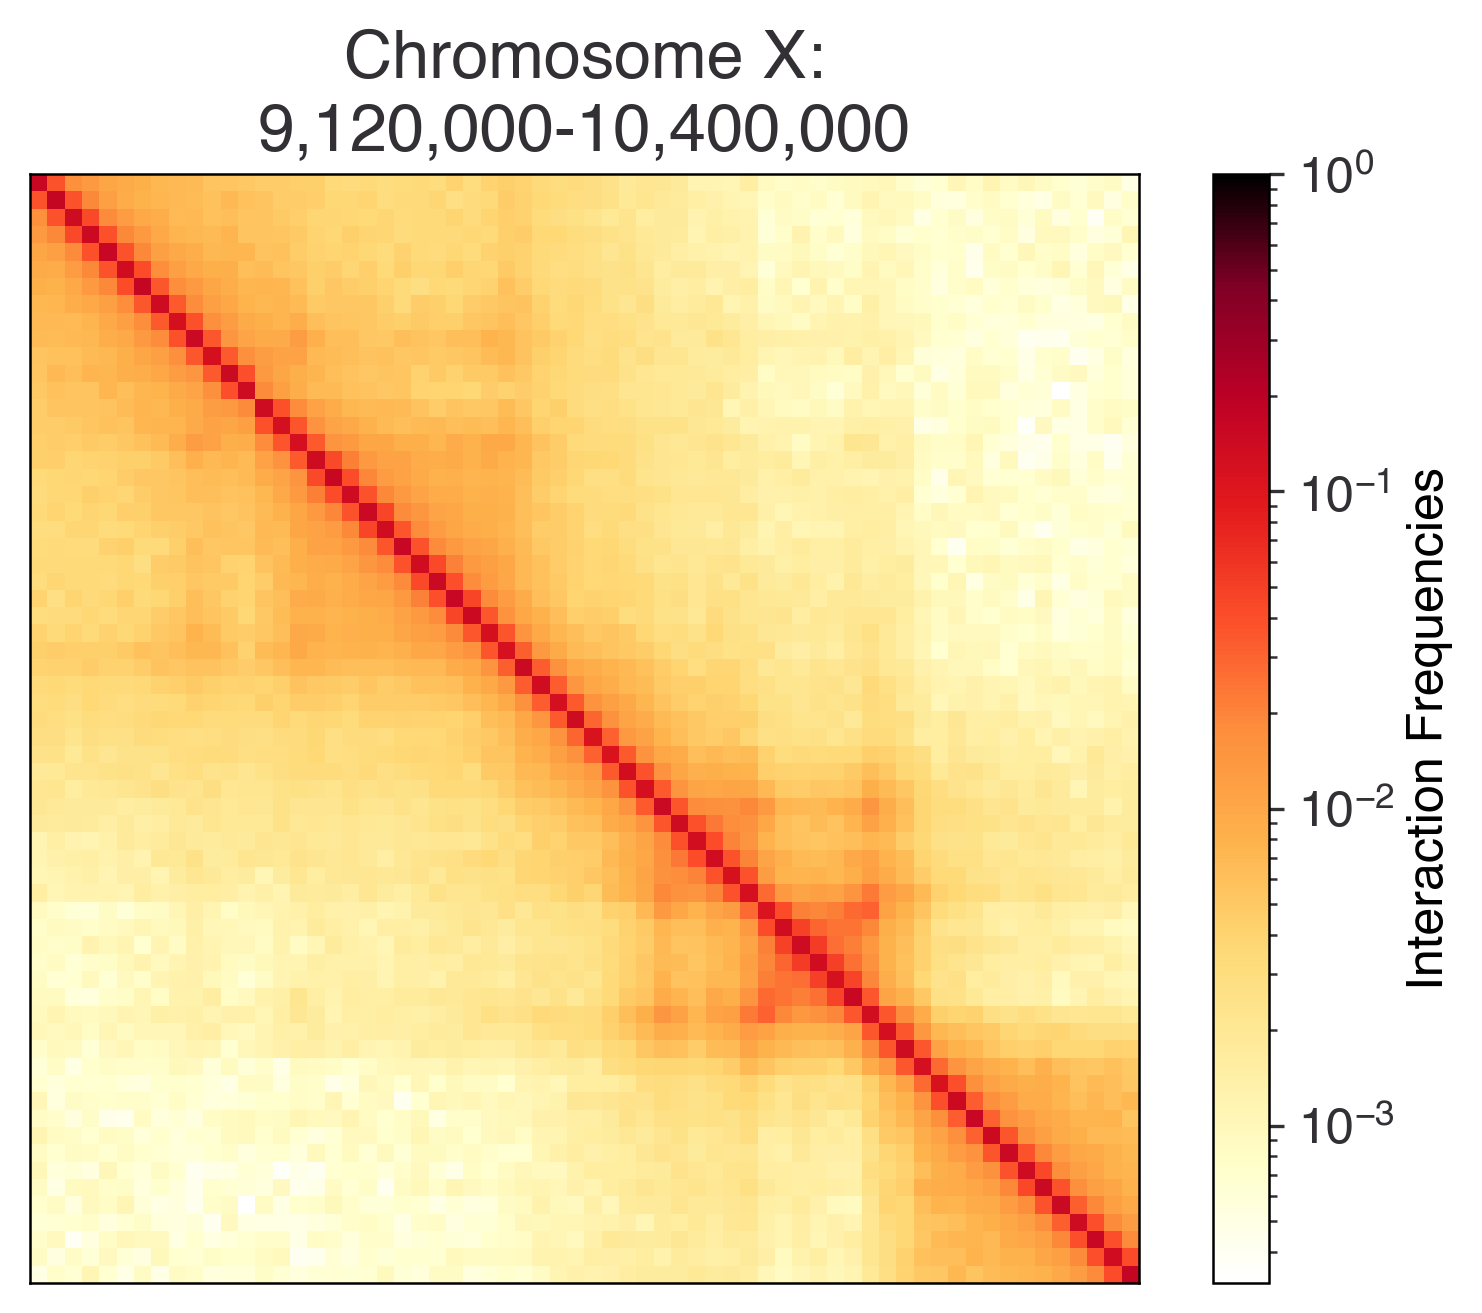

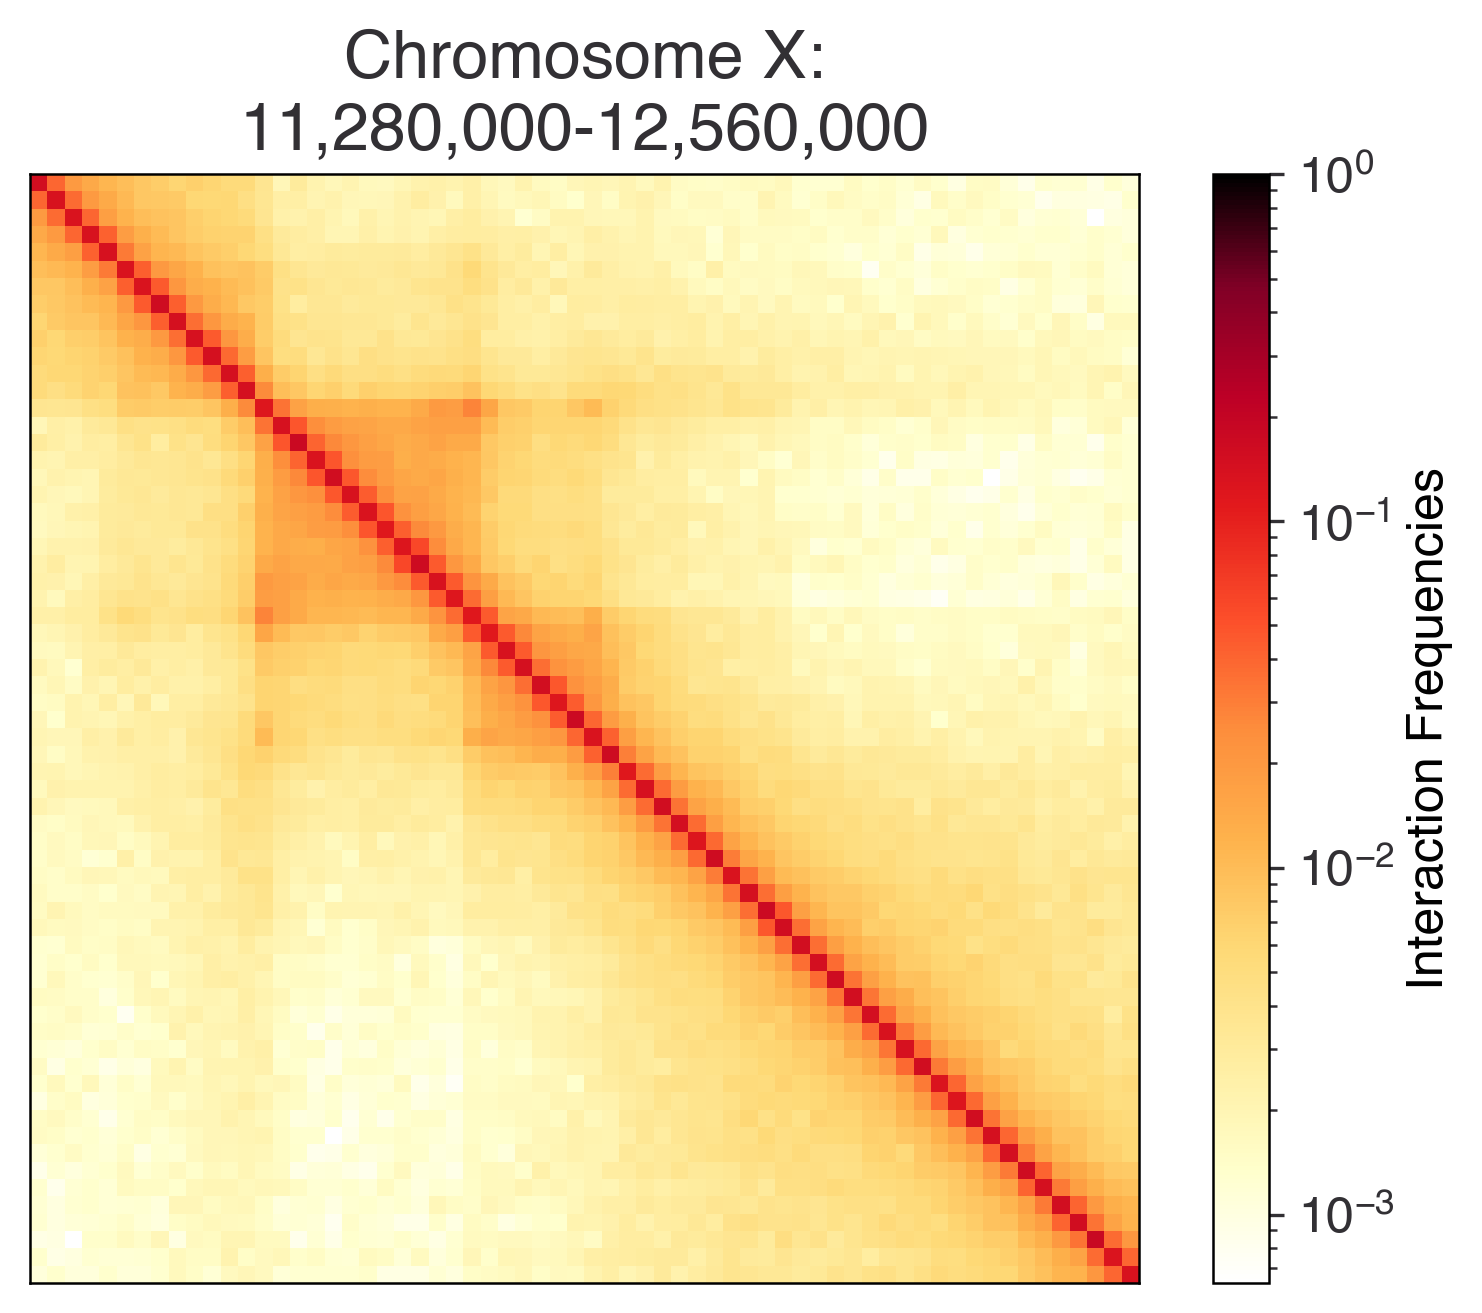

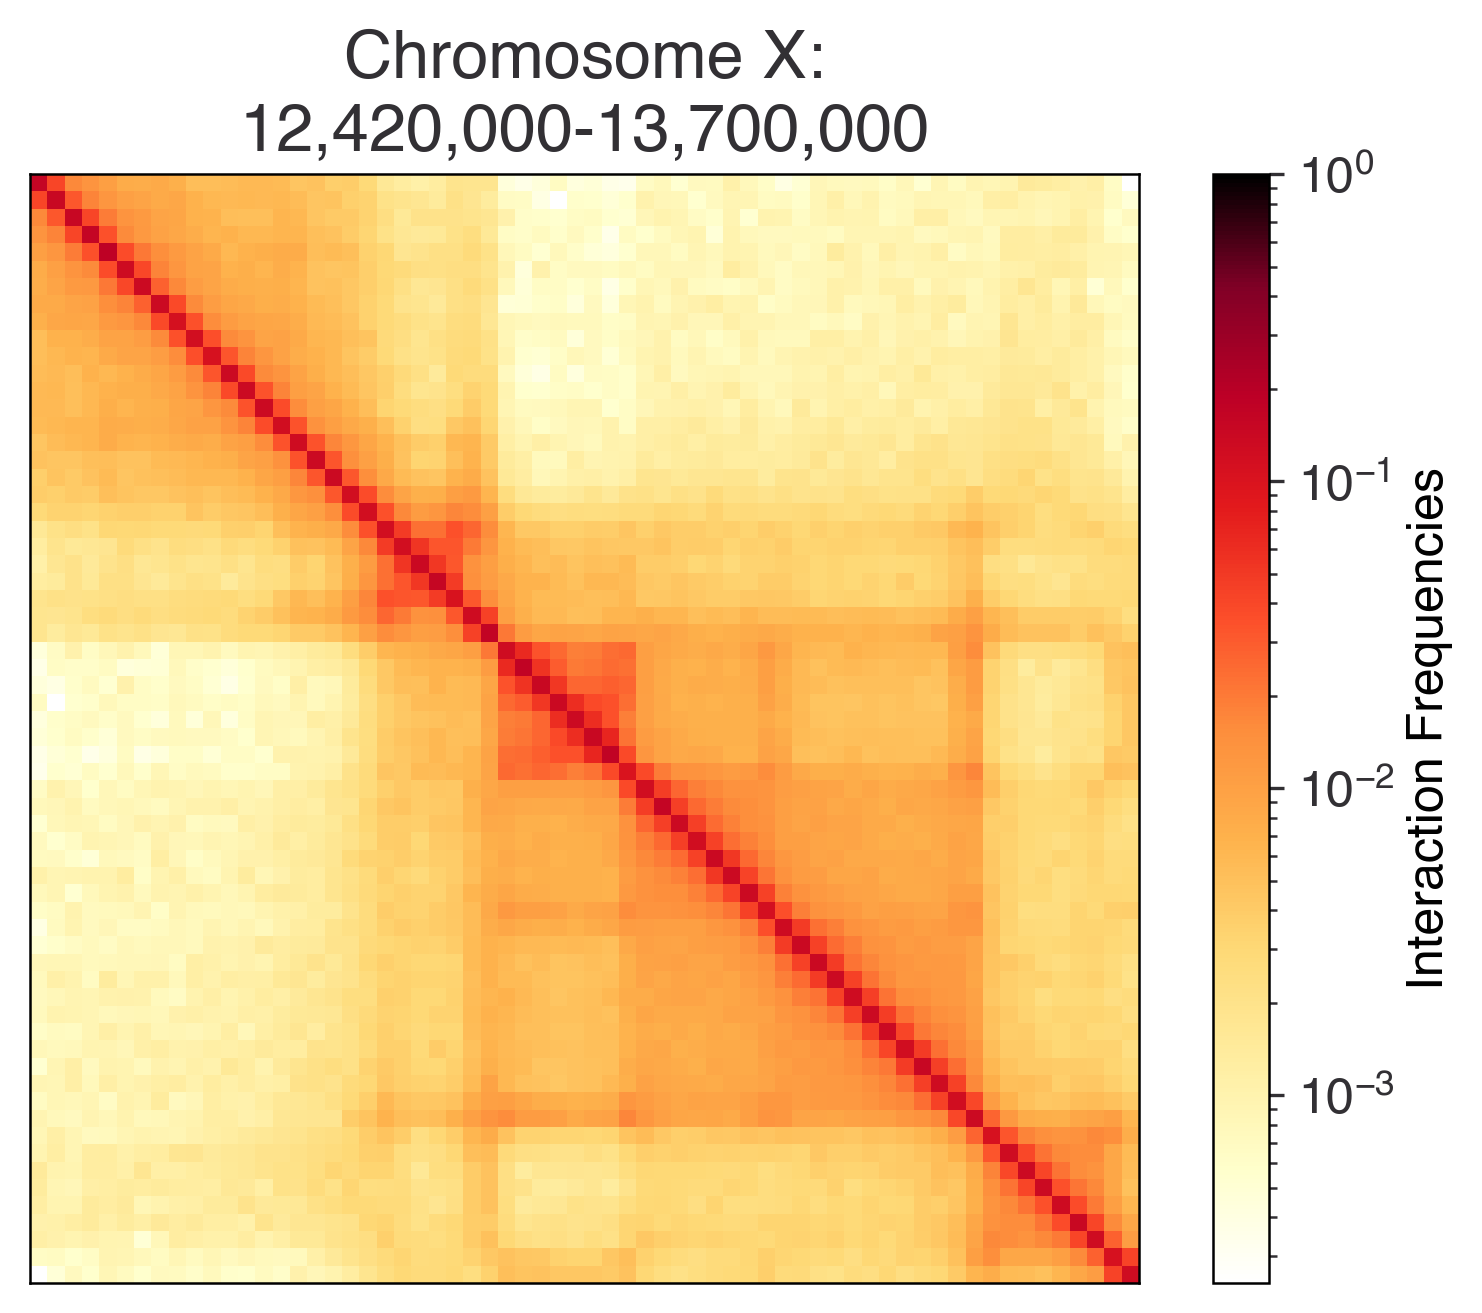

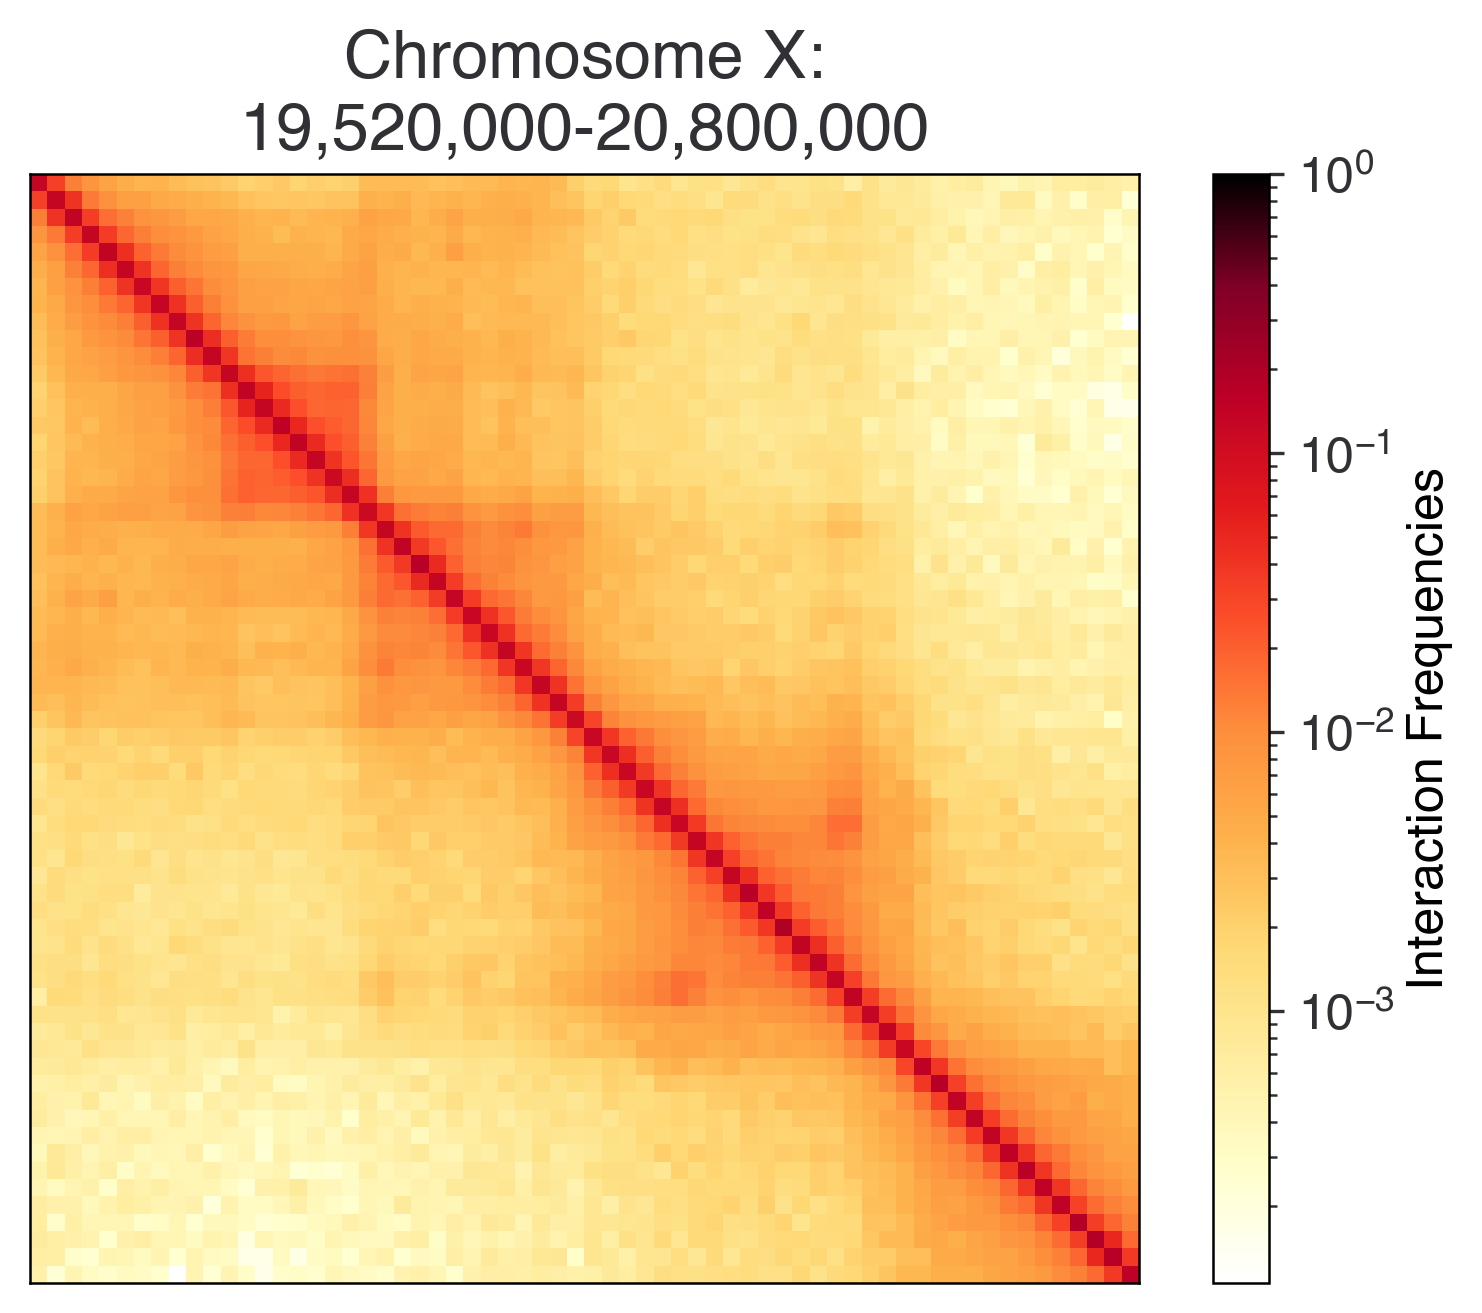

In [18]:
for chrom in regions:
    for region_idx in regions[chrom]:
        fig,ax,im,cbar = fetch_region(chrom,region_idx).plot()
        start = index[chrom][region_idx][-1]
        stop = start + resolution * nbeads
        ax.set_title(f'Chromosome {chrom}:'+'\n'+f'{start:,}-{stop:,}')
        fig.savefig(f'./HiC/for_Zhuohan/chr{chrom}_{start}_to_{stop}.pdf')

[0, 2, 3, 4, 5, -4]

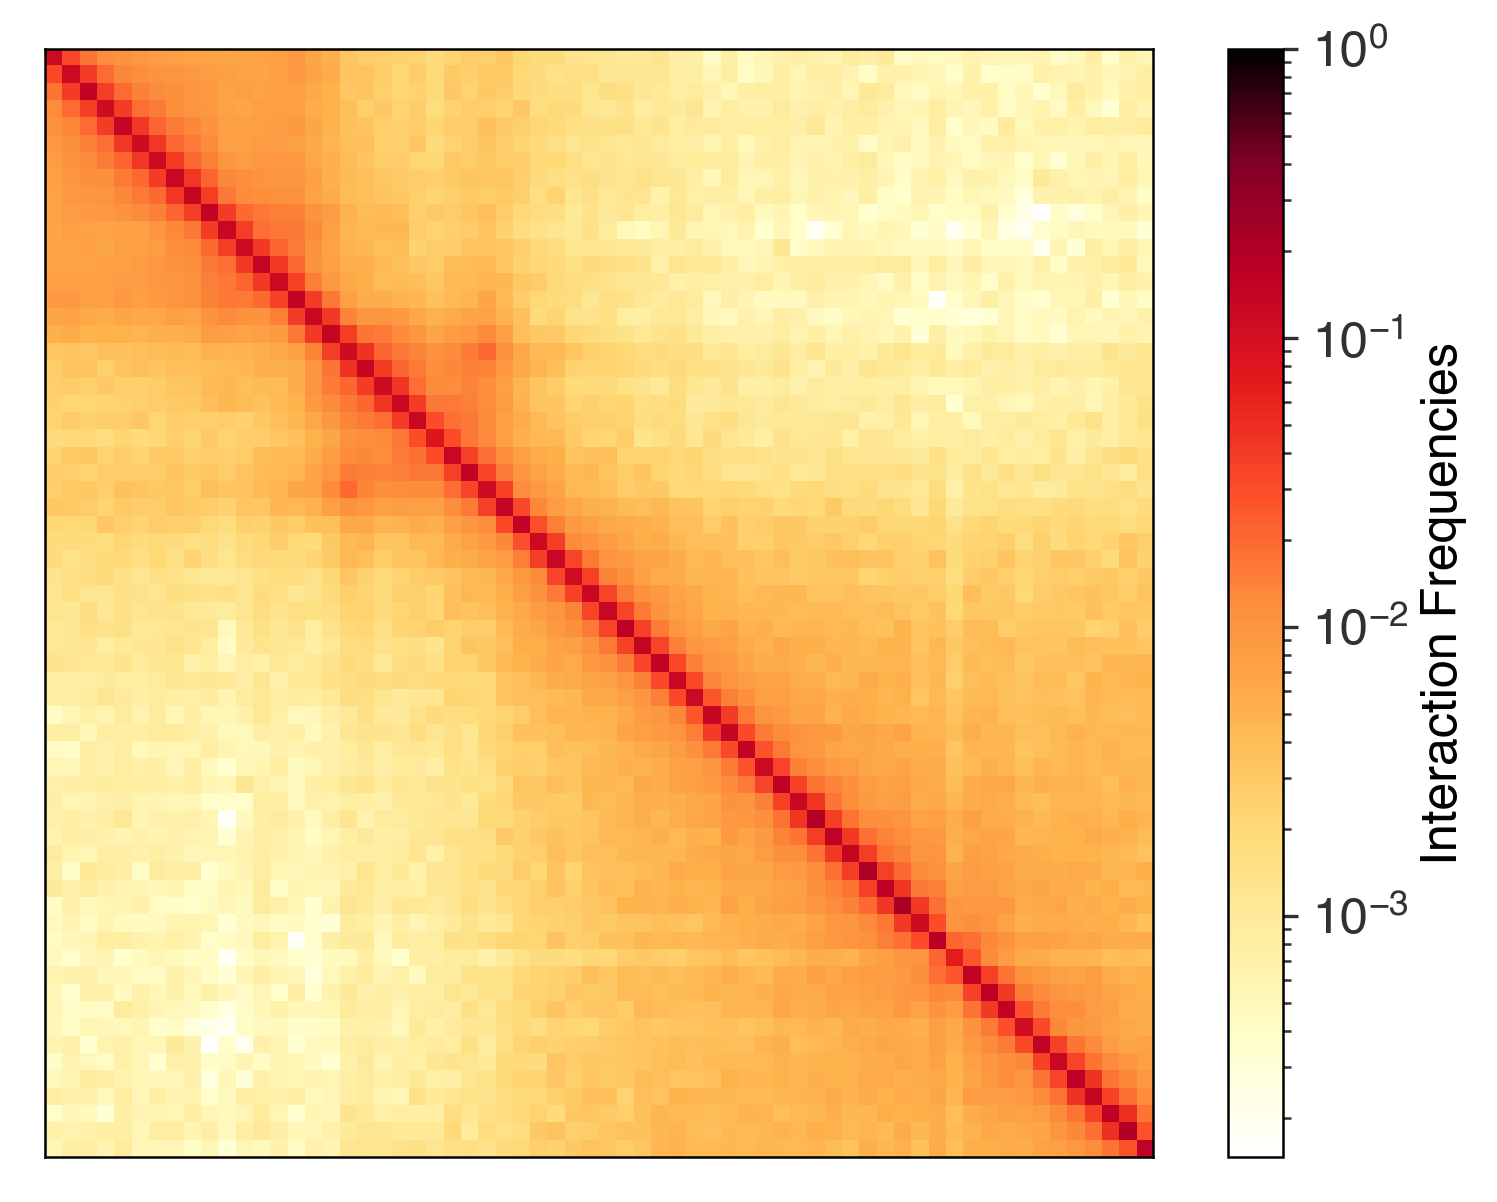

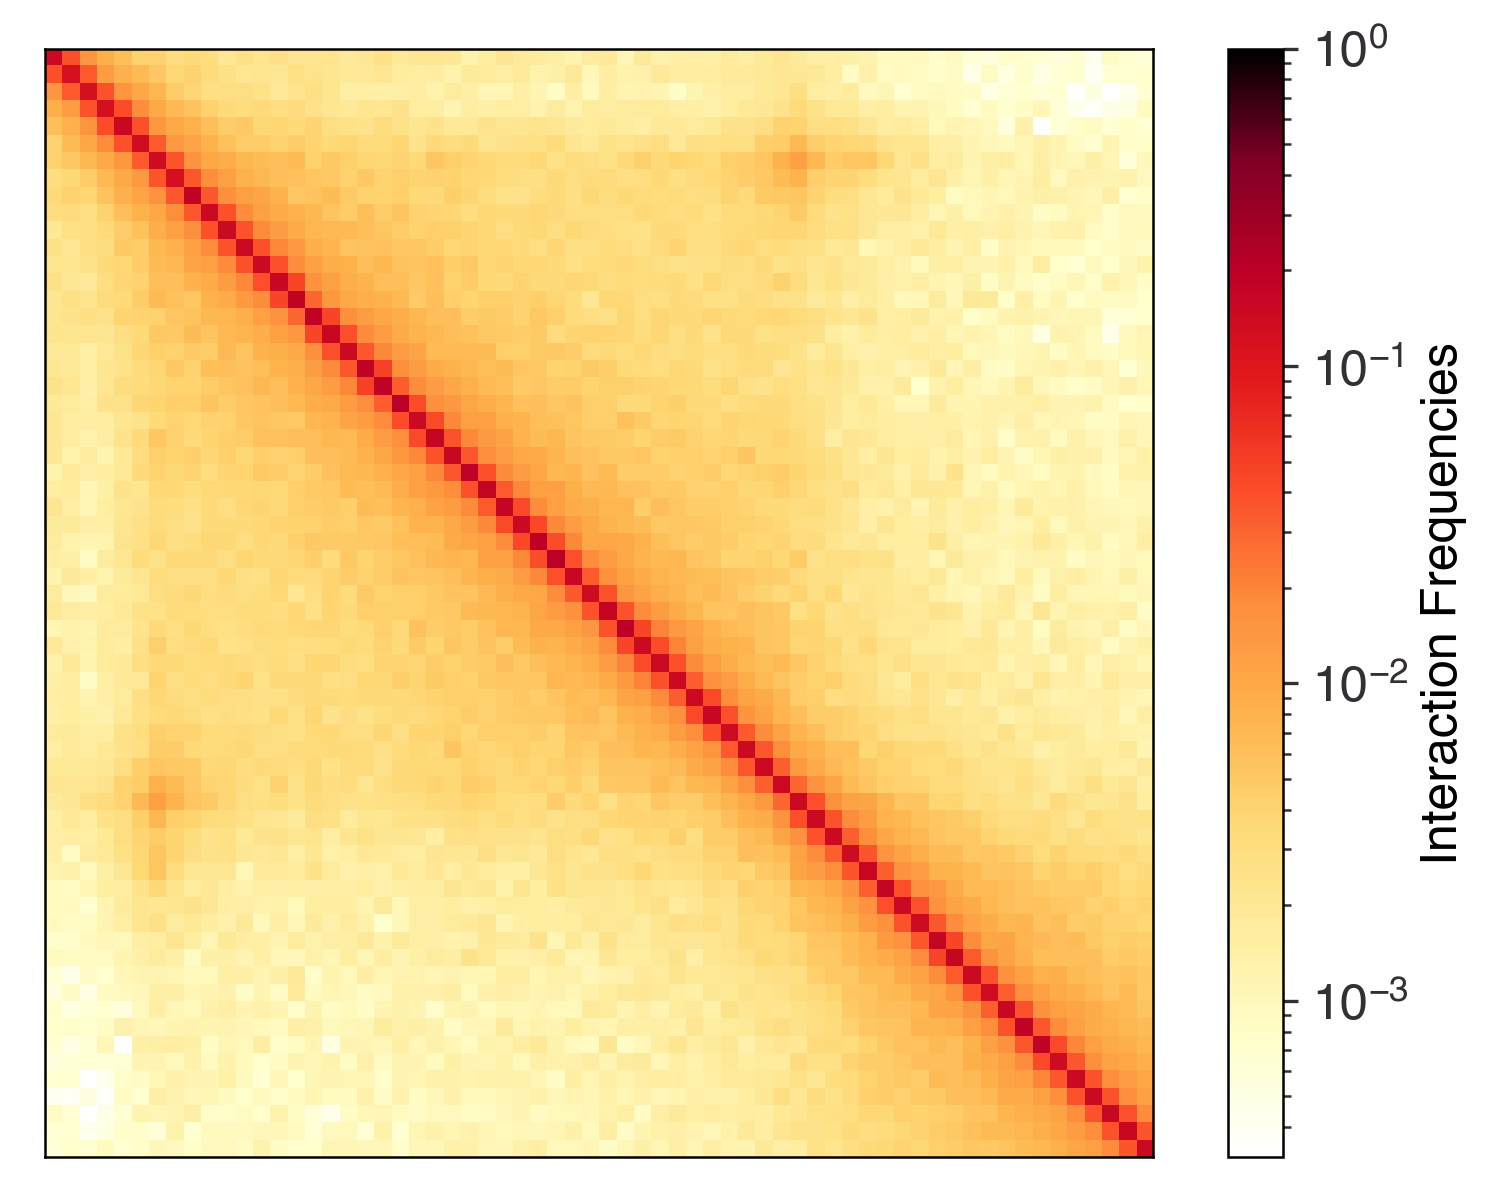

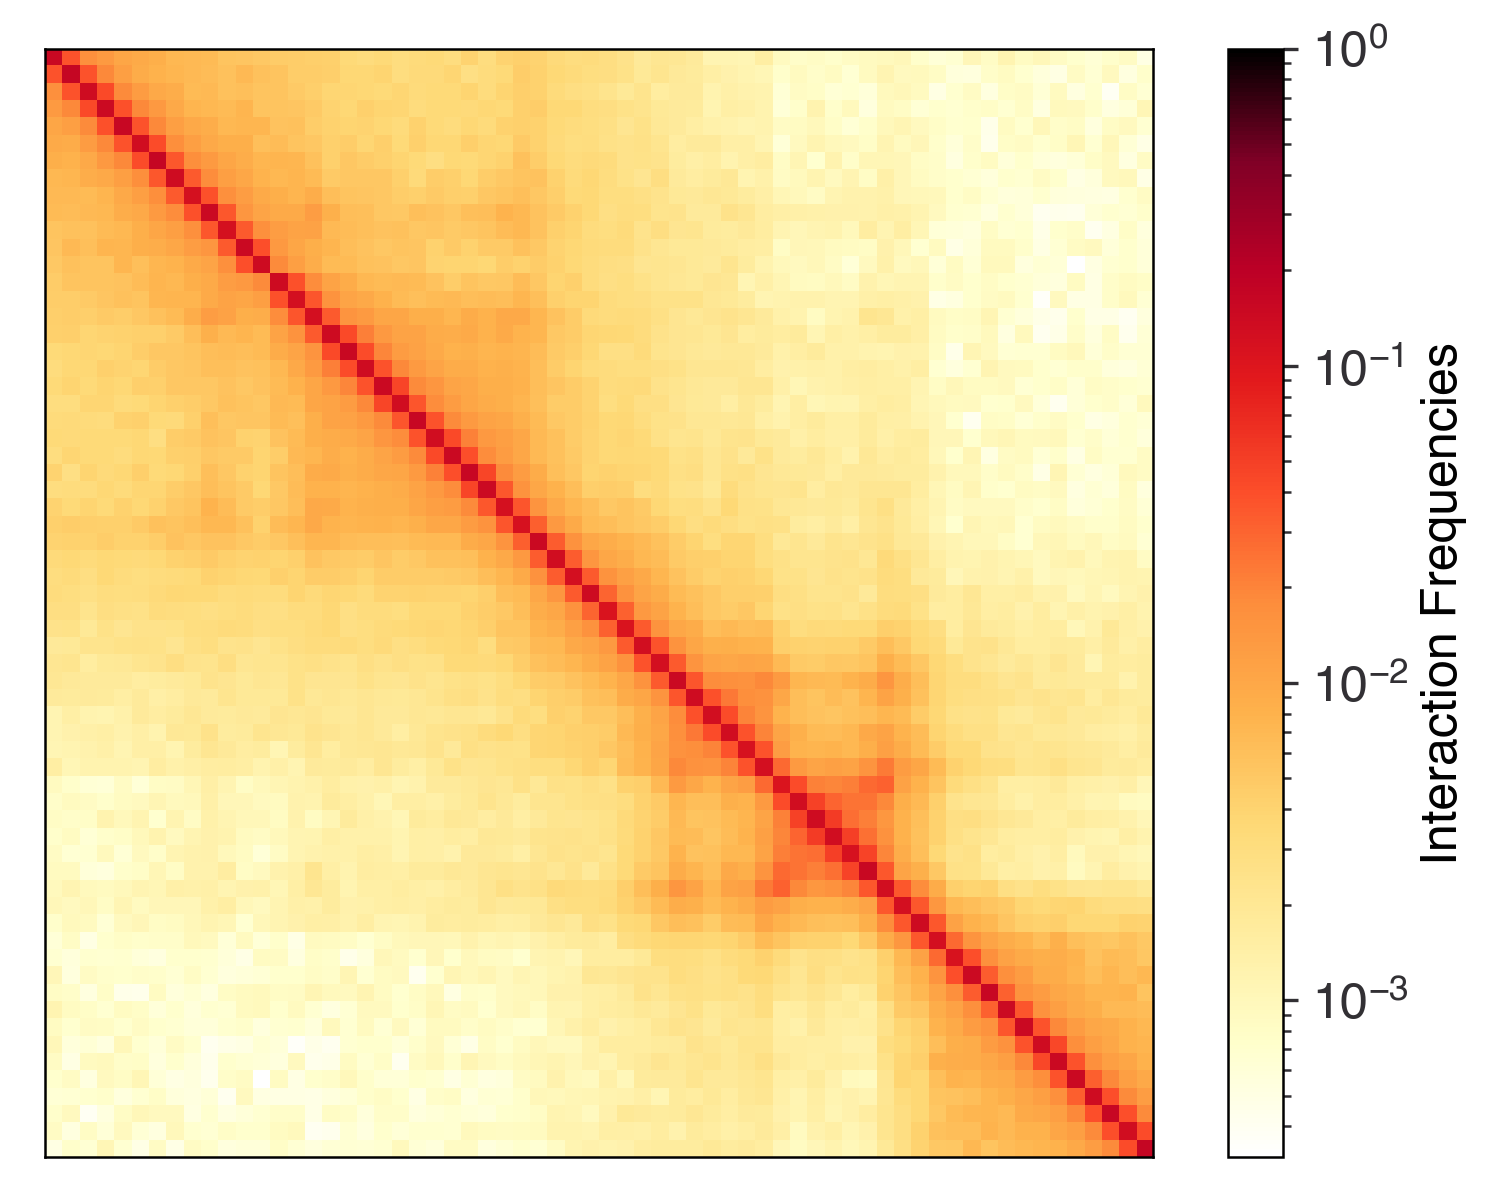

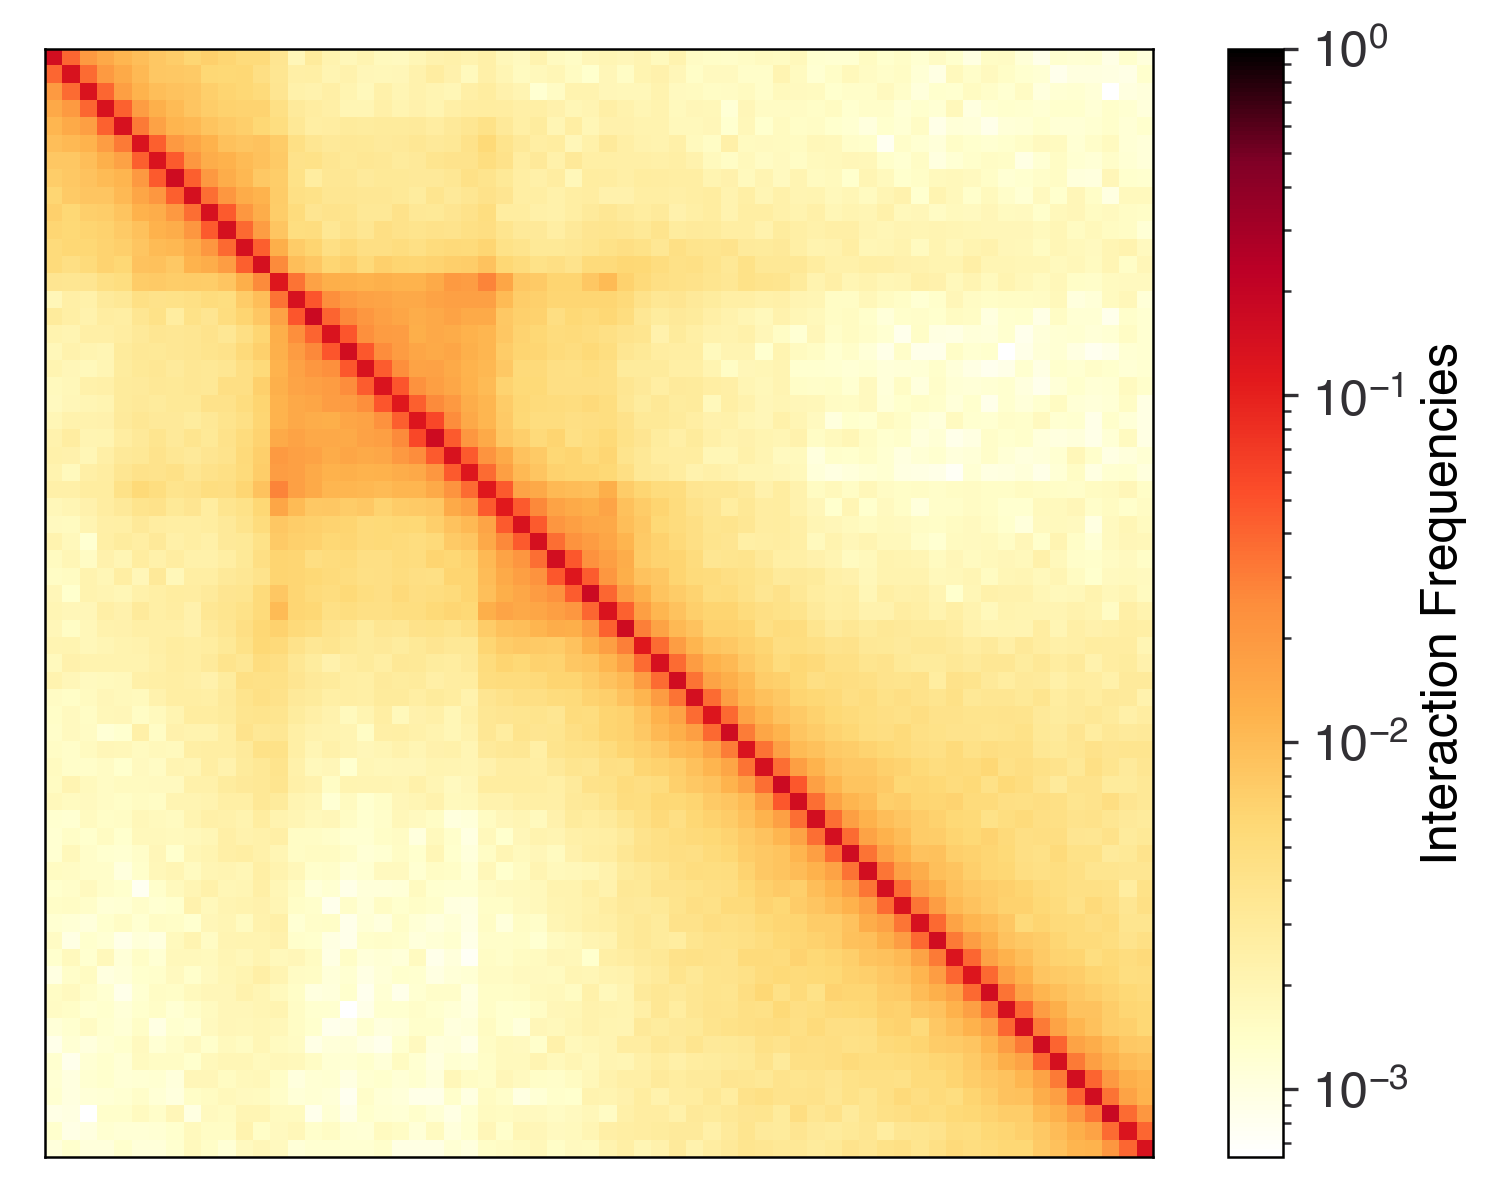

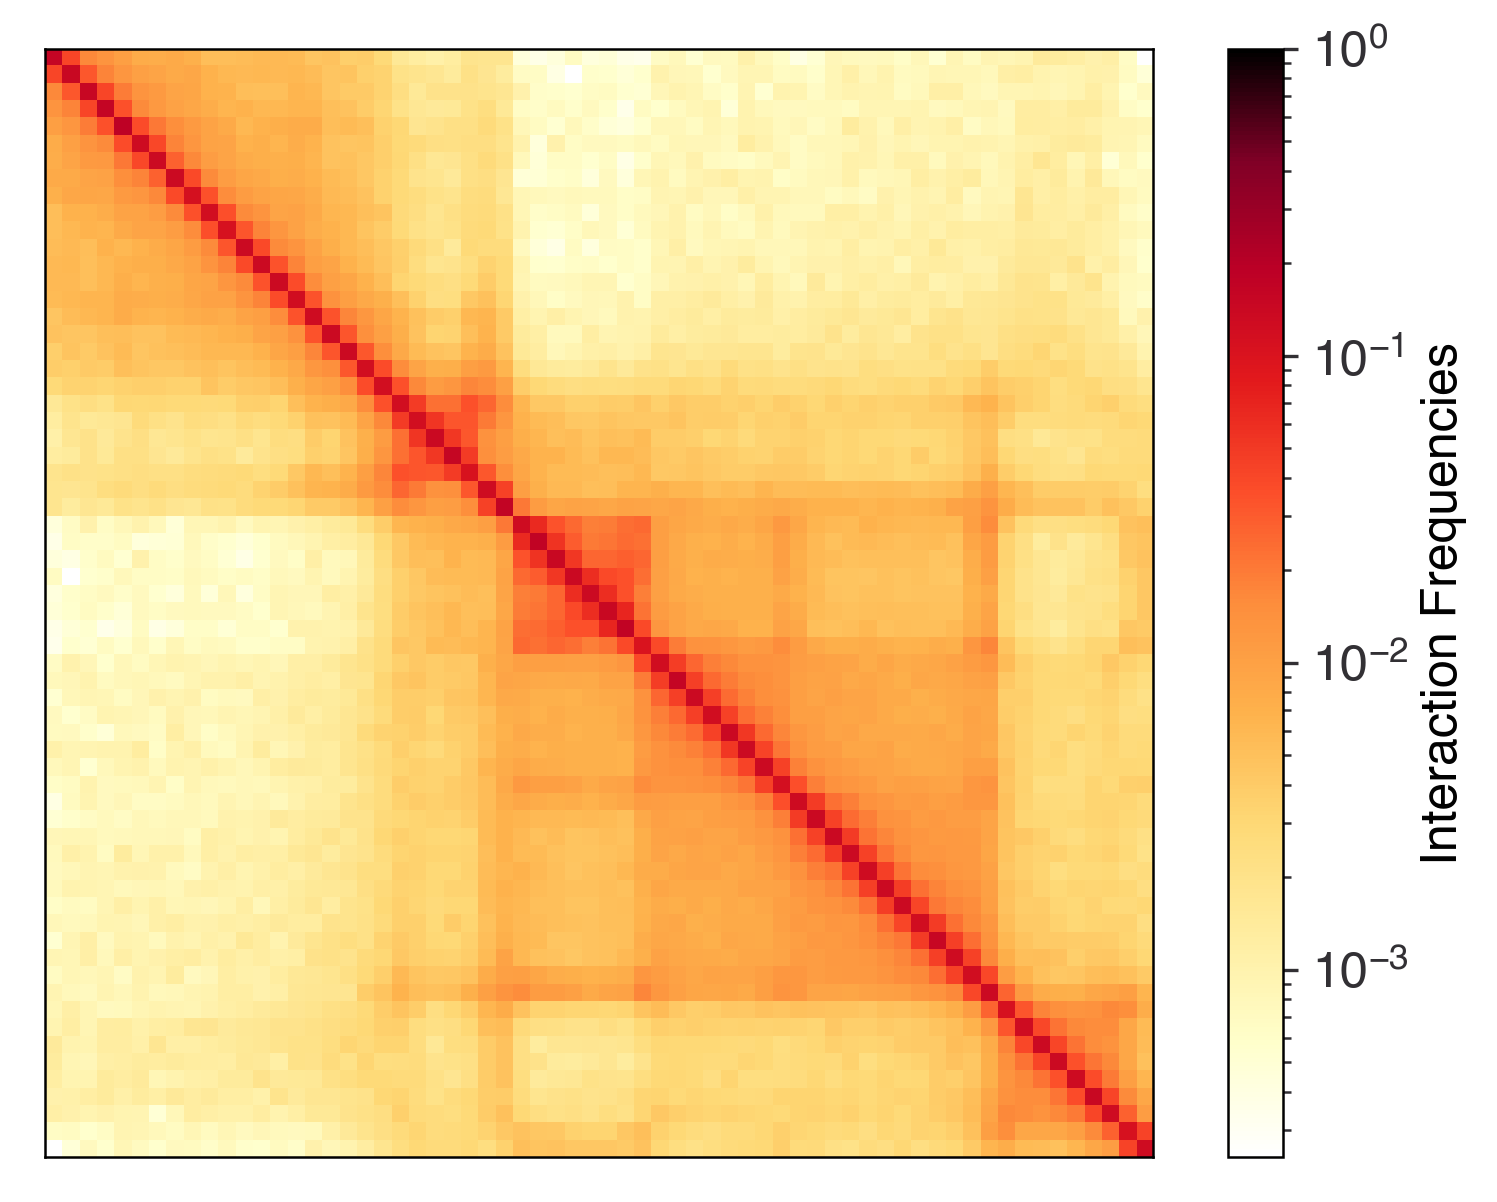

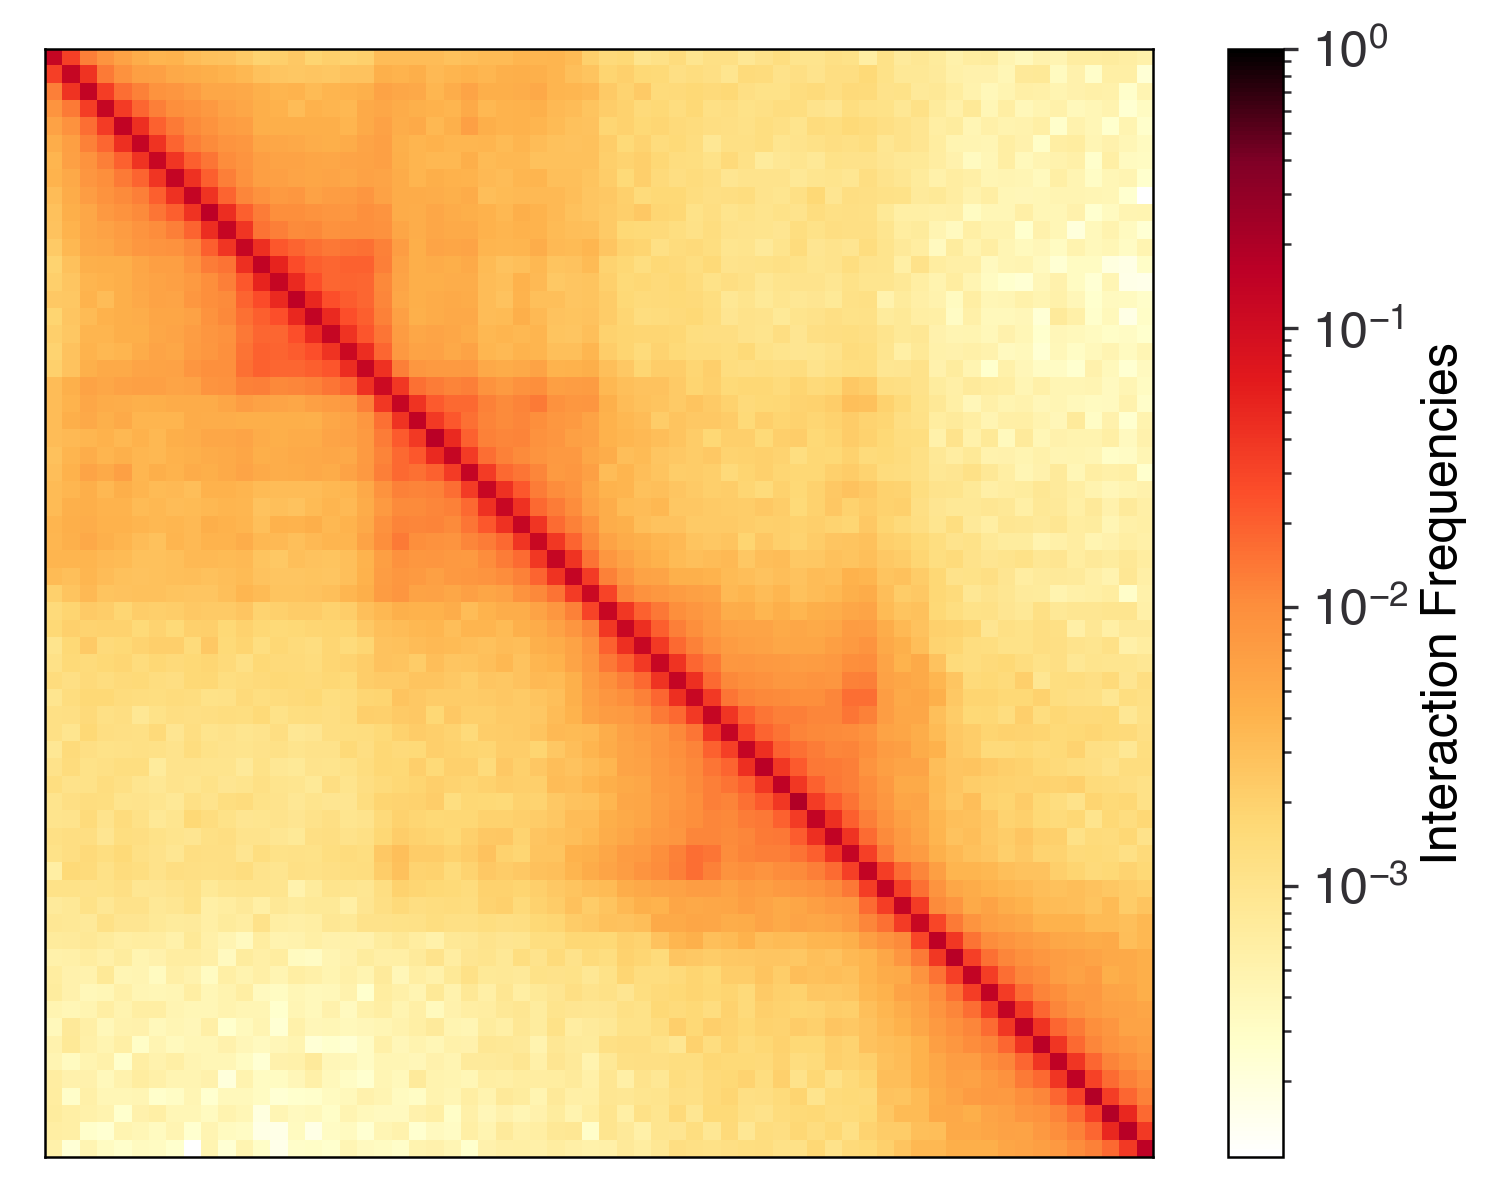

In [8]:
for chrom in regions:
    for region_idx in [regions[chrom][i] for i in [0,2,3,4,5,-4]]:
        fetch_region(chrom,region_idx).plot()
[0,2,3,4,5,-4]

In [9]:
[regions[chrom][i] for i in [0,2,3,4,5,-4]]

[100, 381, 445, 553, 610, 965]

(<Figure size 1920x1440 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.colorbar.Colorbar at 0x7f21a8274b50>)

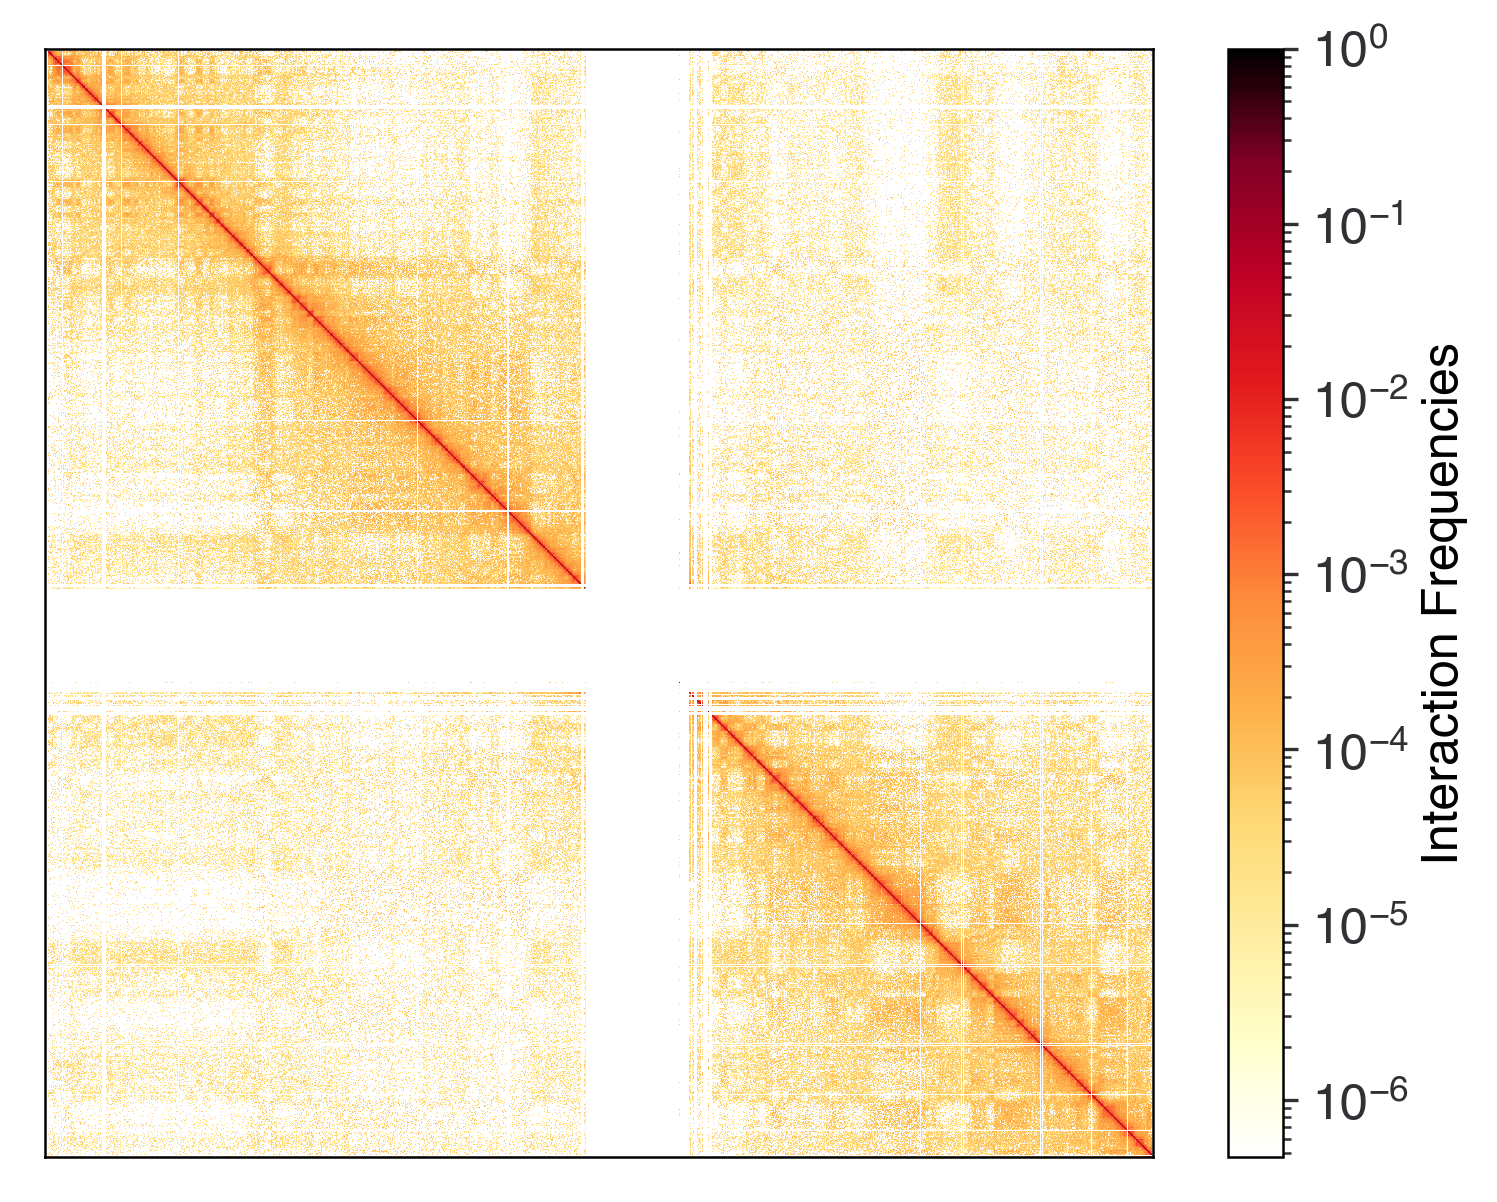

In [10]:
exp_hic.fetch('1').plot()

/home/gridsan/gschuette/.local/lib/python3.9/site-packages/cooltools/lib/numutils.py:1376: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur


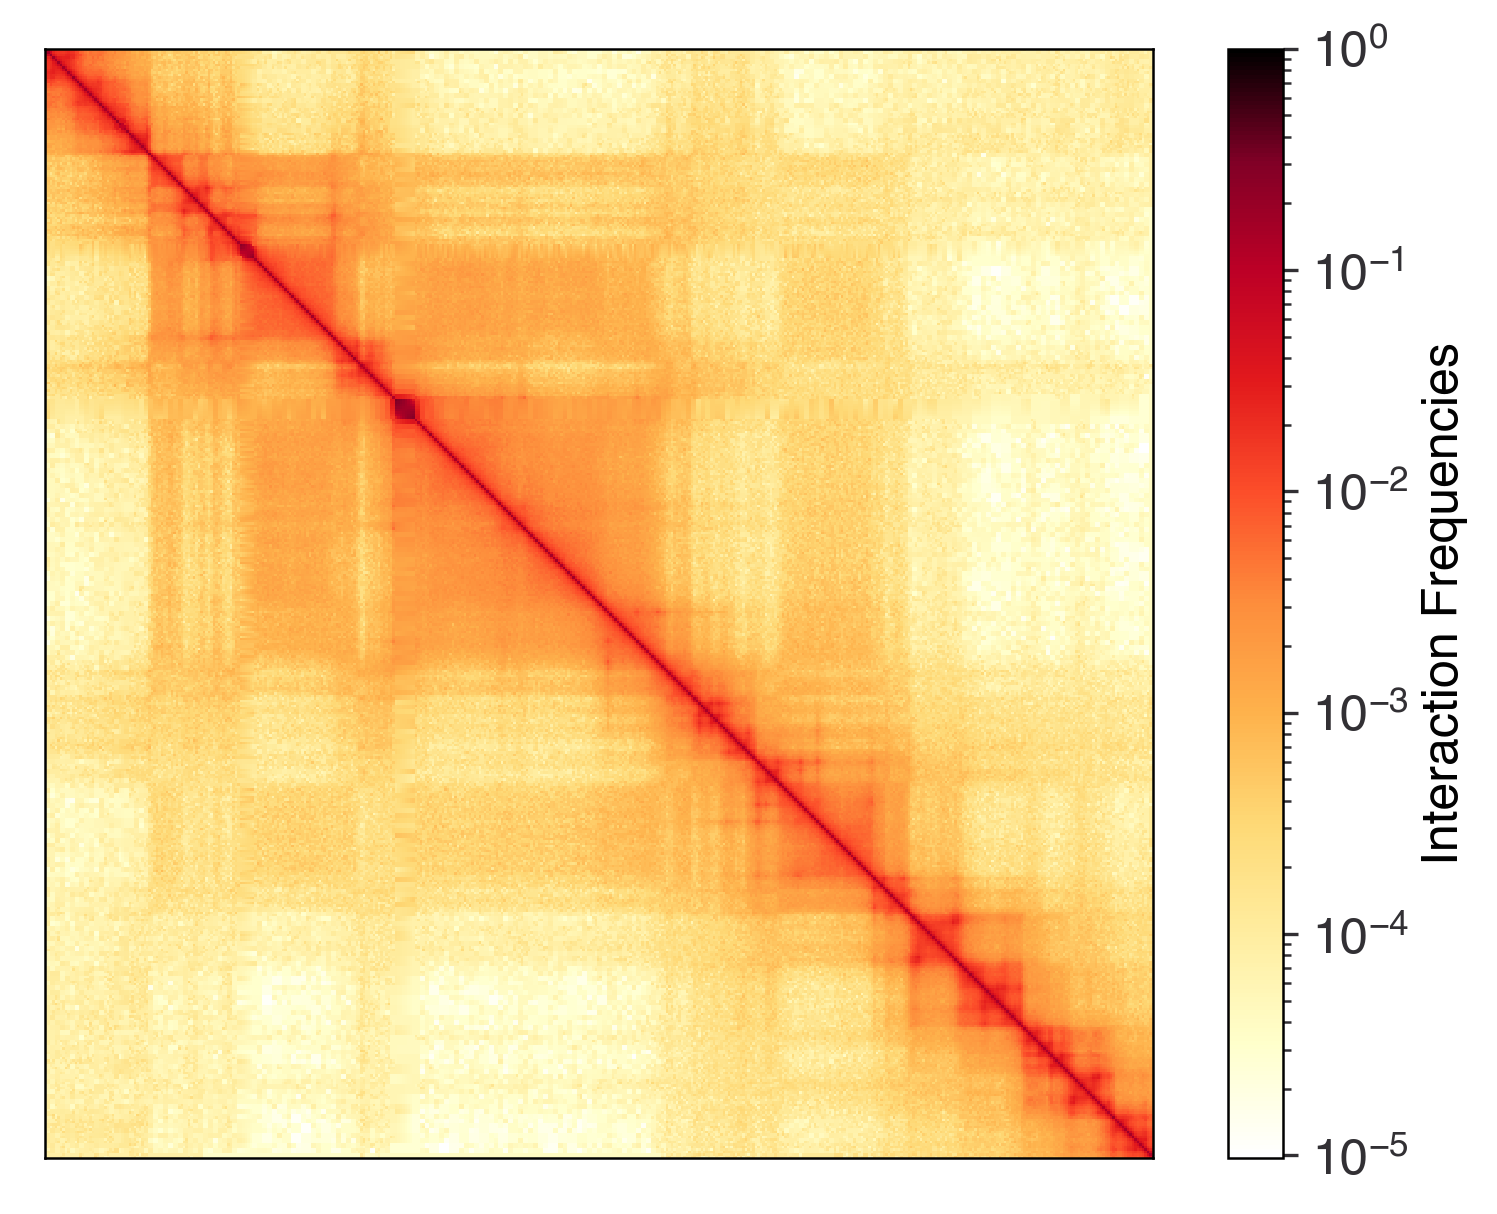

In [11]:
fig,ax,im,cbar=exp_hic.fetch('1',start=1_000_000,stop=10_000_000,adaptive_coarsegraining=True,interp_nans=True).plot()

#fig.savefig(save_folder+'GM_chrom_1_1000000_10000000_cg_interp.pdf')

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 22 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'I', 'a', 'c', 'e', 'i', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 41, 44, 68, 70, 72, 76, 81, 82, 84, 85, 86, 87, 88, 1894]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 22 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'I', 'a', 'c', 'e', 'i', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'q', 'r', 's', 'space', 't', 'three', 'two',

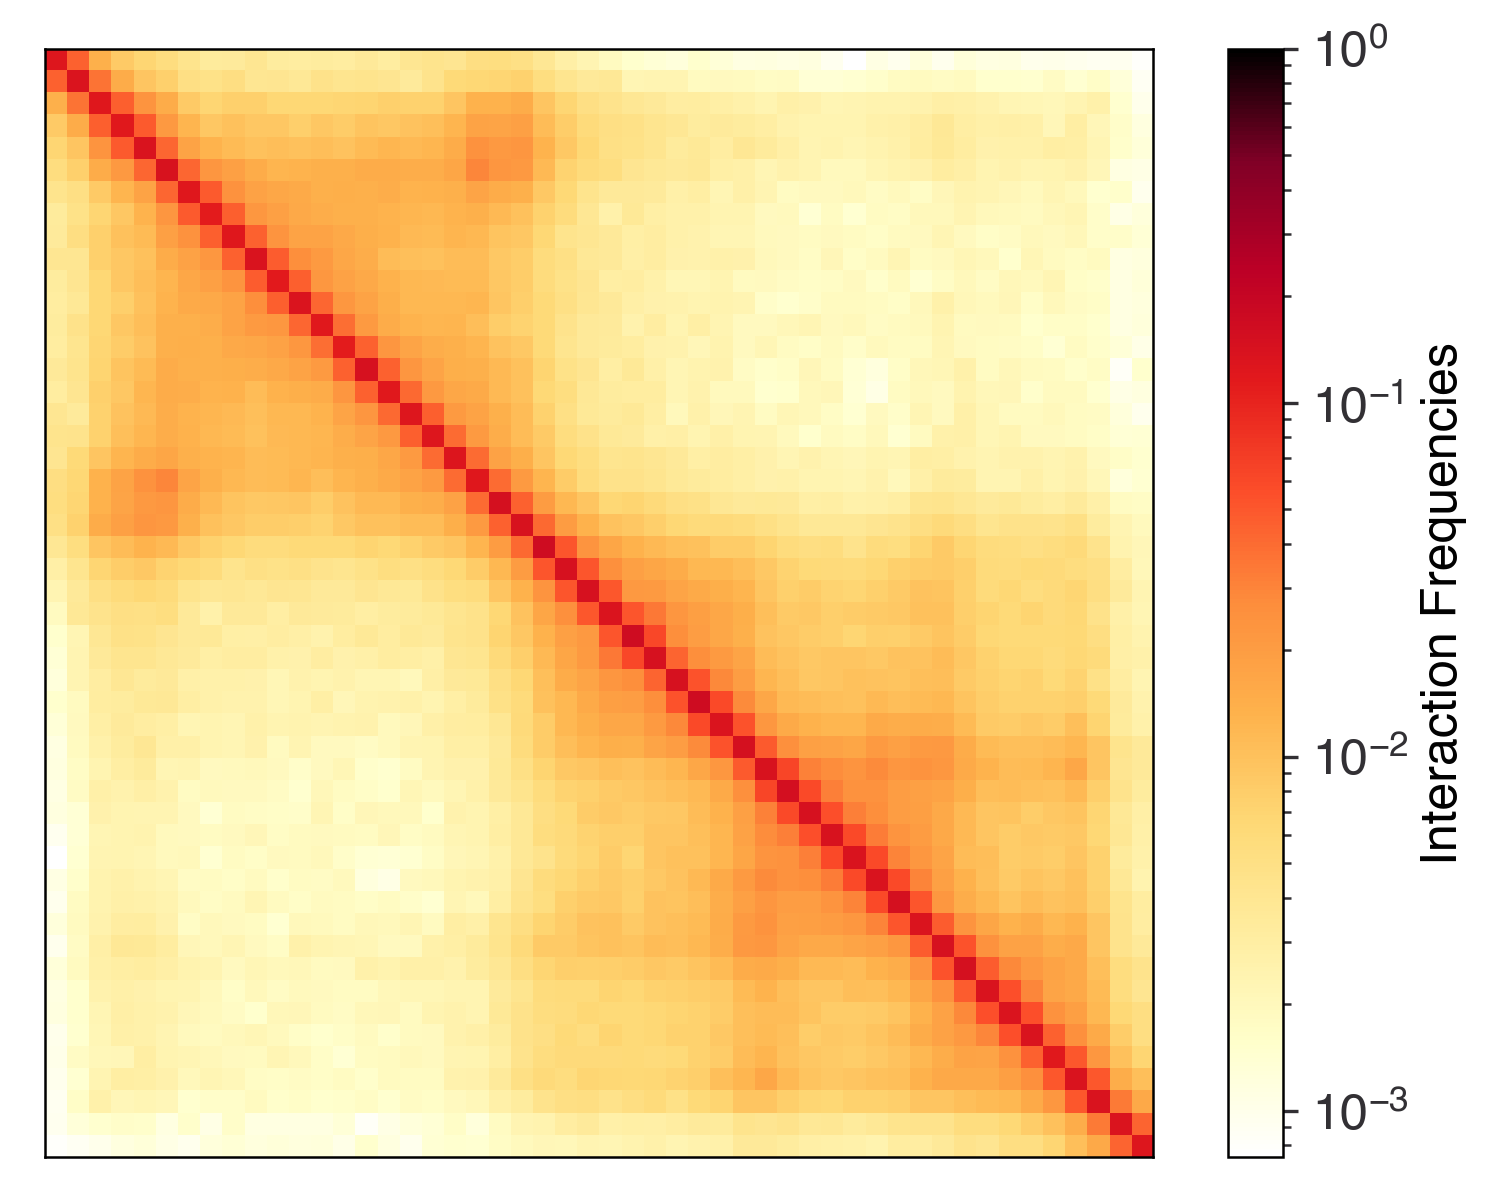

In [24]:
start = 7_980_000#5_000_000#8_000_000#5_000_000#30_000_000
stop = 8_980_000#10_000_000#9_000_000#10_000_000
fig,ax,im,cbar=exp_hic.fetch('1',start=start,stop=stop,adaptive_coarsegraining=True,interp_nans=False).plot()

#fig.savefig(save_folder+'GM_chrom_1_5000000_1000000_cg_interp.pdf')
fig.savefig(save_folder+f'GM_chrom_1_{start}_{stop}_cg_interp.pdf')

In [25]:
#full_map = pd.read_pickle('./HiC/full_map.pkl')

In [26]:
scHiC_data = pd.read_hdf('../../data/processed_scHiC.hdf5').sort_values(
    ['Cell','Chrom0','Chrom1','Genomic_Index0','Genomic_Index1']
)

In [27]:
import torch
def plot_scHiC(chrom,start,stop,cell=1,resolution=20_000,data=scHiC_data):

    nbins = (stop - start) // resolution 

    if 'Cell' in data:
        data = data[data.Cell==cell]
    data = data[data.Chrom0==chrom]
    data = data[data.Chrom1==chrom]
    data = data[data.Genomic_Index0>=start]
    data = data[data.Genomic_Index1< stop].copy()
    data['Genomic_Index0']-= start
    data['Genomic_Index0']//= resolution
    data['Genomic_Index1']-= start
    data['Genomic_Index1']//= resolution

    i,j = data.Genomic_Index0.values, data.Genomic_Index1.values

    n = (stop-start)//resolution

    mat = torch.zeros(n,n,dtype=int)
    mat[i,j]+= 1
    mat[j,i] = mat[i,j] 

    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.matshow(mat,cmap='Reds')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Genomic Index')
    ax.set_ylabel('Genomic Index')

    return data, mat, fig, ax
    
    
    

In [28]:
import numpy as np
def load_contacts(filepath):
    '''
    Assumes "two columns of 'chromosome,coordinate,haplotype' separated by a tab," 
    as described at https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3271347
    '''

    # Load the data
    con_df = pd.read_csv(
        filepath,
        header=None,
        sep='\t',
        names=['Loc0','Loc1']
    )

    # Remove rows with NaN/missing values.
    con_df.dropna(
        axis='index',
        inplace=True,
    #    ignore_index=True
    )

    # Split the data separated by commas within each column.
    for i in range(2):
        con_df[[f'Chrom{i}',f'Genomic_Index{i}',f'Haplotype{i}']] = con_df[f'Loc{i}'].str.split(',',expand=True)

    # Remove the unprocessed columns. 
    con_df.drop(columns=['Loc0','Loc1'],inplace=True)

    # Standardize the datatypes in each column.
    con_df = con_df.astype({'Chrom0':str,'Genomic_Index0':np.int64,'Haplotype0':str,'Chrom1':str,'Genomic_Index1':np.int64,'Haplotype1':str})

    # Remove duplicated lines, if present. 
    con_df.drop_duplicates(inplace=True,keep='first',ignore_index=True)

    return con_df

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'I', 'c', 'd', 'e', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'space', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 42, 44, 70, 71, 72, 76, 80, 81, 82, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'I', 'c', 'd', 'e', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'space', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 42, 44, 70, 71, 72, 76, 80, 81, 82, 91]
INFO:fontTools.subset:Closing glyph list o

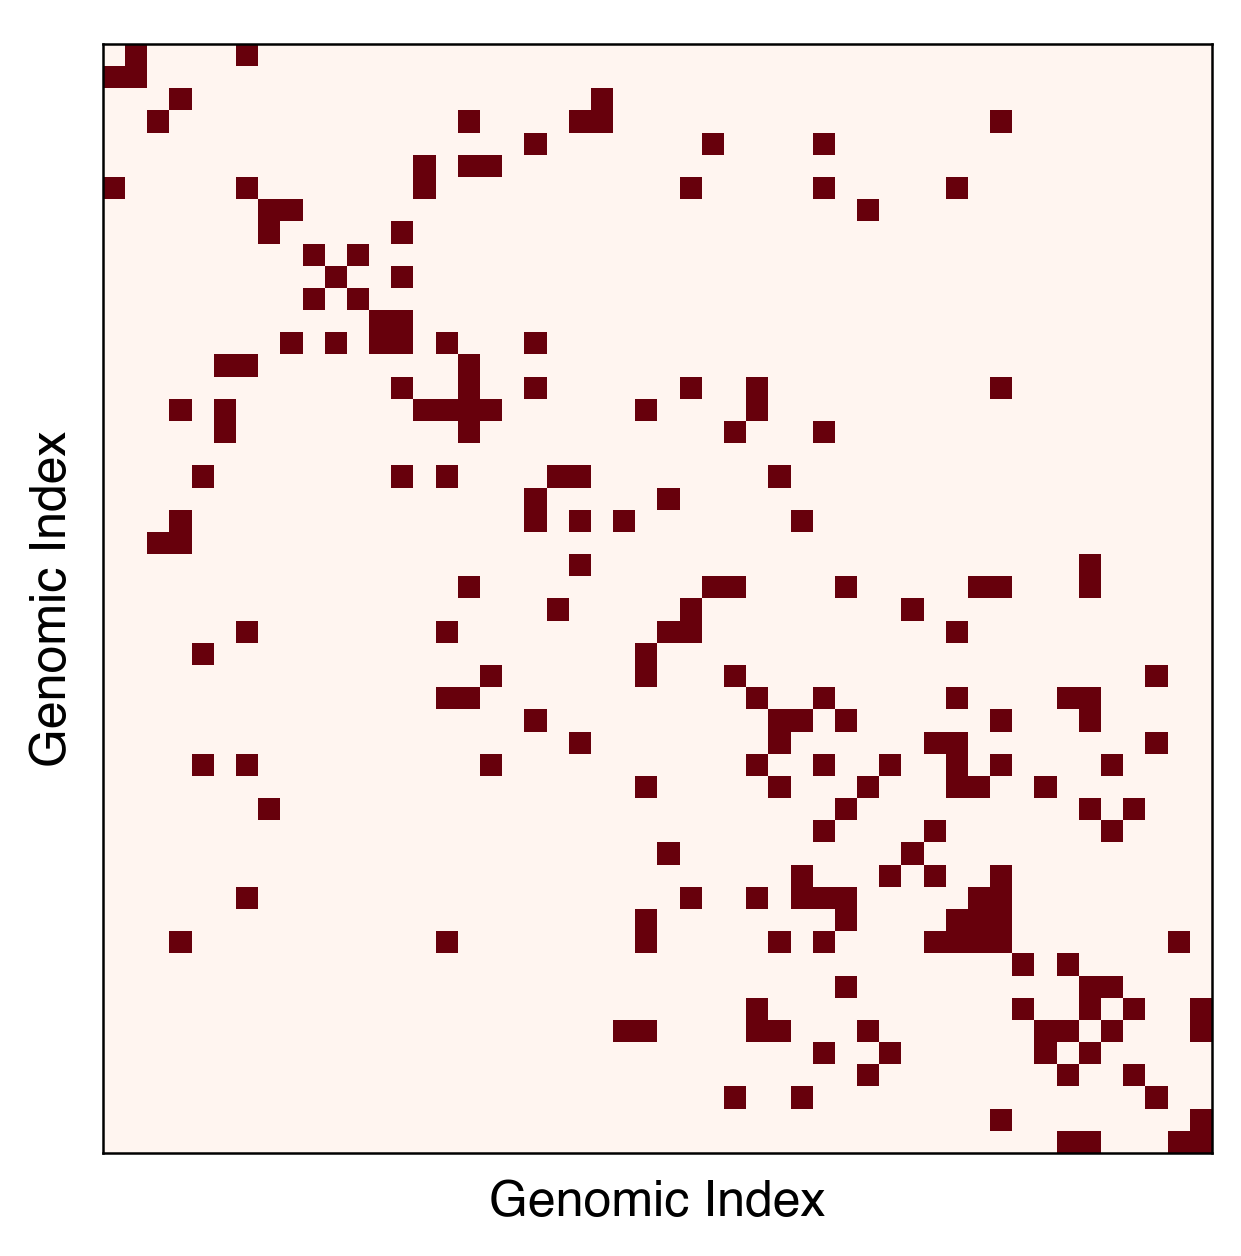

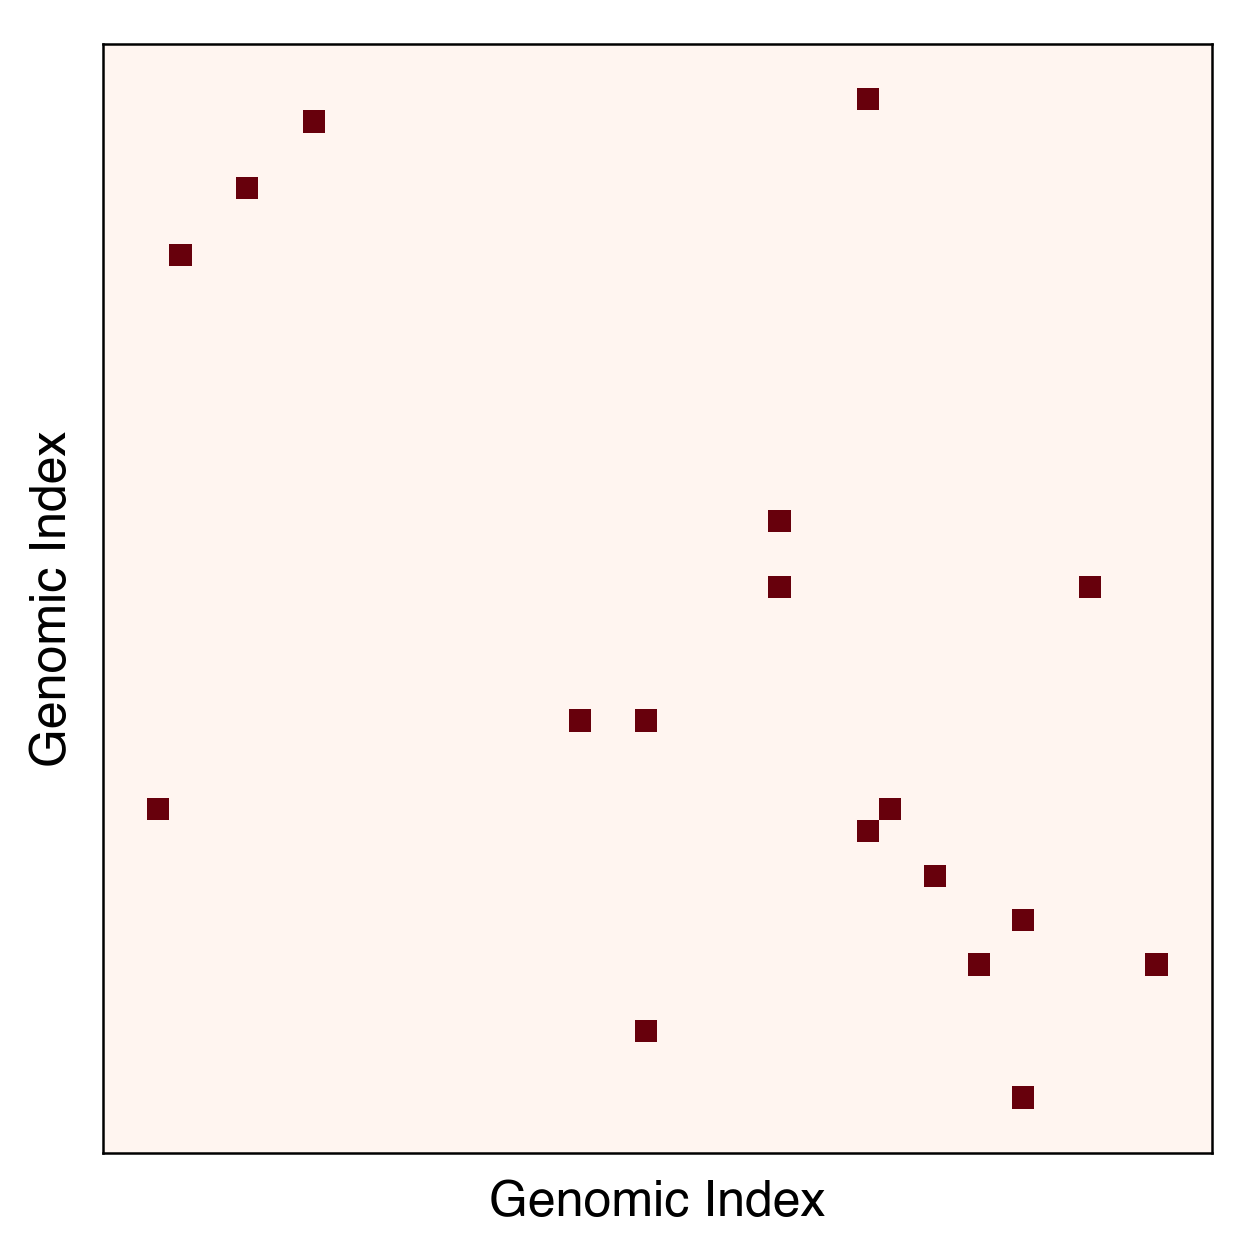

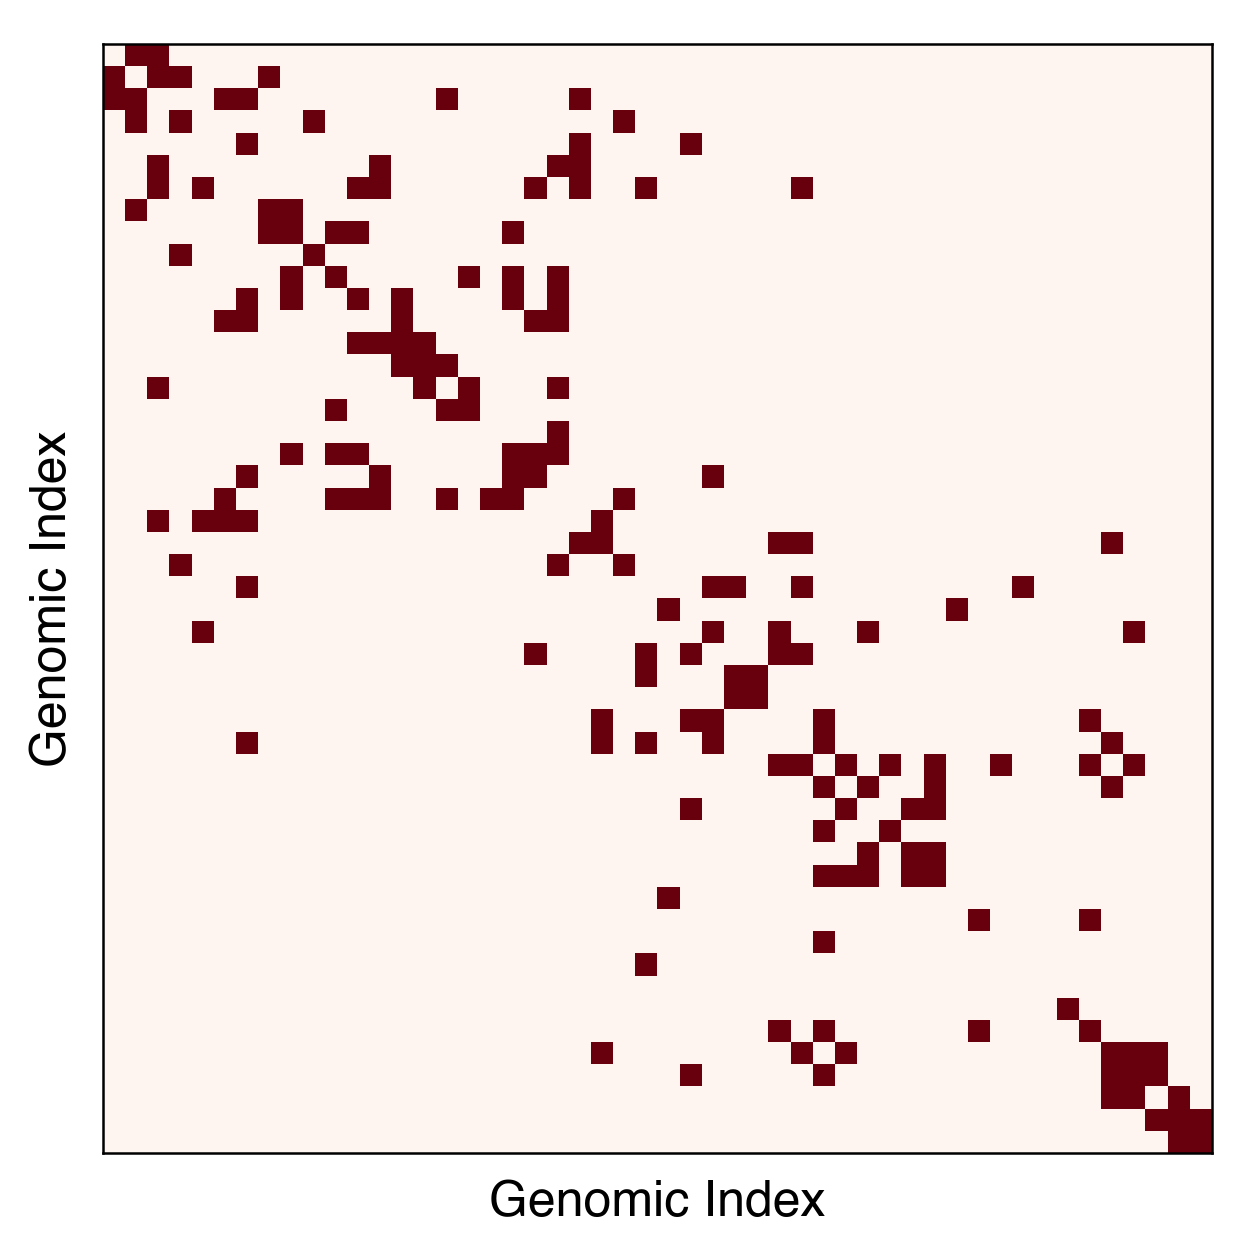

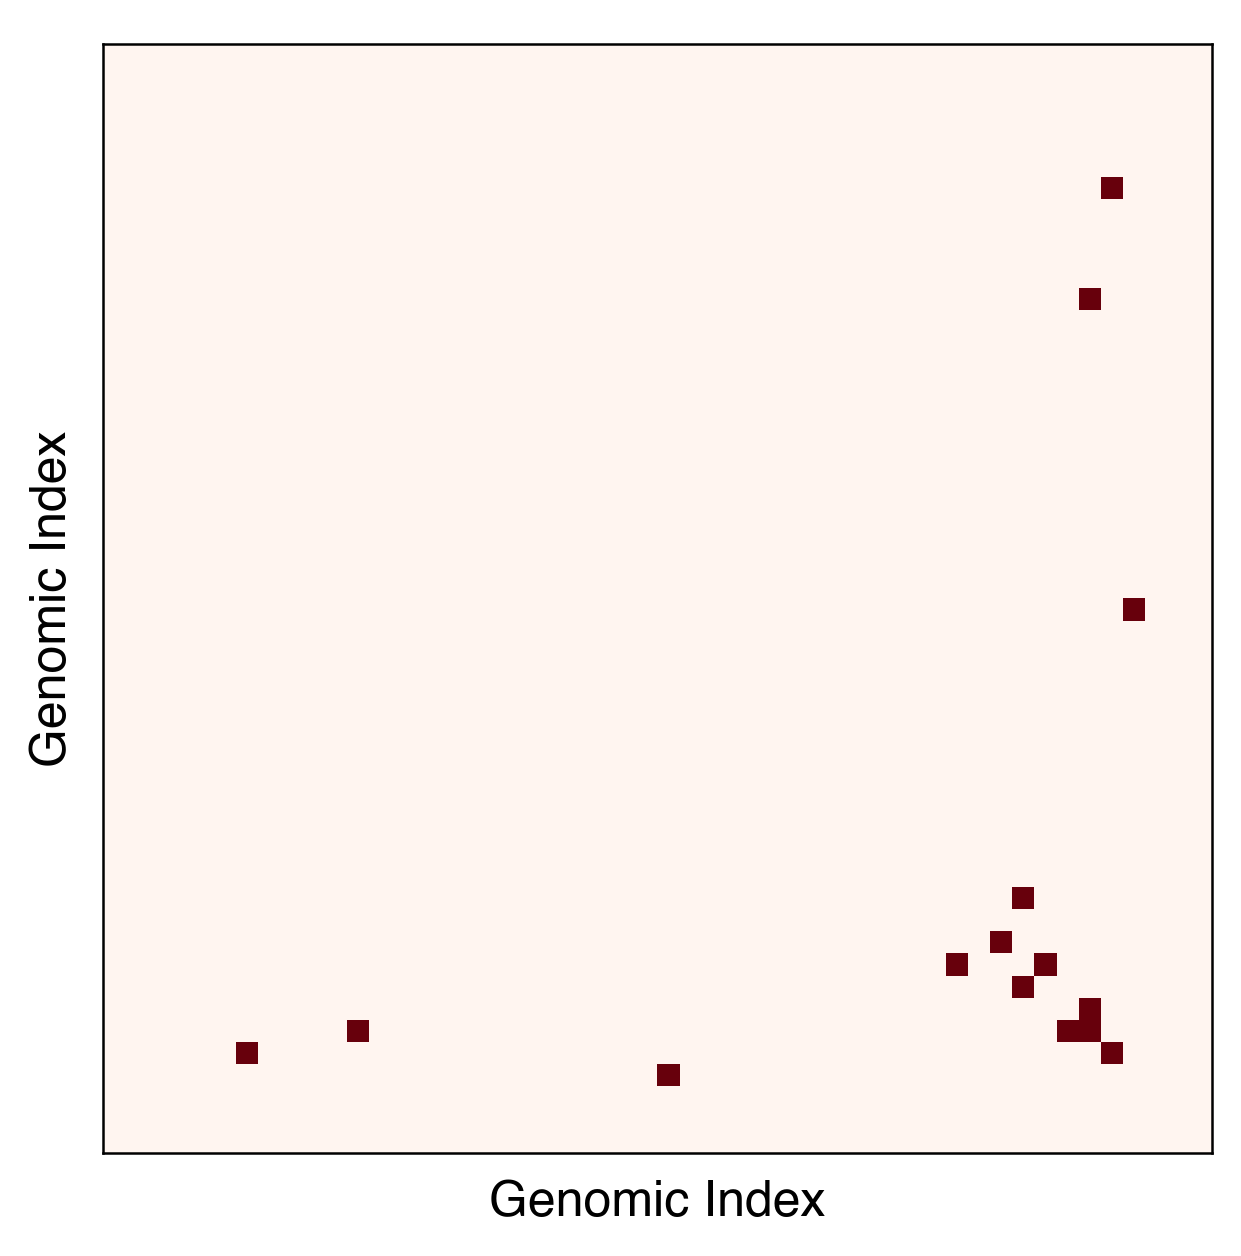

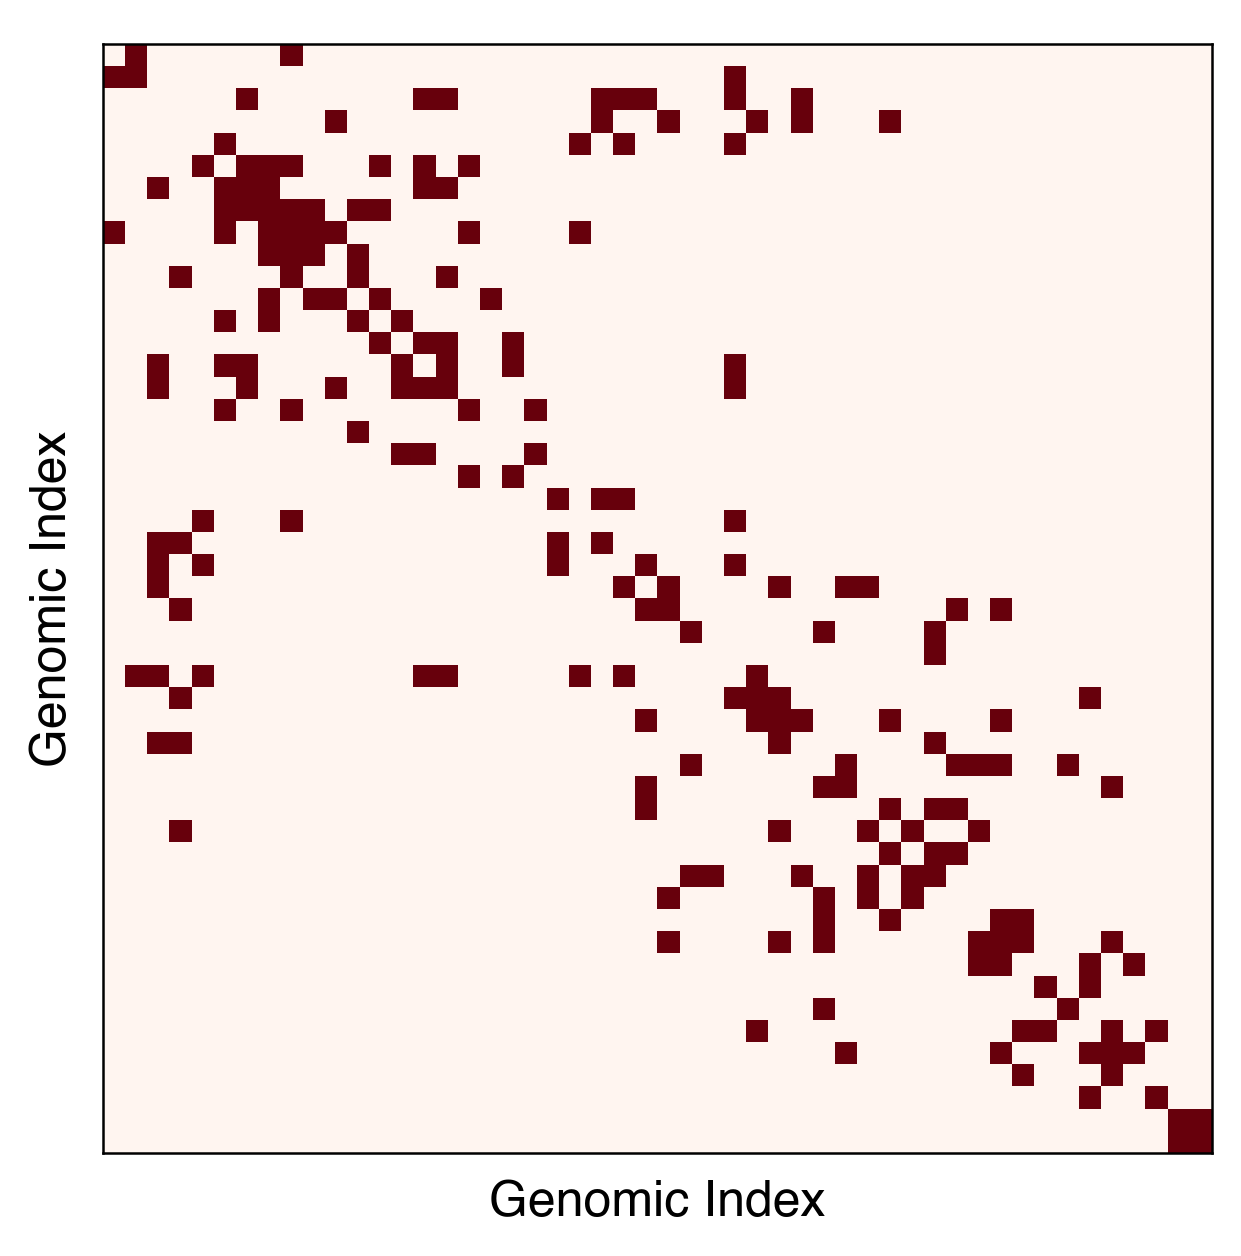

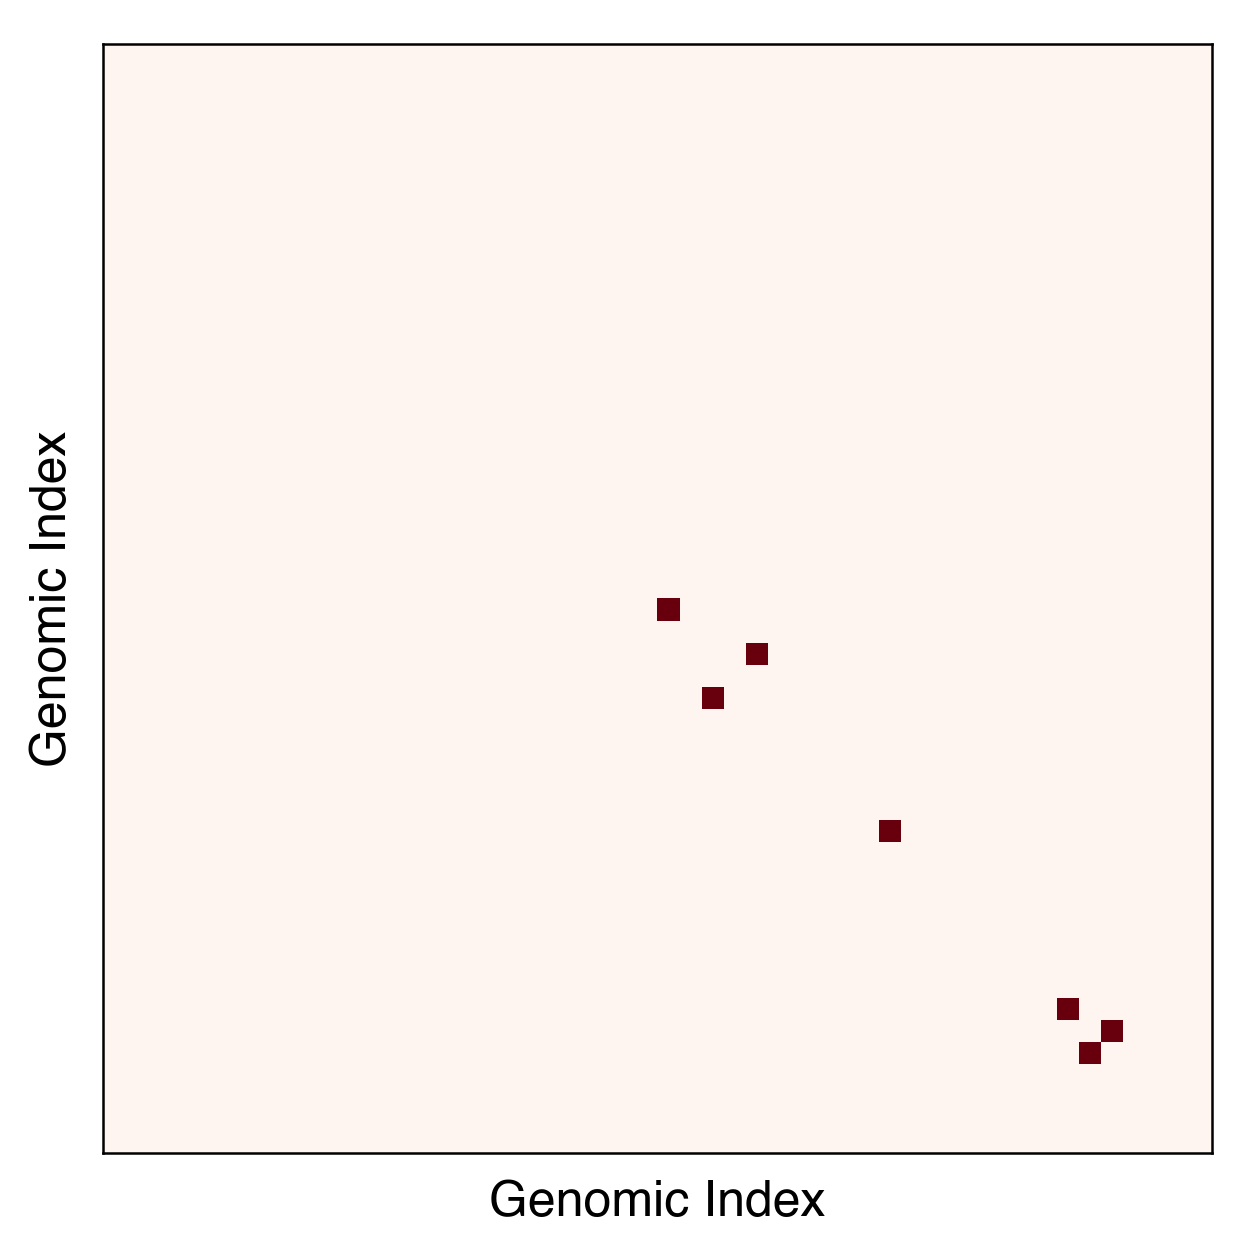

In [29]:

#start = 8_000_000#5_000_000
#stop = 9_000_000#10_000_000

file_locations = {
    1:'../../data/tan_single-cell_2018/Supp_GSM3271347_GM12878_Cell_1/GSM3271347_gm12878_01.impute.con.txt.gz',
    2:'../../data/tan_single-cell_2018/Supp_GSM3271348_GM12878_Cell_2/GSM3271348_gm12878_02.impute.con.txt.gz',
    3:'../../data/tan_single-cell_2018/Supp_GSM3271349_GM12878_Cell_3/GSM3271349_gm12878_03.impute.con.txt.gz'
}

for cell in [1,2,3]:
    

    data,mat,fig,ax = plot_scHiC('1',start,stop,cell=cell)
    fig.savefig(save_folder+f'/scHiC_chrom_{chrom}_cell_{cell}_{start}_{stop}_raw.pdf')
    
    contacts = load_contacts(file_locations[cell])
    data, mat, fig, ax = plot_scHiC(chrom,start,stop,resolution=20_000,data=contacts);
    fig.savefig(save_folder+f'/scHiC_chrom_{chrom}_cell_{cell}_{start}_{stop}_2D_impute.pdf')

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'I', 'c', 'd', 'e', 'four', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'space', 'three', 'two', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 42, 44, 70, 71, 72, 76, 80, 81, 82, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'I', 'c', 'd', 'e', 'four', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'space', 'three', 'two', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:

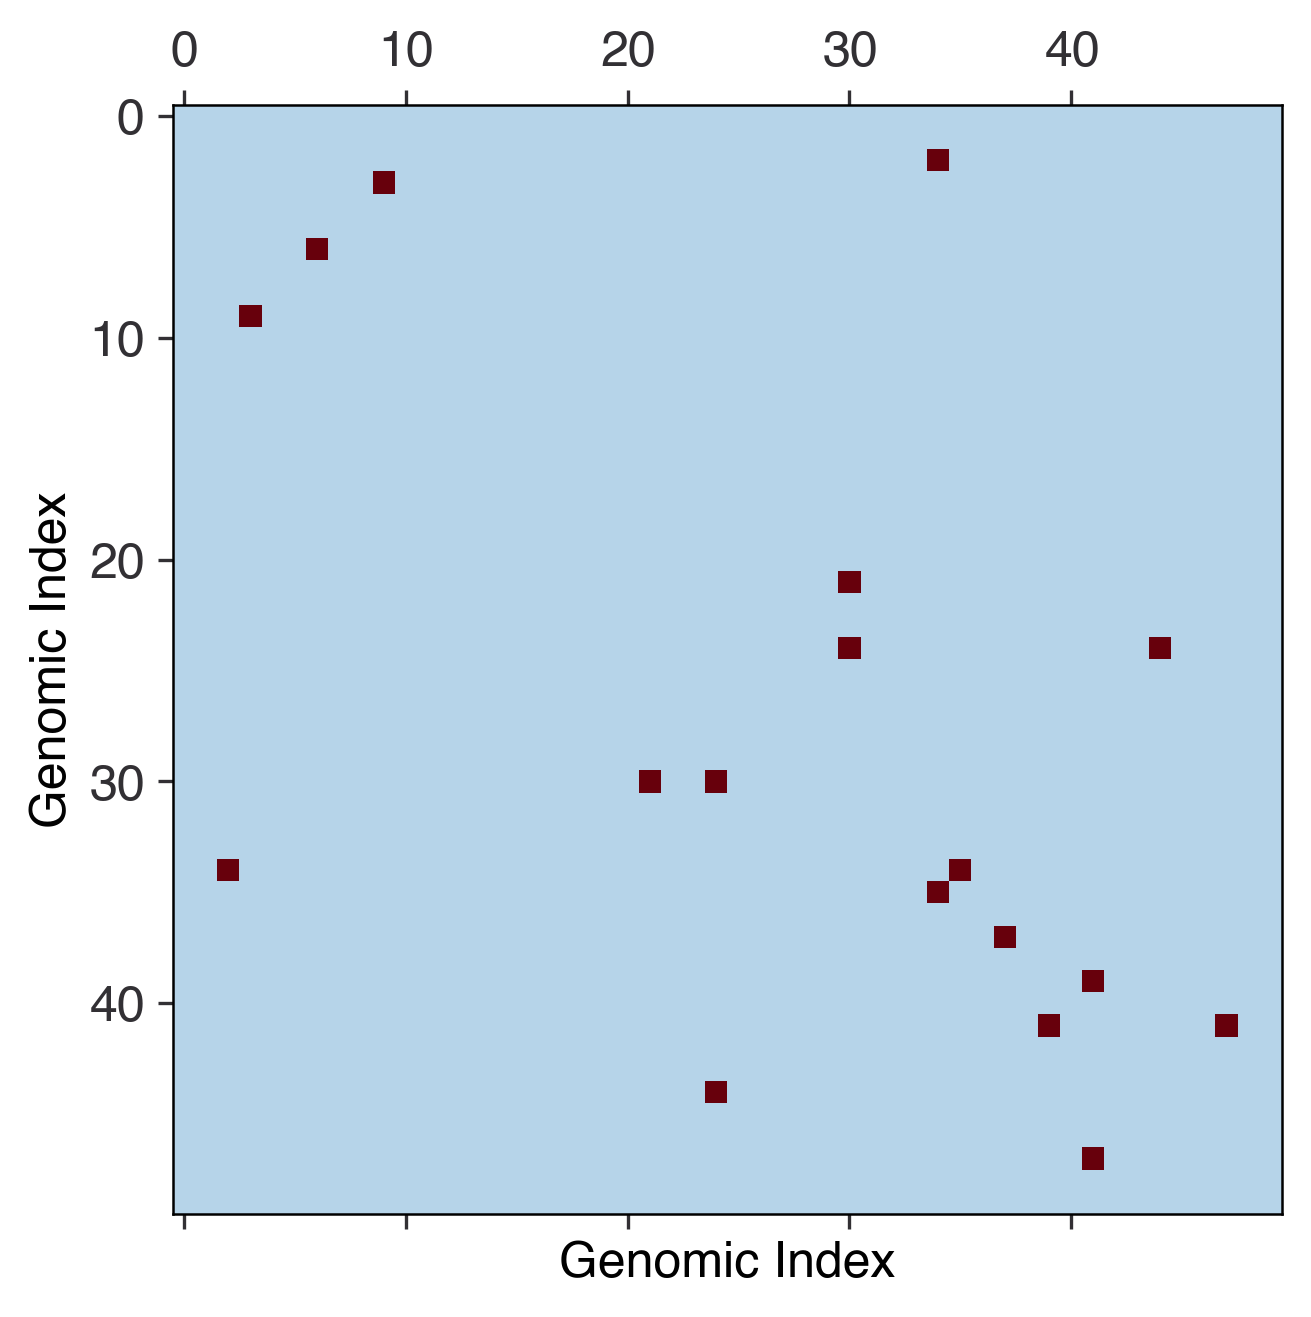

In [55]:
# With blue background


#start = 8_000_000#5_000_000
#stop = 9_000_000#10_000_000

file_locations = {
    1:'../../data/tan_single-cell_2018/Supp_GSM3271347_GM12878_Cell_1/GSM3271347_gm12878_01.impute.con.txt.gz',
    2:'../../data/tan_single-cell_2018/Supp_GSM3271348_GM12878_Cell_2/GSM3271348_gm12878_02.impute.con.txt.gz',
    3:'../../data/tan_single-cell_2018/Supp_GSM3271349_GM12878_Cell_3/GSM3271349_gm12878_03.impute.con.txt.gz'
}

for cell in [1]:#,2,3]:
    

    #data,mat,fig,ax = plot_scHiC('1',start,stop,cell=cell)
    #fig.savefig(save_folder+f'/scHiC_chrom_{chrom}_cell_{cell}_{start}_{stop}_raw.pdf')
    
    contacts = load_contacts(file_locations[cell])
    data, mat, fig, ax = plot_scHiC(chrom,start,stop,resolution=20_000,data=contacts);
    mat1 = mat.to(torch.float).numpy()
    mat1[mat == 0] = .3
    mat1[mat == 1] = np.nan
    ax.matshow(mat1,cmap='Blues',vmin=0,vmax=1)
    
    fig.savefig(save_folder+f'/scHiC_chrom_{chrom}_cell_{cell}_{start}_{stop}_2D_impute_blue.pdf')

In [52]:
mat1 = mat.to(torch.float).numpy()
mat1[mat == 0] = .5
mat1[mat == 1] = np.nan
np.unique(mat1)

array([0.5, nan], dtype=float32)

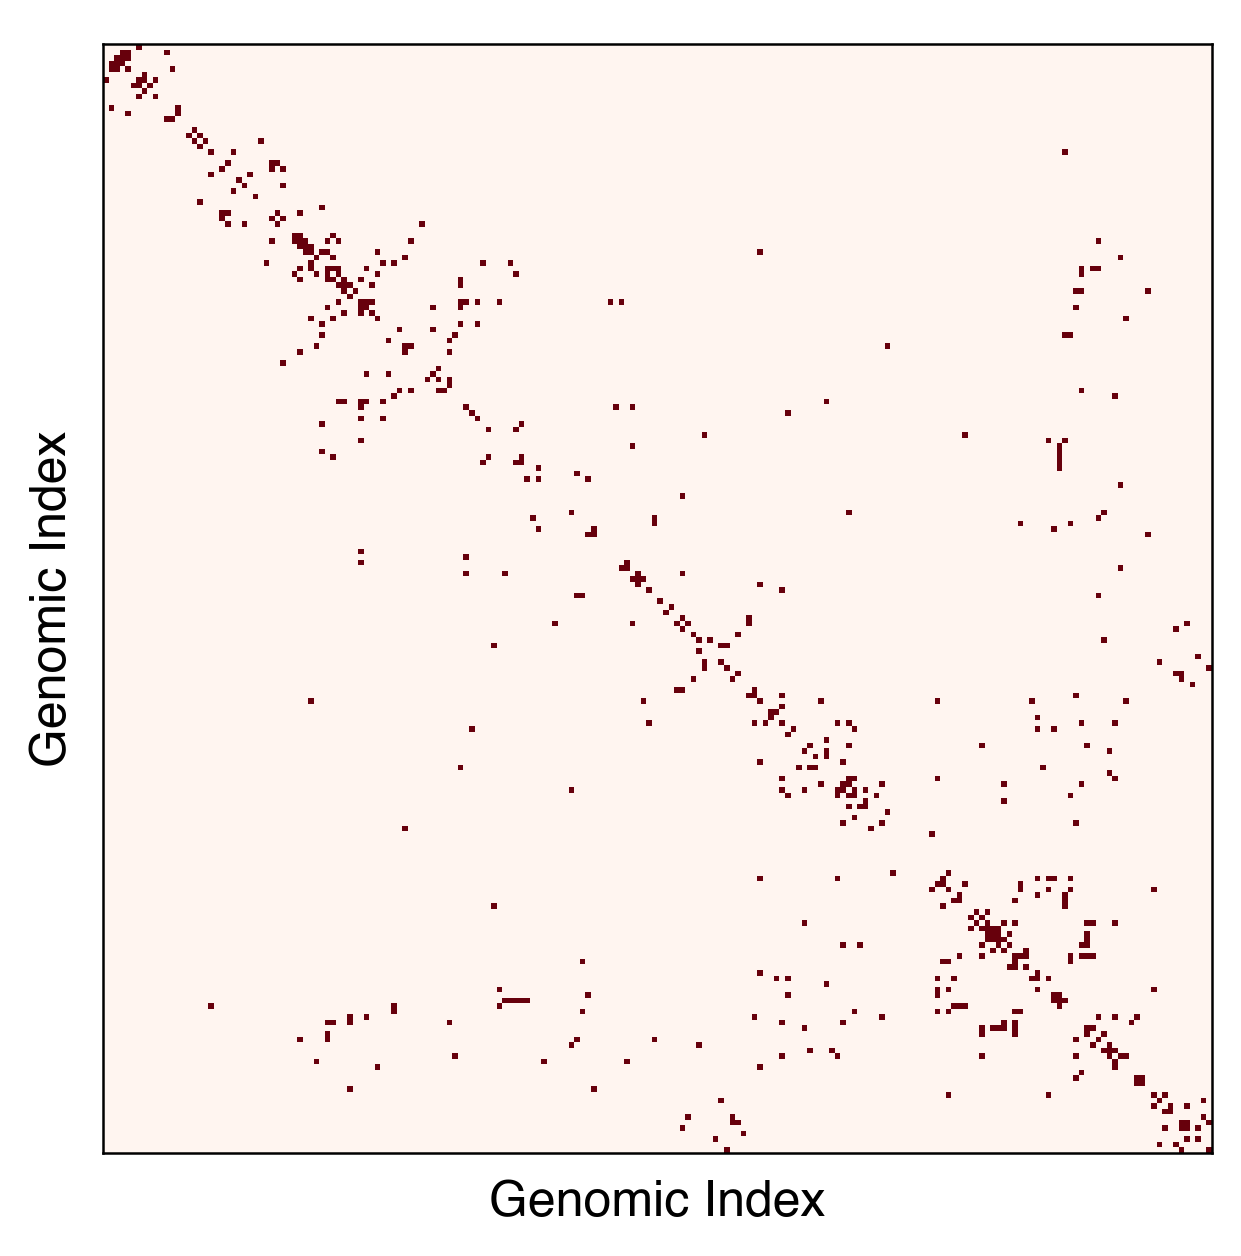

In [18]:
data,mat,fig,ax = plot_scHiC('1',1_000_000,5_000_000)

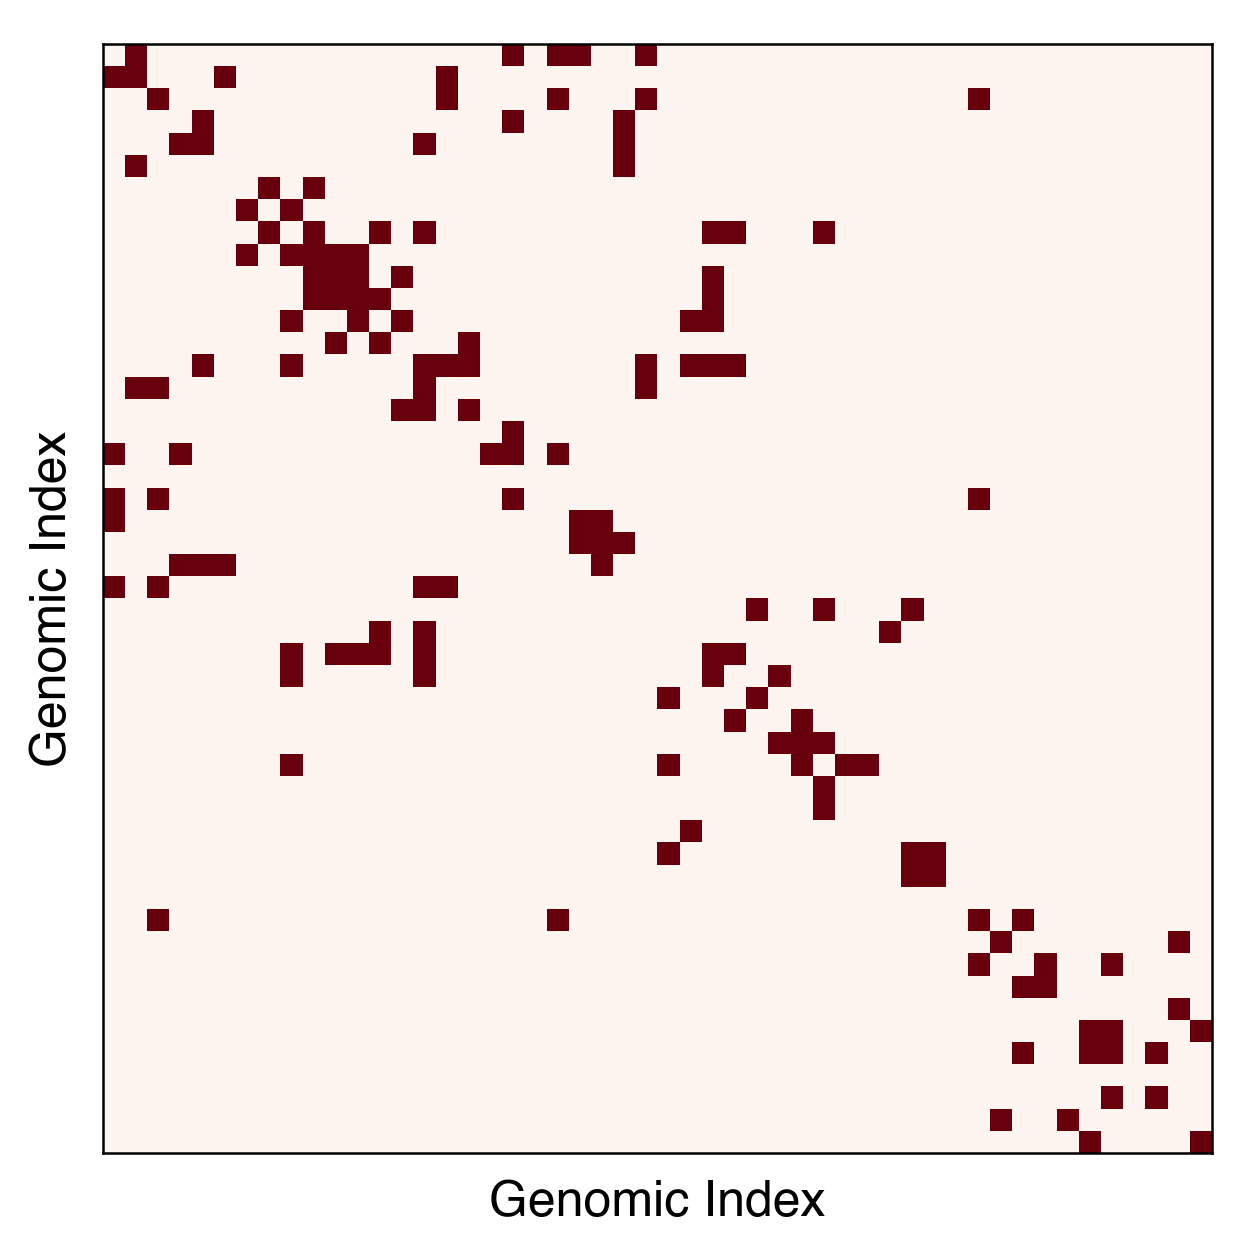

In [19]:
data,mat,fig,ax = plot_scHiC('1',4_000_000,5_000_000)

#### Boolean approach from way back when 

In [30]:
import numpy as np
import torch
import os
gen_map = np.load('/home/gridsan/gschuette/refining_scHiC/data/generated_here/'+\
            'polymers/PRL_paper/boolean/second_attempt/results_symmetric/configs_milestone_450.npz')

gen_map = HiCMap(np.unpackbits(gen_map['packedbits']).reshape(gen_map['obj_shape']).mean(0)[0,:,:] )


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'D', 'F', 'G', 'I', 'P', 'T', 'a', 'b', 'c', 'colon', 'd', 'e', 'g', 'i', 'l', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 29, 38, 39, 41, 42, 44, 51, 55, 68, 69, 70, 71, 72, 74, 76, 79, 81, 82, 84, 85, 86, 87, 88, 89, 92, 1894]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 34 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'D', 'F', 'G', 'I', 'P', 'T', 'a', 'b

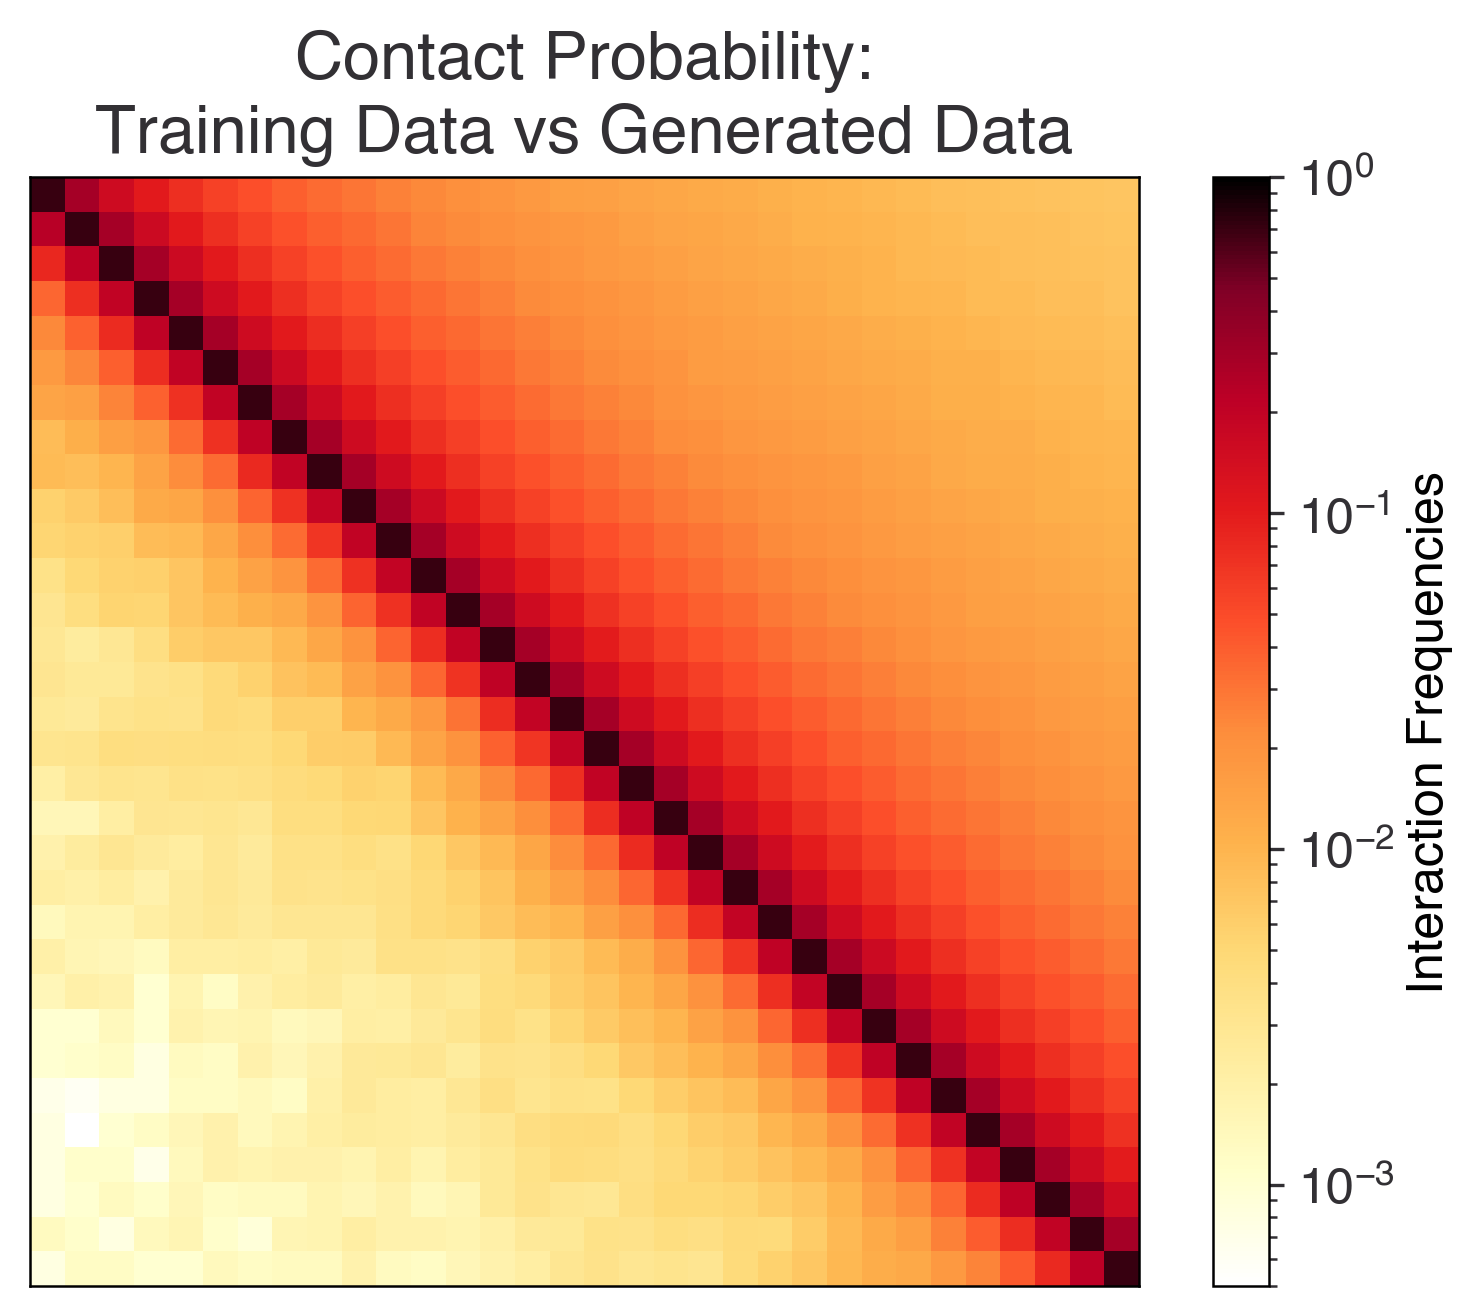

In [55]:
dataset_map = torch.load('/home/gridsan/gschuette/refining_scHiC/data/generated_here/polymers/PRL_paper/configurations/homo_configs.pt')
#dataset_map = (dataset_map < 1.76).to(torch.float)
dataset_map = HiCMap(dataset_map[:,0,:32,:32].mean(0))

fig, ax, *_ = dataset_map.plot_with(gen_map)
ax.set_title('Contact Probability:\nTraining Data vs Generated Data')
#dataset_map = 

fig.savefig(save_folder+'/boolean_model_underpredict.pdf')

In [60]:
sample_configs = np.load('/home/gridsan/gschuette/refining_scHiC/data/generated_here/'+\
            'polymers/PRL_paper/boolean/second_attempt/results_symmetric/configs_milestone_450.npz')

sample_configs = np.unpackbits(sample_configs['packedbits']).reshape(sample_configs['obj_shape'])
sample_configs = torch.from_numpy(sample_configs).to(torch.float)
#sample_configs = HiCMap(np.unpackbits(sample_configs['packedbits']).reshape(sample_configs['obj_shape']).mean(0)[0,:,:] )

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'I', 'M', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 'space', 't', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 42, 44, 48, 68, 70, 71, 72, 76, 80, 81, 82, 83, 85, 87, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'I', 'M', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 'space', 't', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 42, 44, 48, 68, 70, 71, 72, 76, 80, 81, 82, 83

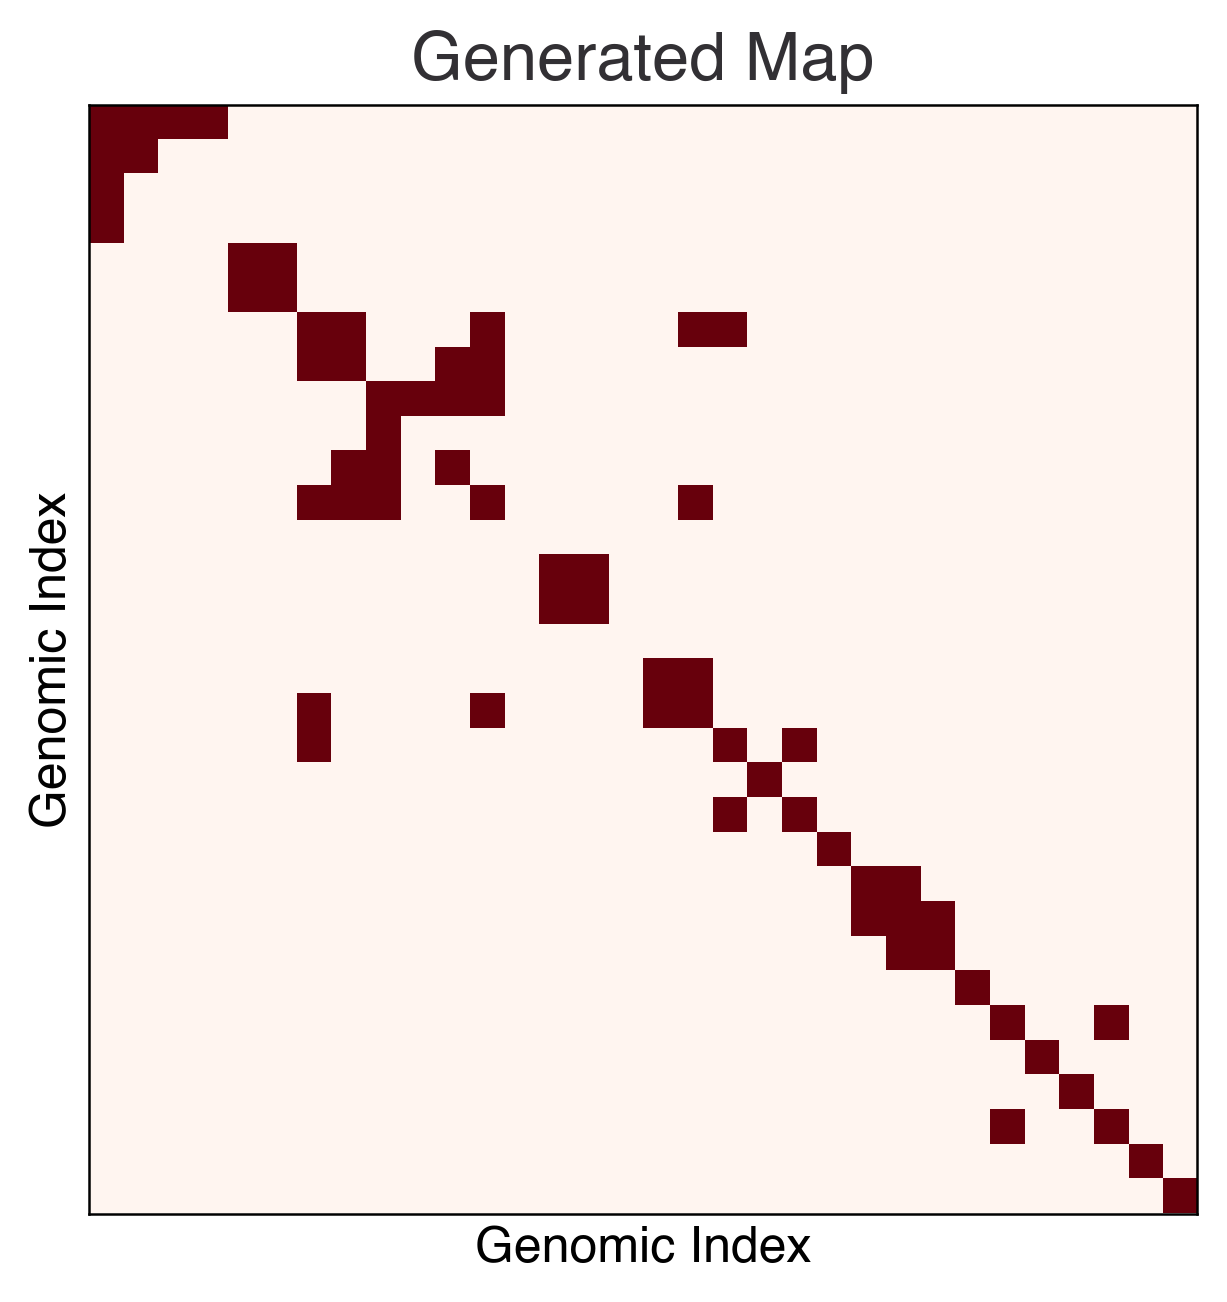

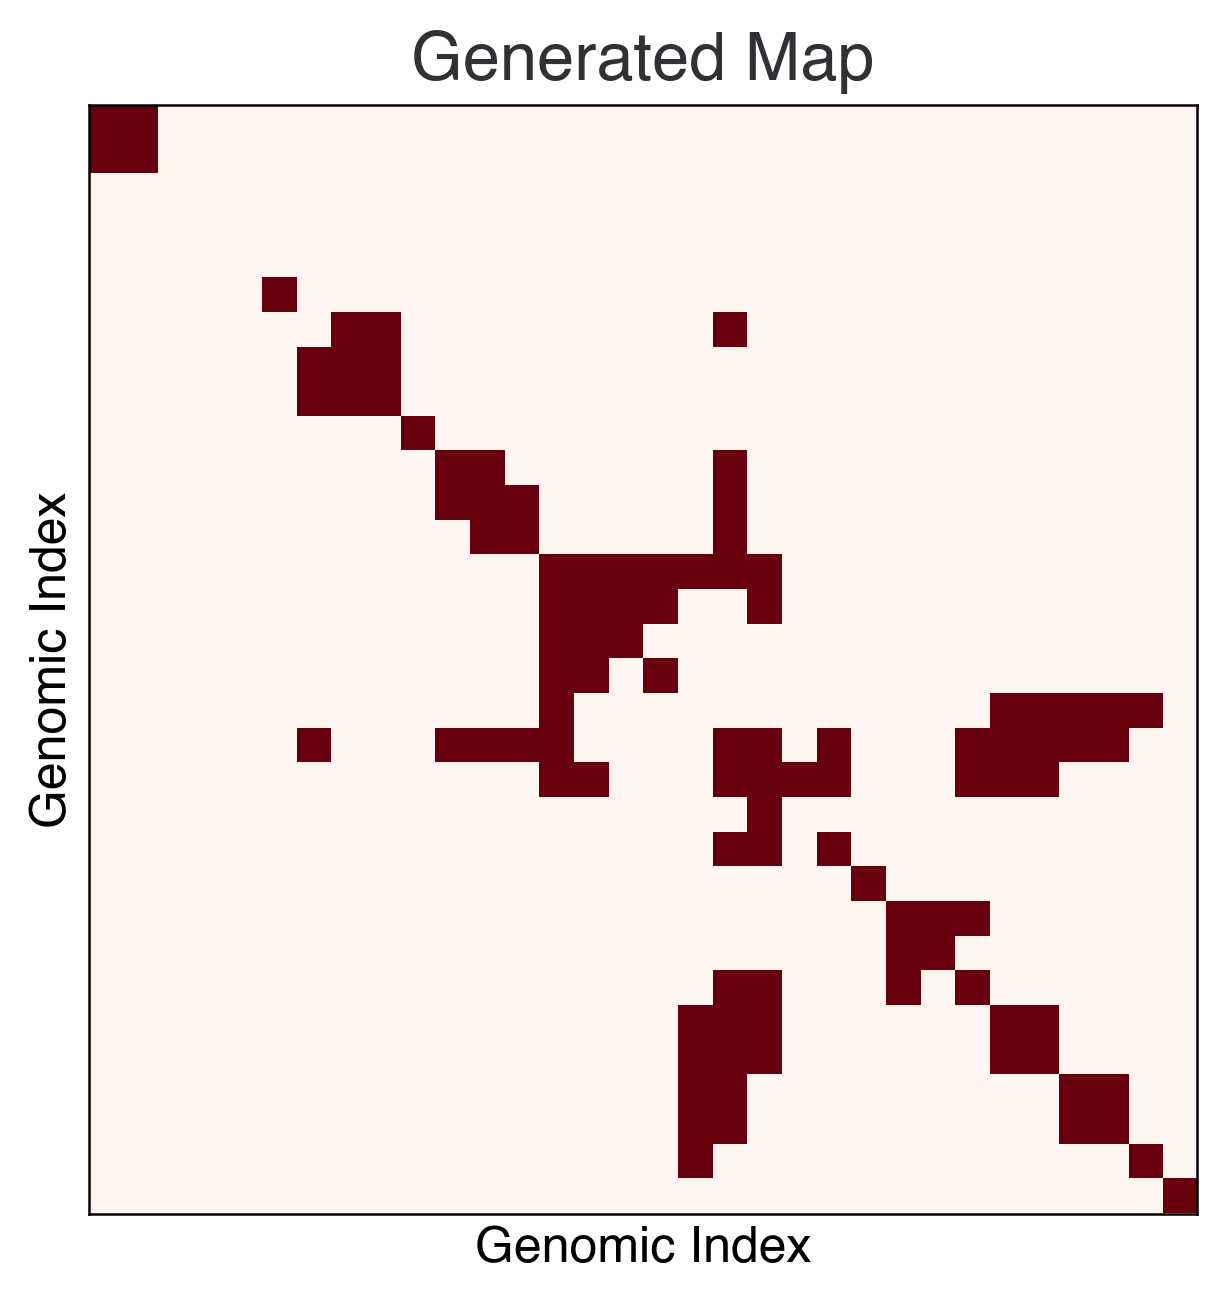

In [81]:
for i in [25,5425]:

    contacts = sample_configs[i,0,...]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.matshow(contacts,cmap='Reds')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Genomic Index')
    ax.set_ylabel('Genomic Index')
    ax.set_title('Generated Map')

    fig.savefig(save_folder+f'/scHiC_by_boolean_model_{i}.pdf')

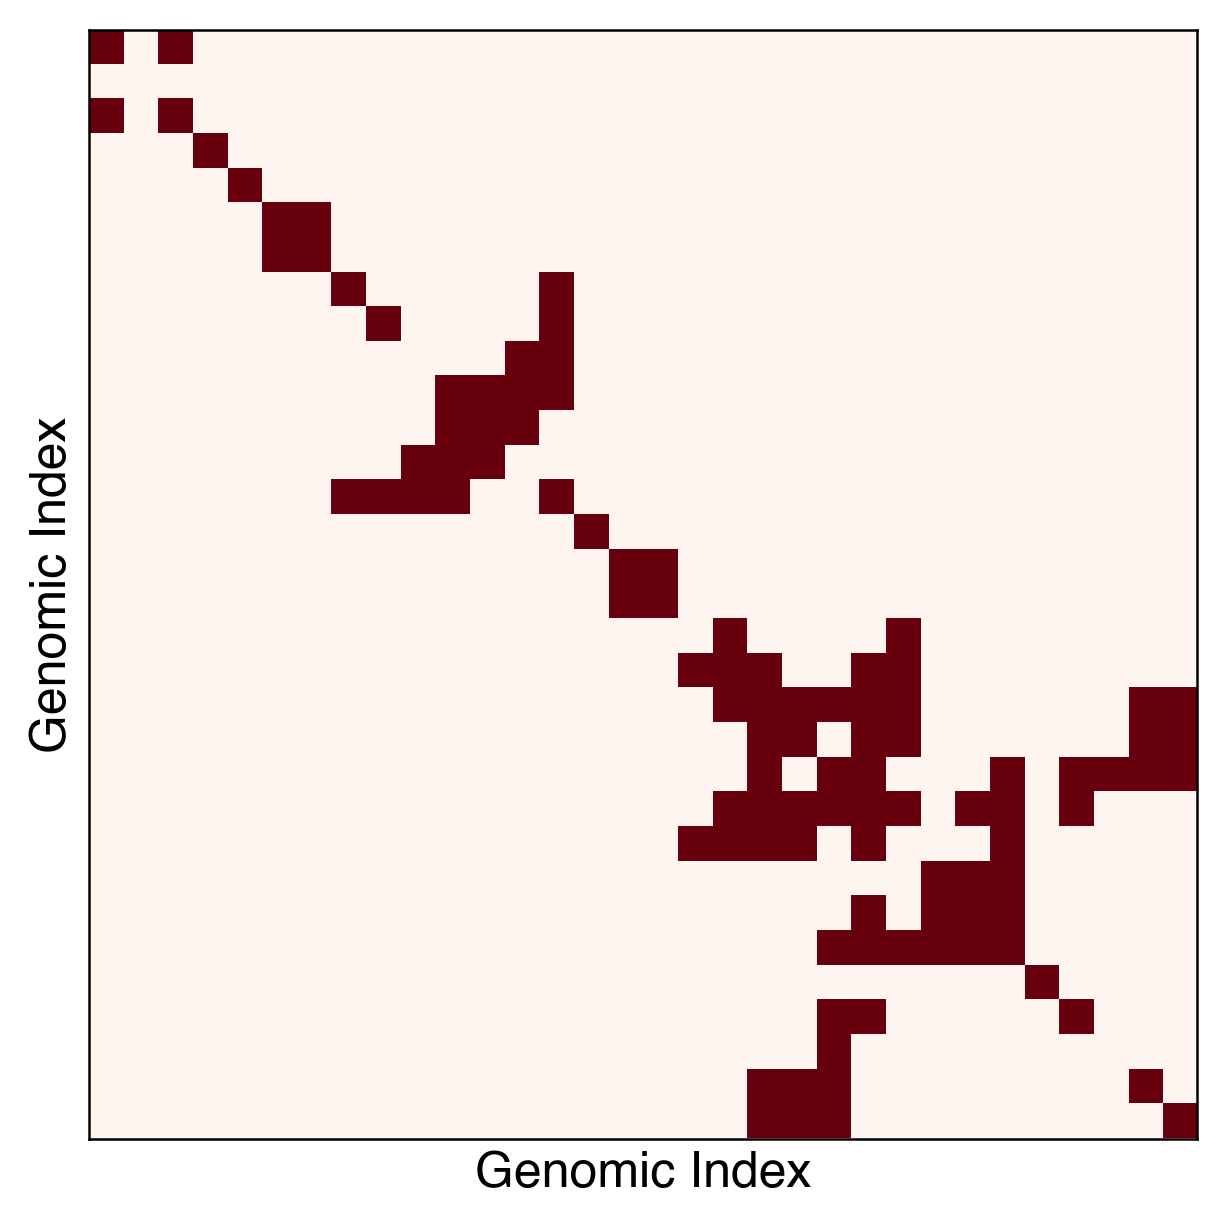

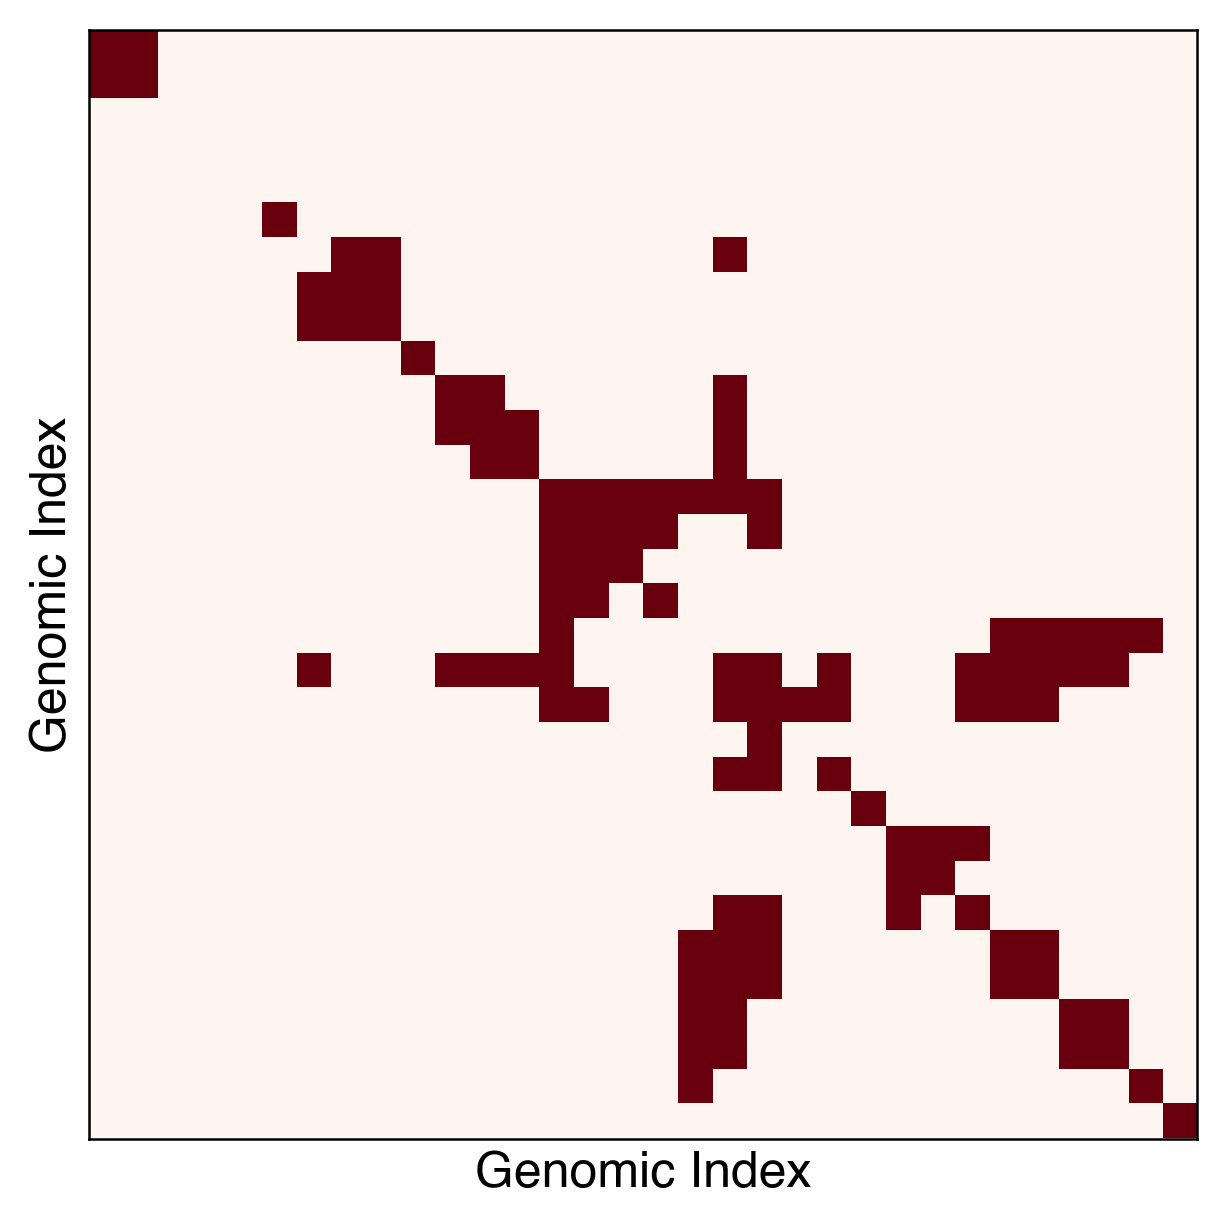

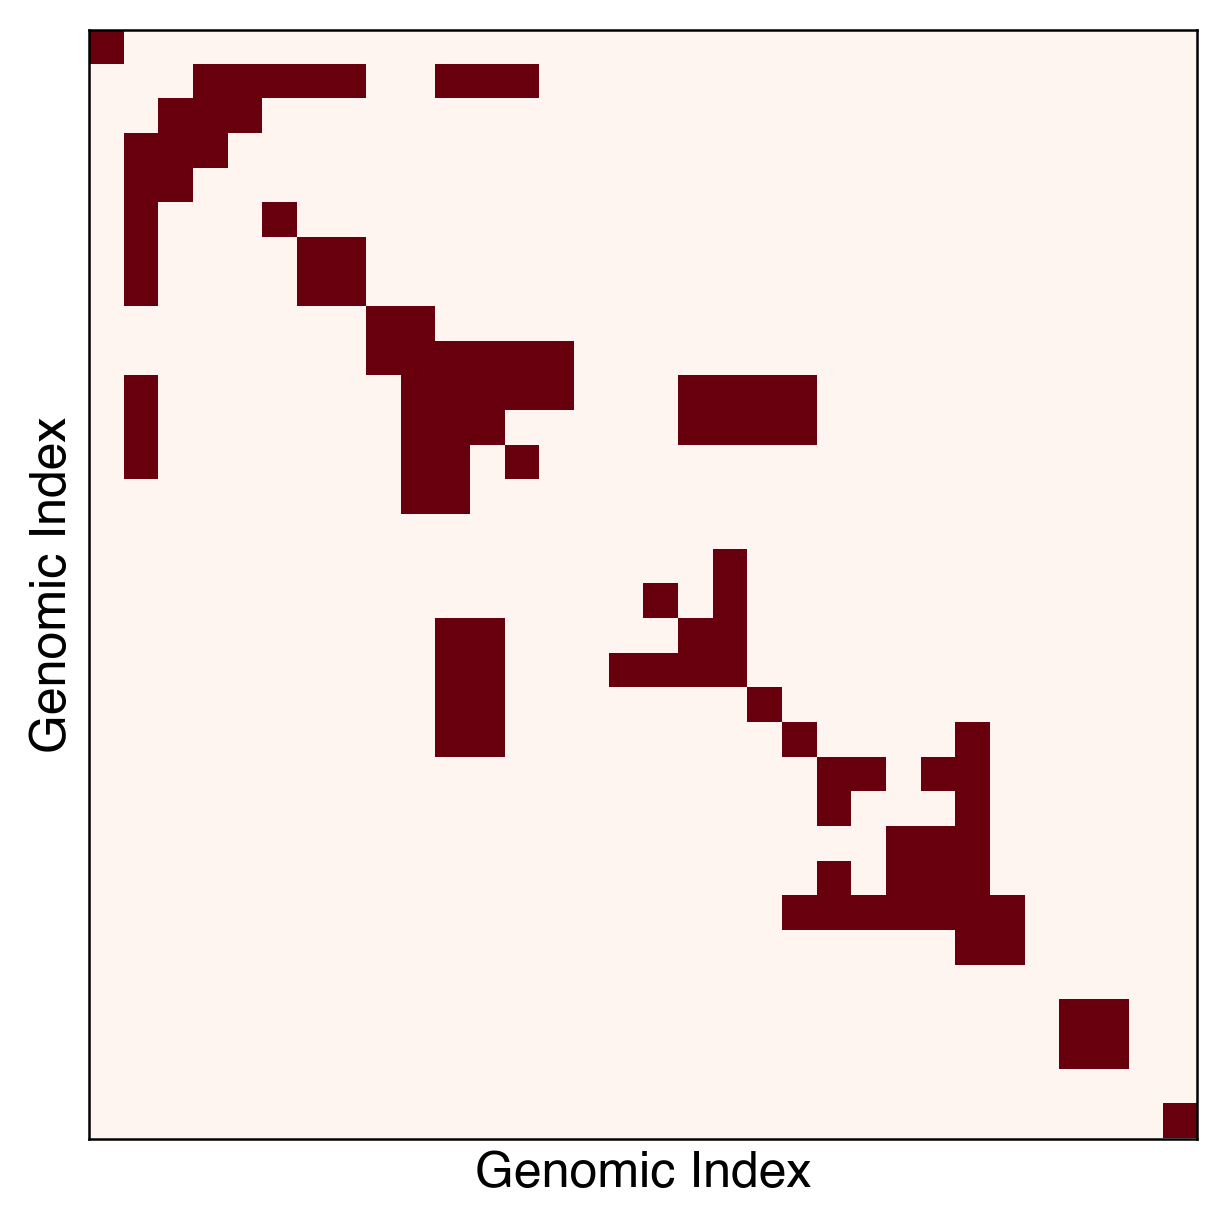

In [77]:
i,j = torch.triu_indices(32,32,1) 

contact_counts = sample_configs[:,0,i,j].sum(-1)

reasonable_contacts = torch.where(contact_counts==40)[0]

for i in range(3):

    contacts = sample_configs[reasonable_contacts[i],0,...]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.matshow(contacts,cmap='Reds')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Genomic Index')
    ax.set_ylabel('Genomic Index')

In [78]:
reasonable_contacts[1]

tensor(5425)

(array([ 720., 2579., 3365., 1765.,  884.,  452.,  142.,   70.,   14.,
           9.]),
 array([ 0.        ,  4.4000001 ,  8.80000019, 13.19999981, 17.60000038,
        22.        , 26.39999962, 30.79999924, 35.20000076, 39.59999847,
        44.        ]),
 <BarContainer object of 10 artists>)

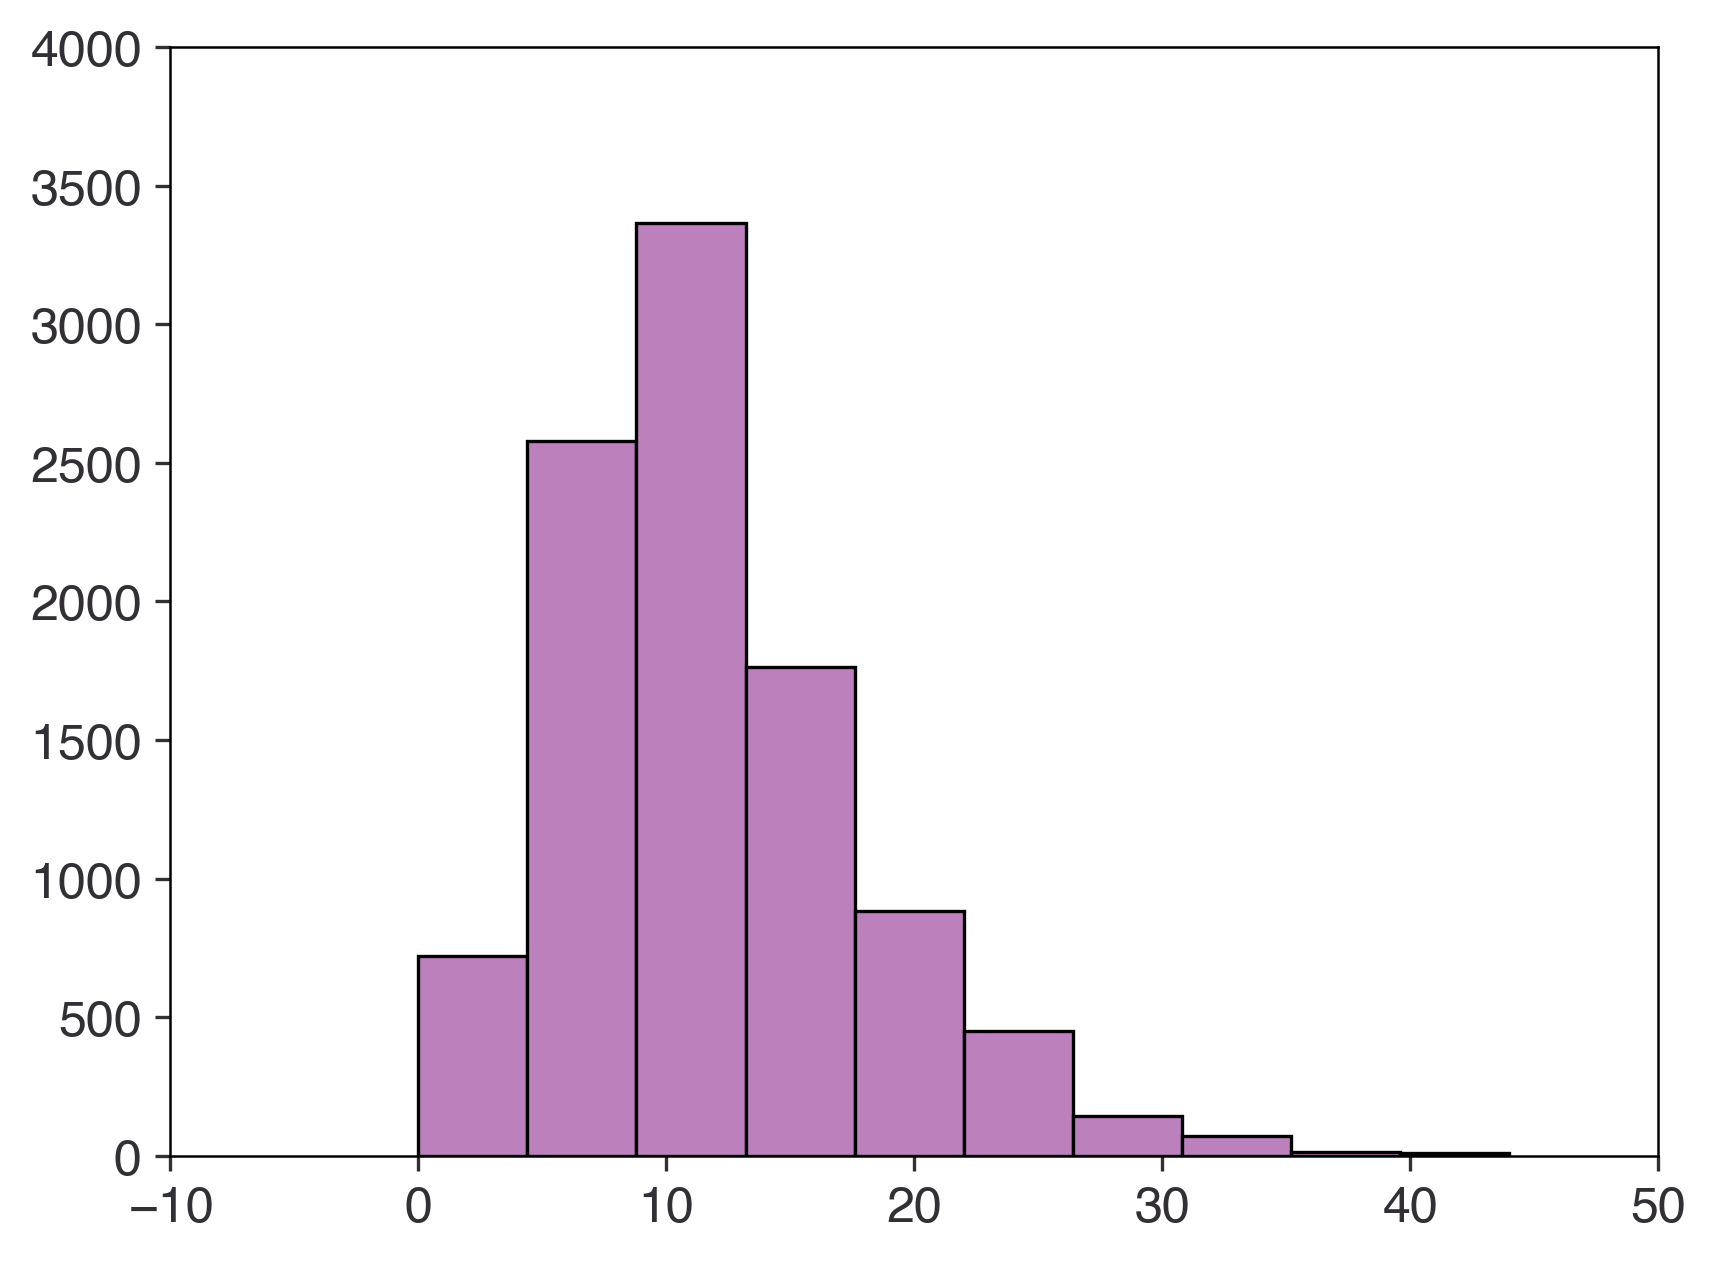

In [73]:
plt.hist(contact_counts.cpu().numpy())

Locate region with few features

In [146]:
import pandas as pd
import torch
import sys
sys.path.insert(0,'../data_utils/')
from HiCDataset import HiCDataset
from ConfigDataset import ConfigDataset
from HiCMap import HiCMap 

import matplotlib.pyplot as plt
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style.txt')

In [147]:
nbeads = 64
resolution = 20_000
chrom = '11'
save_folder = 'HiC/'
exp_hic = HiCDataset(resolution=resolution)

In [148]:
config_ds = ConfigDataset(
    '../../data/processed_data.hdf5',
    segment_length=nbeads,
    remove_diagonal=False,
    batch_size=0,
    normalize_distances=True,
    geos=None,
    organisms=None,
    cell_types=None,
    cell_numbers=None,
    chroms=[chrom],
    replicates=None,
    shuffle=True,
    allow_overlap=True,
    two_channels=False,
    try_GPU=True,
    mean_dist_fp='../../data/mean_dists.pt',
    mean_sq_dist_fp='../../data/squares.pt'
)

In [151]:
rosetta = pd.read_pickle('../../data/embeddings_64_after_transformer/rosetta_stone.pkl')

In [152]:
n_configs = torch.zeros(len(rosetta[chrom]),dtype=int)
for i,(_,chrom_,start_idx) in enumerate(rosetta[chrom]):
    assert chrom == chrom_
    _,coords = config_ds.fetch_specific_coords(chrom,start_idx)
    if coords is None:
        continue
    n_configs[i] = coords.shape[0]

In [153]:
n_configs[1991:2078]

tensor([78, 78, 82, 82, 82, 80, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
        78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
        78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 80,
        80, 80, 80, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
        84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84])

In [78]:
(n_configs==n_configs.max()).sum()

tensor(6372)

In [79]:
regions = {
    chrom:list(torch.where(n_configs==n_configs.max())[0])
}

In [80]:
def fetch_region(chrom,region_idx,nbeads=nbeads):
    _,chrom_,start = rosetta[chrom][region_idx]
    assert chrom == chrom_
    return exp_hic.fetch(chrom,start,start+nbeads*resolution)

Region idx: 596
Genomic Location: Chrom 1: 14,440,000-15,720,000


(<Figure size 1920x1440 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7f035c46be20>)

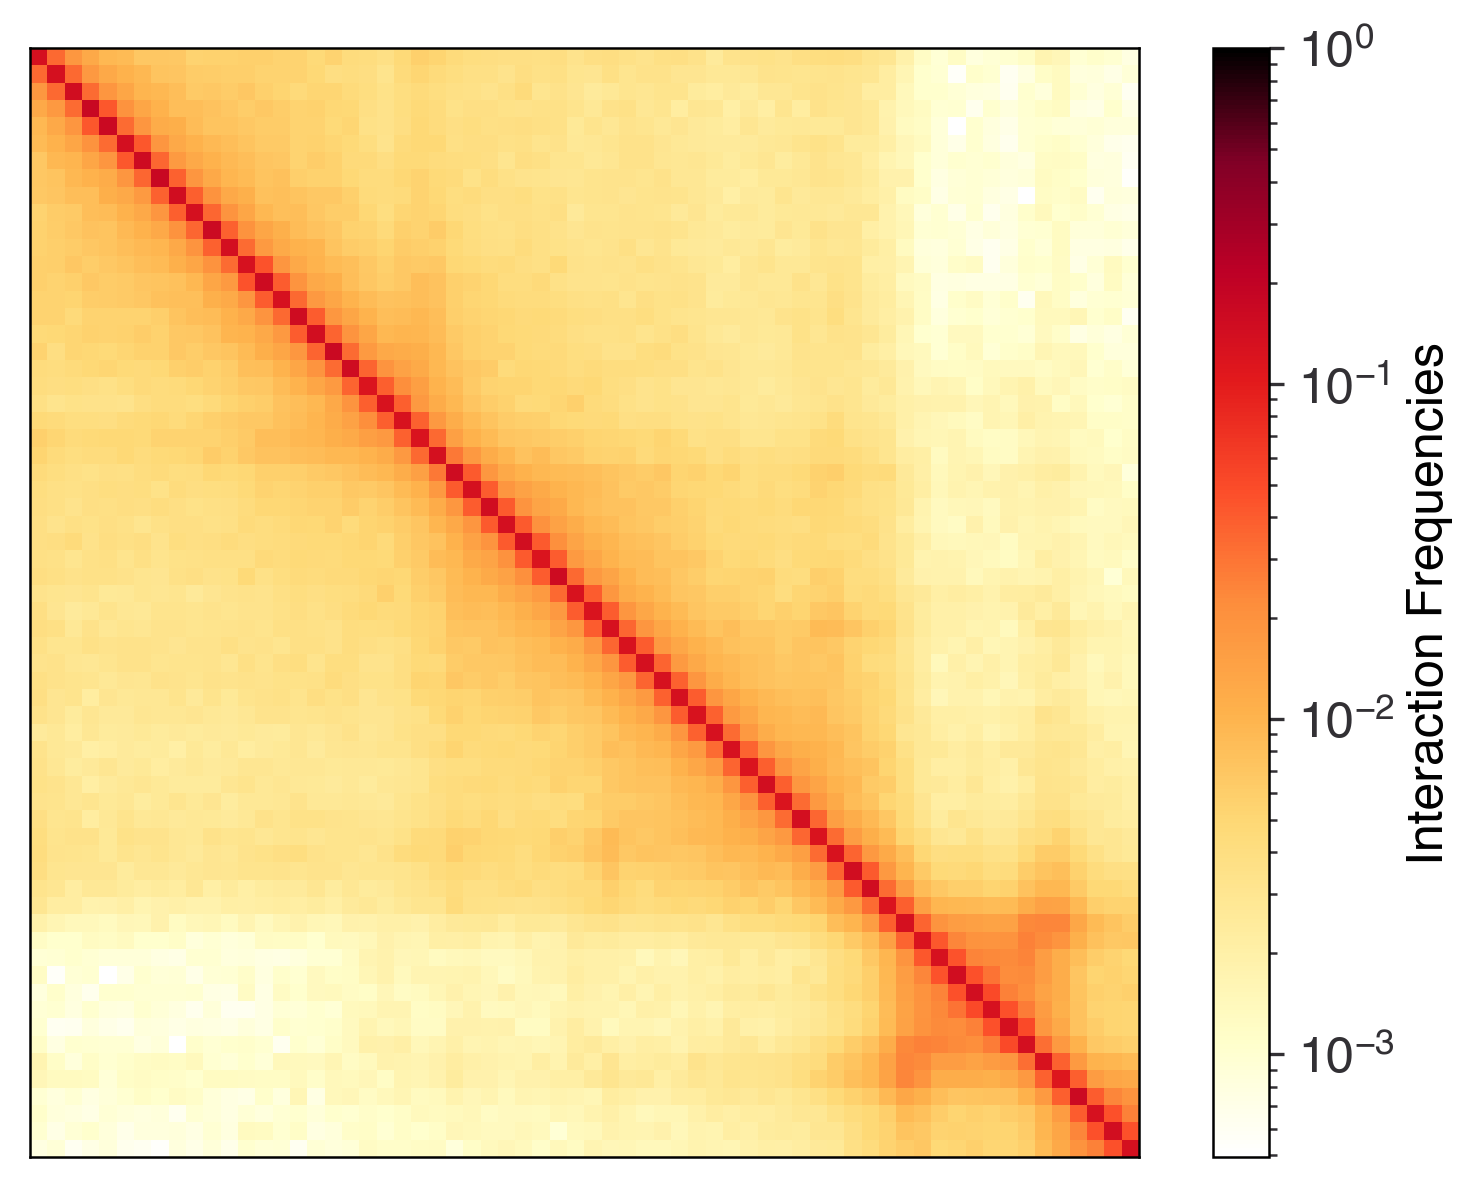

In [145]:
i=420
print(f'Region idx: {regions[chrom][i]}')
print(f'Genomic Location: Chrom {chrom}: {rosetta[chrom][regions[chrom][i]][-1]:,}-{rosetta[chrom][regions[chrom][i]][-1]+1_280_000:,}')
fetch_region(chrom,regions[chrom][i]).plot()

In [166]:
rosetta[chrom][2020]

(1300000, '11', 40580000)

Region idx: 2077
Genomic Location: Chrom 11: 41,720,000-43,000,000


(<Figure size 1920x1440 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7f0347a18610>)

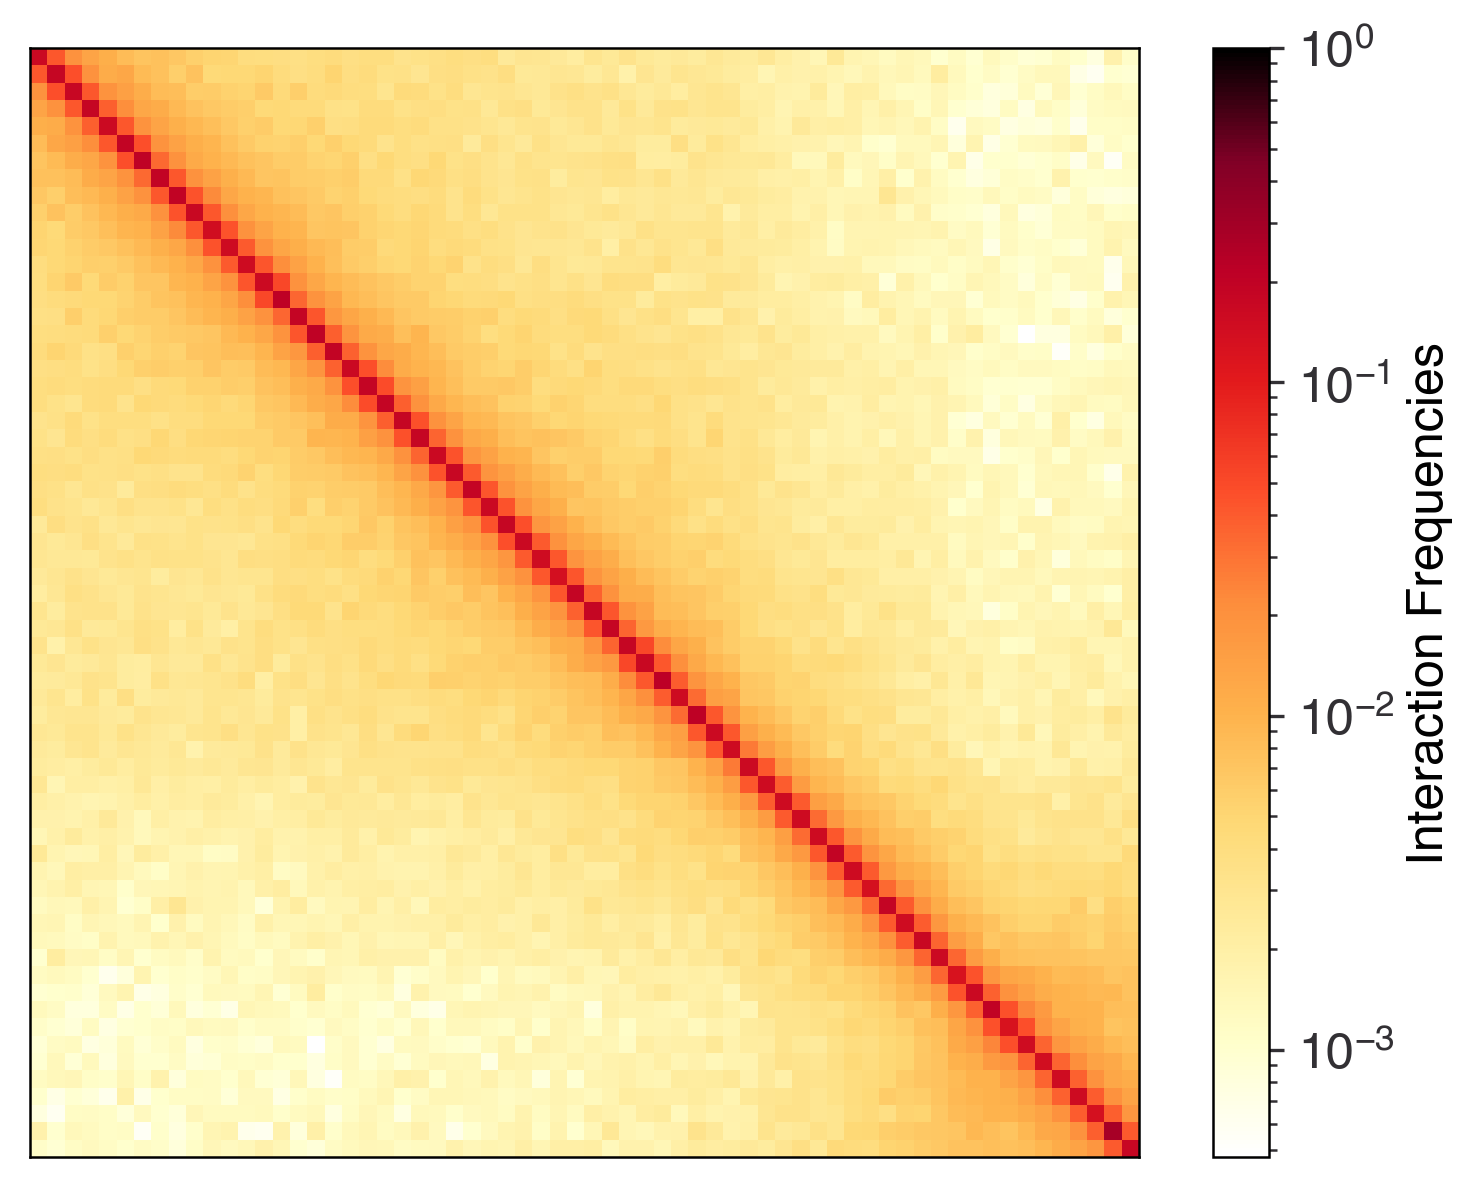

In [163]:
#144,200,265,330,395,460,525,590,730,795,860,1260,1325
i=2077
print(f'Region idx: {i}')
print(f'Genomic Location: Chrom {chrom}: {rosetta[chrom][i][-1]:,}-{rosetta[chrom][i][-1]+1_280_000:,}')
fetch_region(chrom,i).plot()

In [50]:
regions[chrom][i]

tensor(166)

In [51]:
rosetta[chrom][regions[chrom][i]]

(1300000, '1', 4100000)

Options:

Chromosome X:
4*64
6*64 

Chromosome 1:
166 (overall reference frame)


In [76]:
regions[chrom][4*64]

tensor(1100)

In [79]:
rosetta[chrom][regions[chrom][4*64]]

(1300000, 'X', 22220000)

In [77]:
regions[chrom][6*64+15]

tensor(1243)

In [78]:
rosetta[chrom][regions[chrom][6*64+15]]

(1300000, 'X', 25080000)

In [4]:
a = pd.read_pickle('/home/gridsan/gschuette/refining_scHiC/revamp_with_zhuohan/data/embeddings_64_after_transformer/chrom_22.tar.gz')

In [5]:
type(a)

pandas.core.frame.DataFrame

In [6]:
a.iloc[:1,:]

Data
Region_Length Chromosome Genomic_Index                                                   
1300000       22         16980000       [[[tensor(0.9289), tensor(-1.5583), tensor(-0....

In [19]:
a = torch.load('/home/gridsan/gschuette/binz_group_shared/zlao/for_greg/IMR/run_scripts_11/chr_11_1991.pt')

In [20]:
a.shape

torch.Size([1, 256, 256])

In [10]:
b = torch.load('/home/gridsan/gschuette/binz_group_shared/zlao/for_greg/CTCF_perturbation/CTCT_perturb.pt')
b.shape

torch.Size([1, 256, 256])

IMR Regions

In [7]:
exp_hic = HiCDataset('../../data/outside/IMR90_hg19.mcool',resolution=20_000)

(<Figure size 1920x1440 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7f0426d10d60>)

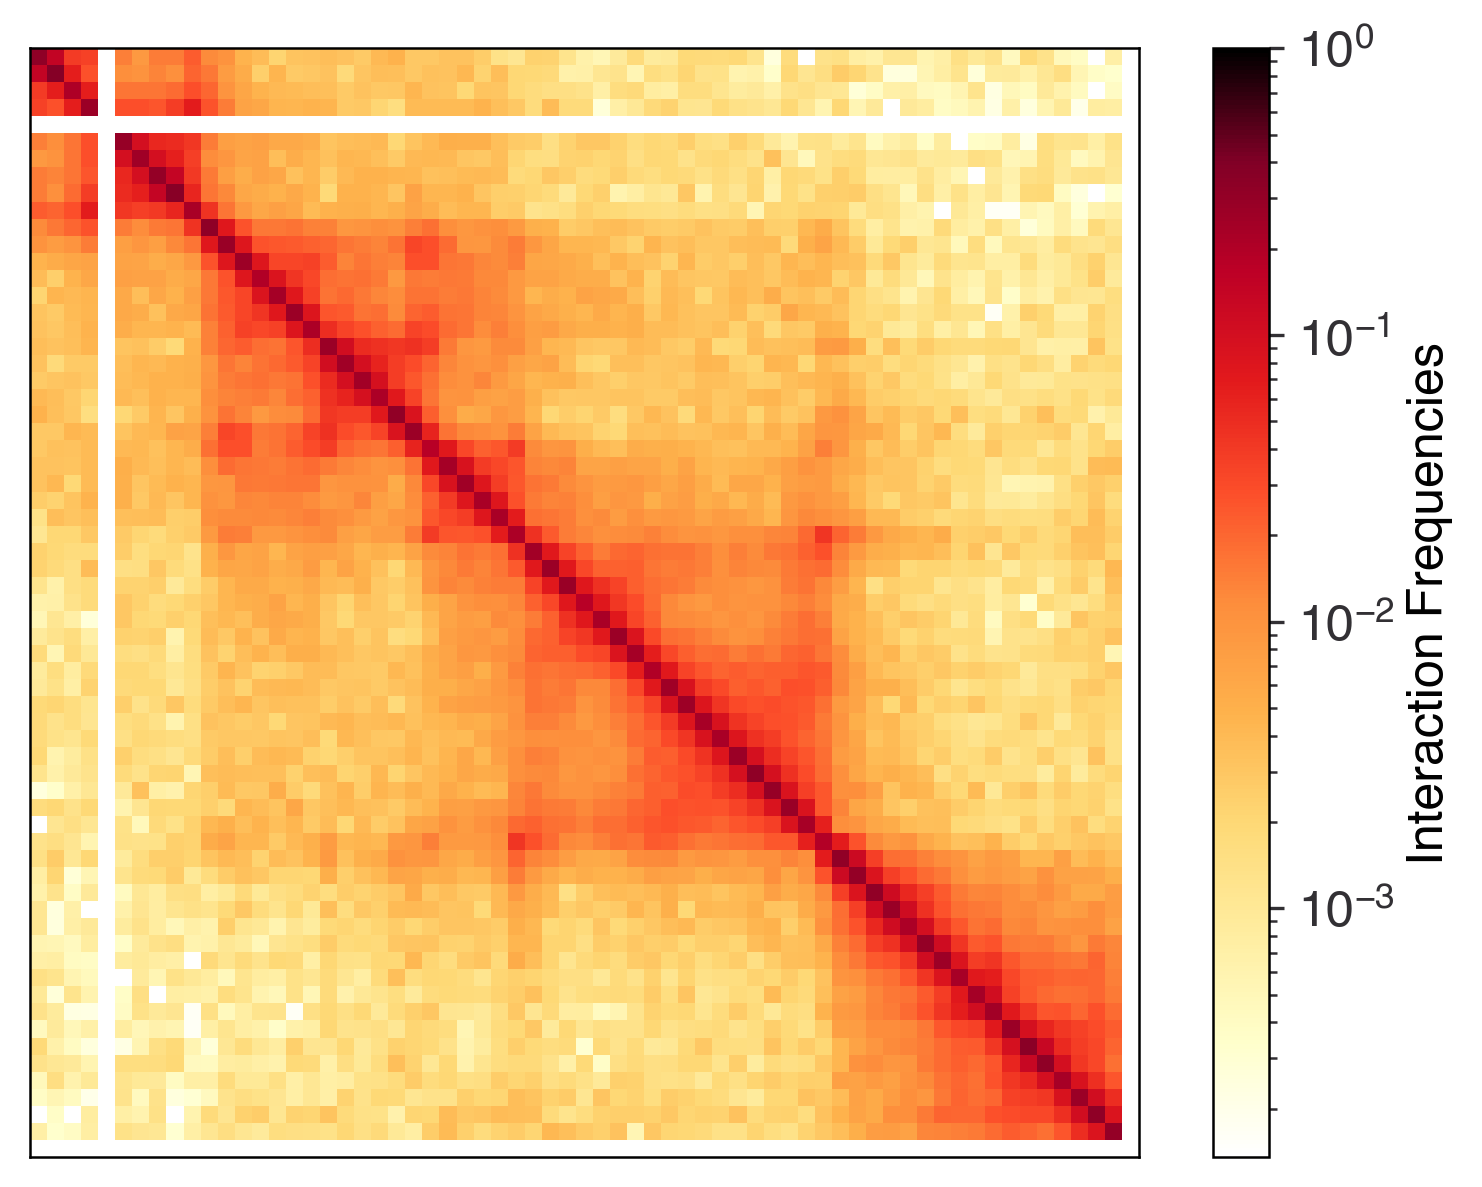

In [21]:
start = 1_991_000
exp_hic.fetch(chrom='11',start=start,stop=start+1_280_000).plot()